# Bird Audio Clips - First Pass Data Exploration

**Project:** Zoo Congo Exhibit Bird Acoustics  
**Data Source:** `data/fl_gaia_zoo_congo_15aug25_data/`  

## 1. Setup Environment and Import Libraries

In [2]:
# Standard data manipulation and analysis
import pandas as pd
import numpy as np
from pathlib import Path
import warnings
import os
warnings.filterwarnings('ignore')

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Optional: Audio analysis (will check availability)
try:
    import librosa
    import librosa.display
    AUDIO_AVAILABLE = True
    print("✓ Audio libraries (librosa) available")
except ImportError:
    AUDIO_AVAILABLE = False
    print("⚠ Audio libraries not available - install with: pip install librosa")

# Set visualization style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# Define base paths
BASE_DIR = Path(r"/Users/nataliaczaban/Desktop/Project_18")
METADATA_FILE = BASE_DIR / "fl_gaia_zoo_congo_15aug25_data_metadata_with_perch.xlsx"


print(f"\nBase directory: {BASE_DIR}")
print(f"Metadata file: {METADATA_FILE}")
print(f"Metadata file exists: {METADATA_FILE.exists()}")
print(os.path.exists(METADATA_FILE))
from pathlib import Path

print(METADATA_FILE)
print(Path(METADATA_FILE).resolve())

# Try a raw open
with open(METADATA_FILE, "rb") as f:
    chunk = f.read(1024)
    print("Opened file, first bytes length:", len(chunk))

✓ Audio libraries (librosa) available

Base directory: /Users/nataliaczaban/Desktop/Project_18
Metadata file: /Users/nataliaczaban/Desktop/Project_18/fl_gaia_zoo_congo_15aug25_data_metadata_with_perch.xlsx
Metadata file exists: True
True
/Users/nataliaczaban/Desktop/Project_18/fl_gaia_zoo_congo_15aug25_data_metadata_with_perch.xlsx
/Users/nataliaczaban/Desktop/Project_18/fl_gaia_zoo_congo_15aug25_data_metadata_with_perch.xlsx
Opened file, first bytes length: 1024


## 2. Load and Inspect Metadata

In [3]:
# Load the metadata Excel file
print("Loading metadata...")
metadata_df = pd.read_excel(METADATA_FILE)

print(f"\n{'='*60}")
print(f"METADATA OVERVIEW")
print(f"{'='*60}")
print(f"Total rows: {len(metadata_df):,}")
print(f"Total columns: {len(metadata_df.columns)}")
print(f"\nDataFrame shape: {metadata_df.shape}")
print(os.path.exists(METADATA_FILE))


Loading metadata...

METADATA OVERVIEW
Total rows: 78,837
Total columns: 27

DataFrame shape: (78837, 27)
True


In [4]:
# Display column information
print("\nColumn Information:")
print("-" * 60)
metadata_info = pd.DataFrame({
    'Column': metadata_df.columns,
    'Type': metadata_df.dtypes.values,
    'Non-Null': metadata_df.count().values,
    'Null Count': metadata_df.isnull().sum().values
})
print(metadata_info.to_string(index=False))


Column Information:
------------------------------------------------------------
            Column           Type  Non-Null  Null Count
        Unnamed: 0          int64     78837           0
         sessionId         object     78837           0
              time         object     78837           0
          filename         object     78837           0
               th1        float64     78837           0
         th1_value        float64     78837           0
               th2        float64     78837           0
         th2_value        float64     78837           0
               th3        float64     78837           0
         th3_value        float64     78837           0
            wudate          int64     78837           0
          datetime datetime64[ns]     78837           0
        precipRate          int64     78837           0
       pressureMax        float64     78837           0
          dewptAvg        float64     78837           0
      windgustHigh    

In [5]:
# Display first few rows
print("\nFirst 5 rows of metadata:")
print("=" * 80)
metadata_df.head()


First 5 rows of metadata:


Unnamed: 0 sessionId                         time  \
0           1      test  _2025_08_08_11_00_02.500000   
1           2      test  _2025_08_08_11_00_05.250000   
2           3      test         _2025_08_08_11_00_08   
3           4      test  _2025_08_08_11_00_10.750000   
4           5      test  _2025_08_08_11_00_13.500000   

                                            filename       th1  th1_value  \
0  fl_gaia_zoo_congo_15aug25_data/0/er_file_2025_...  0.219870        0.2   
1  fl_gaia_zoo_congo_15aug25_data/0/er_file_2025_...  0.427067        0.2   
2  fl_gaia_zoo_congo_15aug25_data/0/er_file_2025_...  0.345560        0.2   
3  fl_gaia_zoo_congo_15aug25_data/0/er_file_2025_...  0.487859        0.2   
4  fl_gaia_zoo_congo_15aug25_data/0/er_file_2025_...  0.342514        0.2   

        th2  th2_value       th3  th3_value  ...  tempAve humidityAvg  \
0  0.877223        0.5  0.549165        0.2  ...     22.6        63.1   
1  0.677074        0.5  0.237344        0.2  ...     22.6        63.1   
2  0.796545        0.5  0.129578        0.2  ...     22.6        63.1   
3  0.791277        0.5  0.158432        0.2  ...     22.6        63.1   
4  0.752167        0.5  0.014963        0.2  ...     22.6        63.1   

   winddirAvg  uvHigh  solarRadiationHigh   lon     lat      scientific_name  \
0         251       2               283.4  6.06  50.871  Bostrychia hagedash   
1         251       2               283.4  6.06  50.871       Crotophaga ani   
2         251       2               283.4  6.06  50.871          Buteo buteo   
3         251       2               283.4  6.06  50.871   Bradypterus lopezi   
4         251       2               283.4  6.06  50.871          Strix aluco   

      code     score  
0  hadibi1  0.065281  
1   smbani  0.234131  
2  combuz1  0.364076  
3  camscw1  0.252038  
4  tawowl1  0.041345  

[5 rows x 27 columns]

In [6]:
# Display last few rows to see range
print("\nLast 5 rows of metadata:")
print("=" * 80)
metadata_df.tail()


Last 5 rows of metadata:


Unnamed: 0 sessionId                         time  \
78832       78834      test         _2025_08_15_07_54_27   
78833       78835      test  _2025_08_15_07_54_30.250000   
78834       78836      test  _2025_08_15_07_54_42.750000   
78835       78837      test  _2025_08_15_07_54_46.250000   
78836       78838      test  _2025_08_15_07_55_02.500000   

                                                filename       th1  th1_value  \
78832  fl_gaia_zoo_congo_15aug25_data/428/er_file_202...  0.343419        0.2   
78833  fl_gaia_zoo_congo_15aug25_data/428/er_file_202...  0.317056        0.2   
78834  fl_gaia_zoo_congo_15aug25_data/428/er_file_202...  0.293213        0.2   
78835  fl_gaia_zoo_congo_15aug25_data/428/er_file_202...  0.580275        0.2   
78836  fl_gaia_zoo_congo_15aug25_data/428/er_file_202...  0.308012        0.2   

            th2  th2_value       th3  th3_value  ...  tempAve humidityAvg  \
78832  0.777669        0.5  0.134314        0.2  ...     18.0        92.0   
78833  0.640220        0.5  0.061497        0.2  ...     18.0        92.0   
78834  0.803381        0.5  0.062966        0.2  ...     18.0        92.0   
78835  0.858570        0.5  0.107660        0.2  ...     18.0        92.0   
78836  0.844804        0.5  0.140019        0.2  ...     18.0        92.0   

       winddirAvg  uvHigh  solarRadiationHigh   lon     lat  \
78832         241       0                61.6  6.06  50.871   
78833         241       0                61.6  6.06  50.871   
78834         241       0                61.6  6.06  50.871   
78835         241       0                61.6  6.06  50.871   
78836         241       0                61.6  6.06  50.871   

              scientific_name     code     score  
78832         Passer montanus   eutspa  0.047836  
78833        Coereba flaveola   banana  0.051026  
78834  Premnoplex brunnescens  spobar1  0.574086  
78835        Sicalis flaveola   saffin  0.011572  
78836         Hirundo rustica   barswa  0.331718  

[5 rows x 27 columns]

## 3. Group Data by Species

Let's identify the species column and analyze the distribution of clips across species.

In [8]:
species_col = 'scientific_name' if 'scientific_name' in metadata_df.columns else None

if species_col:
    print(f"Using '{species_col}' as species identifier\n")
    
    species_summary = metadata_df[species_col].value_counts().reset_index()
    species_summary.columns = ['Species', 'Clip Count']
    species_summary['Percentage'] = (species_summary['Clip Count'] / len(metadata_df) * 100).round(2)
    
    print("="*60)
    print("CLIPS PER SPECIES")
    print("="*60)
    print(species_summary.to_string(index=False))
    print(f"\nTotal unique species: {len(species_summary)}")
else:
    print("⚠ Could not automatically identify species column. Please specify manually.")
    species_summary = None

Using 'scientific_name' as species identifier

CLIPS PER SPECIES
                        Species  Clip Count  Percentage
               Sicalis flaveola        3180        4.03
                Passer montanus        2648        3.36
                Hirundo rustica        2614        3.32
                Toxostoma rufum        2607        3.31
         Ploceus melanocephalus        2500        3.17
                    Strix aluco        1840        2.33
            Rauenia bonariensis        1635        2.07
         Basileuterus rufifrons        1463        1.86
           Brotogeris jugularis        1232        1.56
              Tetrastes bonasia        1177        1.49
               Lanius cristatus        1119        1.42
                      Asio otus        1113        1.41
              Troglodytes aedon        1020        1.29
          Cistothorus palustris         979        1.24
             Hippolais icterina         968        1.23
               Estrilda astrild        

## 4. Scan Audio File Structure

Let's discover all audio files in folders 1-428 and understand the file organization.

In [9]:
# Scan for audio files
print("Scanning audio folders...")
print("This may take a moment for large datasets...\n")

audio_extensions = {'.wav', '.mp3', '.flac', '.ogg', '.m4a'}
audio_files = []

# Scan numbered folders 1-428
for folder_num in range(1, 429):
    folder_path = DATA_DIR / str(folder_num)
    if folder_path.exists():
        # Find all audio files in this folder
        for file_path in folder_path.rglob('*'):
            if file_path.is_file() and file_path.suffix.lower() in audio_extensions:
                audio_files.append({
                    'full_path': str(file_path),
                    'folder_id': folder_num,
                    'filename': file_path.name,
                    'stem': file_path.stem,
                    'extension': file_path.suffix,
                    'relative_path': str(file_path.relative_to(DATA_DIR))
                })

audio_df = pd.DataFrame(audio_files)

print(f"{'='*60}")
print(f"AUDIO FILES DISCOVERED")
print(f"{'='*60}")
print(f"Total audio files found: {len(audio_df):,}")

if len(audio_df) > 0:
    print(f"\nFolders with audio: {audio_df['folder_id'].nunique()}")
    print(f"File extensions: {audio_df['extension'].value_counts().to_dict()}")
    print(f"\nFirst few audio files:")
    display(audio_df.head(10))
else:
    print("\n⚠ No audio files found. Check the folder structure.")

Scanning audio folders...
This may take a moment for large datasets...



NameError: name 'DATA_DIR' is not defined

In [8]:
# Analyze folder distribution
if len(audio_df) > 0:
    folder_counts = audio_df['folder_id'].value_counts().sort_index()
    
    print(f"\nAudio files per folder - Summary Statistics:")
    print(f"  Mean: {folder_counts.mean():.1f}")
    print(f"  Median: {folder_counts.median():.1f}")
    print(f"  Min: {folder_counts.min()}")
    print(f"  Max: {folder_counts.max()}")
    
    print(f"\nTop 10 folders by file count:")
    print(folder_counts.head(10))

NameError: name 'audio_df' is not defined

## 5. Link Metadata to Audio Files

The metadata contains a 'filename' column with relative paths (from the data directory root) that correspond to the audio .wav files. Let's verify this linkage and construct absolute paths.


In [16]:
# Check if 'filename' column exists in metadata
if 'filename' in metadata_df.columns:
    print("✓ 'filename' column found in metadata\n")
    
    # The metadata 'filename' column contains relative paths from DATA_DIR parent
    # e.g., "fl_gaia_zoo_congo_15aug25_data/0/er_file_2025_08_08_11_00_02.500000.wav"
    # We need to construct full absolute paths
    
    # Convert metadata filename paths to absolute paths
    metadata_df['audio_path'] = metadata_df['filename'].apply(
        lambda x: str(BASE_DIR / "data" / x) if pd.notna(x) else None
    )
    
    # Check which files actually exist
    metadata_df['has_audio'] = metadata_df['audio_path'].apply(
        lambda x: Path(x).exists() if x is not None else False
    )
    
    # Statistics
    matched_count = metadata_df['has_audio'].sum()
    match_rate = (matched_count / len(metadata_df) * 100)
    
    print(f"{'='*60}")
    print(f"METADATA-AUDIO LINKAGE")
    print(f"{'='*60}")
    print(f"Total metadata rows: {len(metadata_df):,}")
    print(f"Metadata rows with audio: {matched_count:,}")
    print(f"Match rate: {match_rate:.2f}%")
    print(f"\nUnmatched metadata rows: {len(metadata_df) - matched_count:,}")
    
    # Show examples of matched and unmatched
    print(f"\n{'='*60}")
    print(f"MATCHED EXAMPLES (first 5):")
    print(f"{'='*60}")
    matched_samples = metadata_df[metadata_df['has_audio']].head()
    for idx, row in matched_samples.iterrows():
        print(f"  {row['filename']}")
        print(f"    -> {row['audio_path']}")
    
    if (len(metadata_df) - matched_count) > 0:
        print(f"\n{'='*60}")
        print(f"UNMATCHED EXAMPLES (first 5):")
        print(f"{'='*60}")
        unmatched_samples = metadata_df[~metadata_df['has_audio']].head()
        for idx, row in unmatched_samples.iterrows():
            print(f"  {row['filename']}")
            if pd.notna(row['audio_path']):
                print(f"    Expected at: {row['audio_path']}")
else:
    print("⚠ 'filename' column not found in metadata")
    print(f"Available columns: {list(metadata_df.columns)}")


✓ 'filename' column found in metadata

METADATA-AUDIO LINKAGE
Total metadata rows: 78,837
Metadata rows with audio: 0
Match rate: 0.00%

Unmatched metadata rows: 78,837

MATCHED EXAMPLES (first 5):

UNMATCHED EXAMPLES (first 5):
  fl_gaia_zoo_congo_15aug25_data/0/er_file_2025_08_08_11_00_02.500000.wav
    Expected at: /Users/nataliaczaban/Desktop/Project_18/data/fl_gaia_zoo_congo_15aug25_data/0/er_file_2025_08_08_11_00_02.500000.wav
  fl_gaia_zoo_congo_15aug25_data/0/er_file_2025_08_08_11_00_05.250000.wav
    Expected at: /Users/nataliaczaban/Desktop/Project_18/data/fl_gaia_zoo_congo_15aug25_data/0/er_file_2025_08_08_11_00_05.250000.wav
  fl_gaia_zoo_congo_15aug25_data/0/er_file_2025_08_08_11_00_08.wav
    Expected at: /Users/nataliaczaban/Desktop/Project_18/data/fl_gaia_zoo_congo_15aug25_data/0/er_file_2025_08_08_11_00_08.wav
  fl_gaia_zoo_congo_15aug25_data/0/er_file_2025_08_08_11_00_10.750000.wav
    Expected at: /Users/nataliaczaban/Desktop/Project_18/data/fl_gaia_zoo_congo_15aug25

## 6. Preliminary Data Analysis

Now that we've linked metadata to audio files, let's explore the key columns and their relationships.

### 6.1 Species Detection Analysis

Analyze the PERCH model predictions: scientific_name, code (species code), and confidence scores.

In [17]:
# Analyze species detections and confidence scores
print("="*70)
print("SPECIES DETECTION SUMMARY")
print("="*70)

# Basic stats on detections
print(f"\nTotal clips analyzed: {len(metadata_df):,}")
print(f"Clips with species detected: {metadata_df['scientific_name'].notna().sum():,}")
print(f"Clips without detection: {metadata_df['scientific_name'].isna().sum():,}")

# Score distribution
if 'score' in metadata_df.columns:
    print(f"\nConfidence Score Statistics:")
    print(f"  Mean: {metadata_df['score'].mean():.3f}")
    print(f"  Median: {metadata_df['score'].median():.3f}")
    print(f"  Min: {metadata_df['score'].min():.3f}")
    print(f"  Max: {metadata_df['score'].max():.3f}")
    print(f"  Std Dev: {metadata_df['score'].std():.3f}")
    
    # Score distribution by quartile
    print(f"\nScore Quartiles:")
    for q in [0.25, 0.50, 0.75, 0.90, 0.95, 0.99]:
        val = metadata_df['score'].quantile(q)
        print(f"  {int(q*100)}th percentile: {val:.3f}")

# Top species by detection count
print(f"\n{'='*70}")
print(f"TOP 10 DETECTED SPECIES (by count)")
print(f"{'='*70}")
top_species = metadata_df['scientific_name'].value_counts().head(10).reset_index()
top_species.columns = ['Species', 'Count']
top_species['Percentage'] = (top_species['Count'] / len(metadata_df) * 100).round(2)
print(top_species.to_string(index=False))

# Average confidence score by species
if 'score' in metadata_df.columns:
    print(f"\n{'='*70}")
    print(f"AVERAGE CONFIDENCE SCORE BY SPECIES (Top 10 by count)")
    print(f"{'='*70}")
    species_scores = metadata_df.groupby('scientific_name')['score'].agg(['mean', 'count', 'std']).sort_values('count', ascending=False).head(10)
    species_scores.columns = ['Avg Score', 'Count', 'Std Dev']
    species_scores['Avg Score'] = species_scores['Avg Score'].round(3)
    species_scores['Std Dev'] = species_scores['Std Dev'].round(3)
    print(species_scores)

SPECIES DETECTION SUMMARY

Total clips analyzed: 78,837
Clips with species detected: 78,837
Clips without detection: 0

Confidence Score Statistics:
  Mean: 0.168
  Median: 0.089
  Min: 0.000
  Max: 1.000
  Std Dev: 0.197

Score Quartiles:
  25th percentile: 0.041
  50th percentile: 0.089
  75th percentile: 0.212
  90th percentile: 0.446
  95th percentile: 0.632
  99th percentile: 0.906

TOP 10 DETECTED SPECIES (by count)
               Species  Count  Percentage
      Sicalis flaveola   3180        4.03
       Passer montanus   2648        3.36
       Hirundo rustica   2614        3.32
       Toxostoma rufum   2607        3.31
Ploceus melanocephalus   2500        3.17
           Strix aluco   1840        2.33
   Rauenia bonariensis   1635        2.07
Basileuterus rufifrons   1463        1.86
  Brotogeris jugularis   1232        1.56
     Tetrastes bonasia   1177        1.49

AVERAGE CONFIDENCE SCORE BY SPECIES (Top 10 by count)
                        Avg Score  Count  Std Dev
scienti

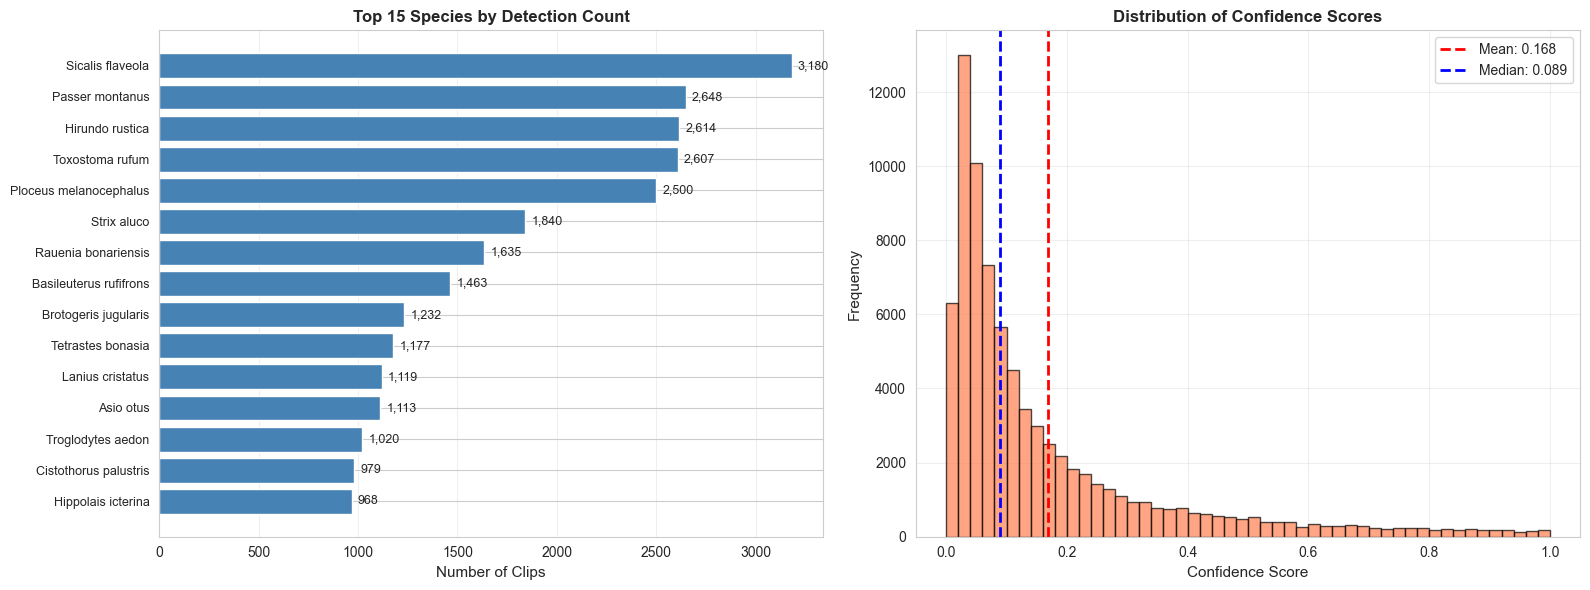

In [18]:
# Visualize species distribution
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Bar chart of top species
top_n = 15
top_species_plot = metadata_df['scientific_name'].value_counts().head(top_n)
axes[0].barh(range(len(top_species_plot)), top_species_plot.values, color='steelblue')
axes[0].set_yticks(range(len(top_species_plot)))
axes[0].set_yticklabels(top_species_plot.index, fontsize=9)
axes[0].set_xlabel('Number of Clips', fontsize=11)
axes[0].set_title(f'Top {top_n} Species by Detection Count', fontsize=12, fontweight='bold')
axes[0].invert_yaxis()
axes[0].grid(axis='x', alpha=0.3)

# Add count labels
for i, v in enumerate(top_species_plot.values):
    axes[0].text(v + max(top_species_plot.values)*0.01, i, f'{v:,}', va='center', fontsize=9)

# Score distribution histogram
if 'score' in metadata_df.columns:
    axes[1].hist(metadata_df['score'].dropna(), bins=50, color='coral', edgecolor='black', alpha=0.7)
    axes[1].axvline(metadata_df['score'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {metadata_df["score"].mean():.3f}')
    axes[1].axvline(metadata_df['score'].median(), color='blue', linestyle='--', linewidth=2, label=f'Median: {metadata_df["score"].median():.3f}')
    axes[1].set_xlabel('Confidence Score', fontsize=11)
    axes[1].set_ylabel('Frequency', fontsize=11)
    axes[1].set_title('Distribution of Confidence Scores', fontsize=12, fontweight='bold')
    axes[1].legend()
    axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

### 6.2 Temporal Analysis

Explore temporal patterns in the recordings using the datetime column.

In [20]:
# Convert datetime column to datetime type if not already
if 'datetime' in metadata_df.columns:
    metadata_df['datetime_parsed'] = pd.to_datetime(metadata_df['datetime'], errors='coerce')
    
    # Extract time components
    metadata_df['date'] = metadata_df['datetime_parsed'].dt.date
    metadata_df['hour'] = metadata_df['datetime_parsed'].dt.hour
    metadata_df['day_of_week'] = metadata_df['datetime_parsed'].dt.day_name()
    metadata_df['month'] = metadata_df['datetime_parsed'].dt.month
    metadata_df['month_name'] = metadata_df['datetime_parsed'].dt.month_name()
    
    print("="*70)
    print("TEMPORAL COVERAGE")
    print("="*70)
    print(f"Date range: {metadata_df['datetime_parsed'].min()} to {metadata_df['datetime_parsed'].max()}")
    print(f"Total days covered: {metadata_df['date'].nunique():,}")
    print(f"Total clips: {len(metadata_df):,}")
    print(f"Average clips per day: {len(metadata_df) / metadata_df['date'].nunique():.1f}")
    
    # Hourly distribution
    print(f"\n{'='*70}")
    print(f"RECORDINGS BY HOUR OF DAY")
    print(f"{'='*70}")
    hourly_counts = metadata_df['hour'].value_counts().sort_index()
    for hour, count in hourly_counts.items():
        bar_length = int(count / hourly_counts.max() * 40)
        bar = '█' * bar_length
        print(f"{hour:02d}:00  {bar} {count:,}")
    
    # Daily distribution
    print(f"\n{'='*70}")
    print(f"RECORDINGS BY DAY OF WEEK")
    print(f"{'='*70}")
    day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    day_counts = metadata_df['day_of_week'].value_counts().reindex(day_order, fill_value=0)
    for day, count in day_counts.items():
        bar_length = int(count / day_counts.max() * 40)
        bar = '█' * bar_length
        print(f"{day:10s}  {bar} {count:,}")
else:
    print("⚠ 'datetime' column not found in metadata")

TEMPORAL COVERAGE
Date range: 2025-08-08 11:00:02 to 2025-08-15 07:55:02
Total days covered: 8
Total clips: 78,837
Average clips per day: 9854.6

RECORDINGS BY HOUR OF DAY
00:00  ██ 412
01:00  █████████ 1,328
02:00  ██████████████ 2,185
03:00  █████████ 1,373
04:00  ███████████████████████████████████ 5,222
05:00  ████████████████████████████████████████ 5,857
06:00  ██████████████████████████████████ 5,025
07:00  ███████████████████████████████ 4,670
08:00  █████████████████████████ 3,665
09:00  ████████████████████████ 3,631
10:00  ██████████████████████████ 3,903
11:00  ██████████████████████████████ 4,534
12:00  ██████████████████████████████ 4,459
13:00  ██████████████████████████████ 4,511
14:00  ██████████████████████████████ 4,517
15:00  ██████████████████████████████ 4,529
16:00  ███████████████████████████████ 4,565
17:00  █████████████████████████████████ 4,865
18:00  ███████████████████████████████ 4,653
19:00  ███████████████████████ 3,369
20:00  ████ 611
21:00  █ 268
22:0

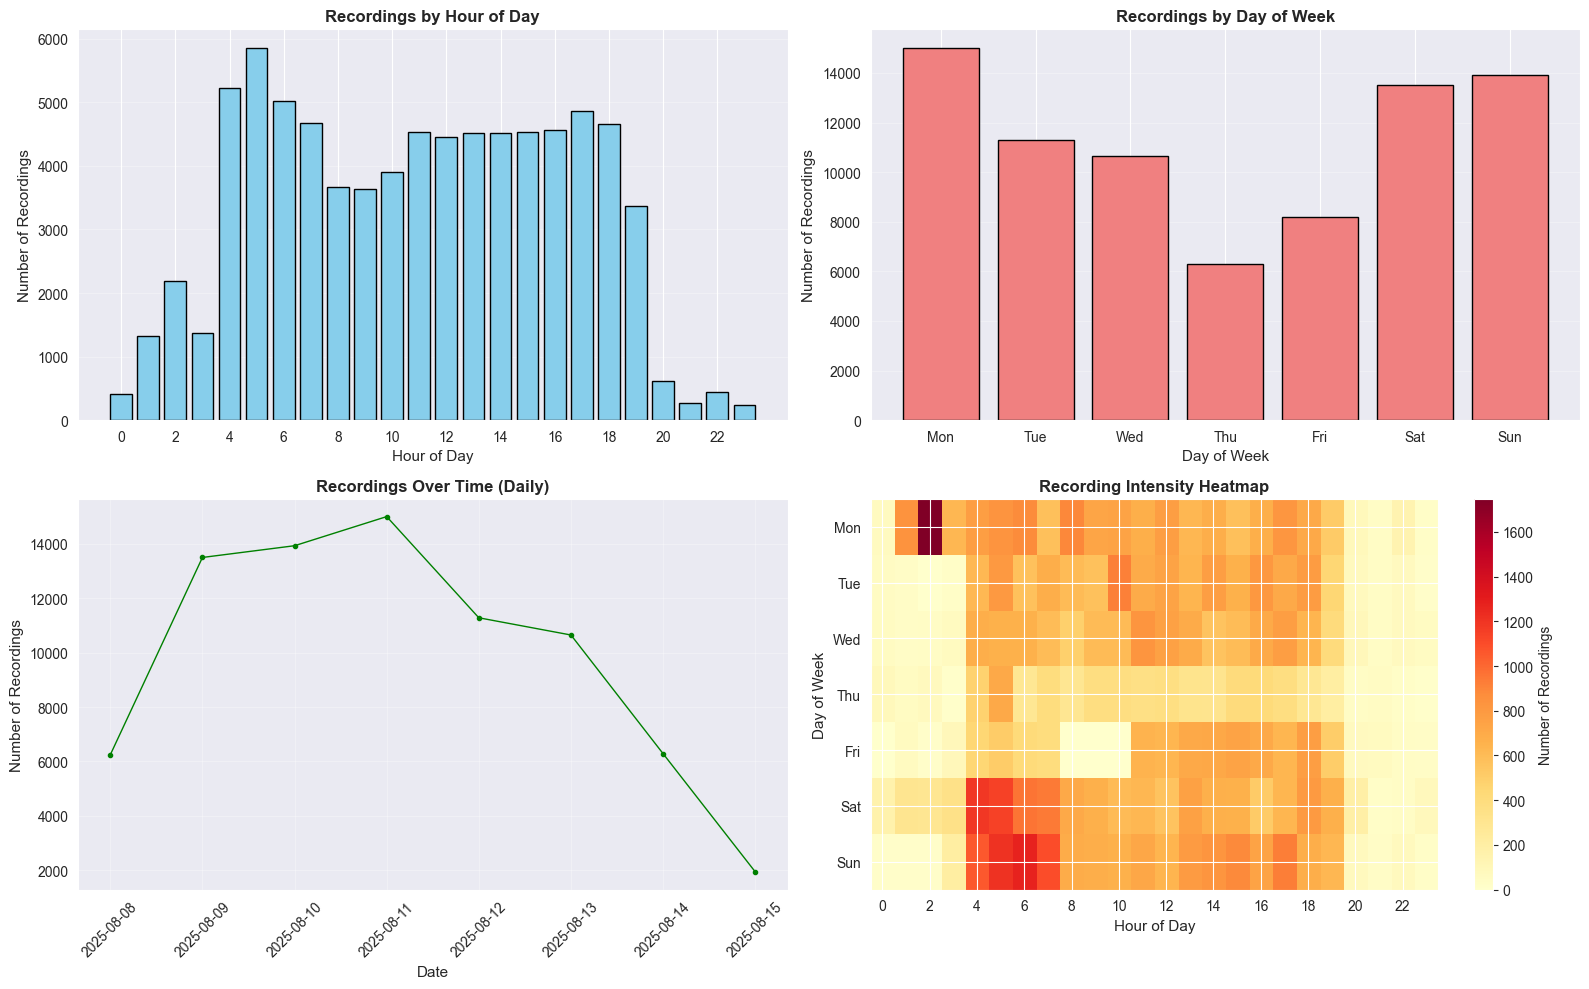

In [23]:
# Visualize temporal patterns
if 'datetime_parsed' in metadata_df.columns:
    fig, axes = plt.subplots(2, 2, figsize=(16, 10))
    
    # Hour of day distribution
    hourly_counts = metadata_df['hour'].value_counts().sort_index()
    axes[0, 0].bar(hourly_counts.index, hourly_counts.values, color='skyblue', edgecolor='black')
    axes[0, 0].set_xlabel('Hour of Day', fontsize=11)
    axes[0, 0].set_ylabel('Number of Recordings', fontsize=11)
    axes[0, 0].set_title('Recordings by Hour of Day', fontsize=12, fontweight='bold')
    axes[0, 0].set_xticks(range(0, 24, 2))
    axes[0, 0].grid(axis='y', alpha=0.3)
    
    # Day of week distribution
    day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    day_counts = metadata_df['day_of_week'].value_counts().reindex(day_order, fill_value=0)
    axes[0, 1].bar(range(len(day_counts)), day_counts.values, color='lightcoral', edgecolor='black')
    axes[0, 1].set_xticks(range(len(day_counts)))
    axes[0, 1].set_xticklabels([d[:3] for d in day_order], fontsize=10)
    axes[0, 1].set_xlabel('Day of Week', fontsize=11)
    axes[0, 1].set_ylabel('Number of Recordings', fontsize=11)
    axes[0, 1].set_title('Recordings by Day of Week', fontsize=12, fontweight='bold')
    axes[0, 1].grid(axis='y', alpha=0.3)
    
    # Daily timeline
    daily_counts = metadata_df.groupby('date').size()
    axes[1, 0].plot(daily_counts.index, daily_counts.values, marker='o', linewidth=1, markersize=3, color='green')
    axes[1, 0].set_xlabel('Date', fontsize=11)
    axes[1, 0].set_ylabel('Number of Recordings', fontsize=11)
    axes[1, 0].set_title('Recordings Over Time (Daily)', fontsize=12, fontweight='bold')
    axes[1, 0].tick_params(axis='x', rotation=45)
    axes[1, 0].grid(alpha=0.3)
    
    # Heatmap: Hour vs Day of Week
    pivot_data = metadata_df.groupby(['day_of_week', 'hour']).size().reset_index(name='count')
    pivot_table = pivot_data.pivot(index='day_of_week', columns='hour', values='count').fillna(0)
    pivot_table = pivot_table.reindex(day_order)
    
    im = axes[1, 1].imshow(pivot_table.values, cmap='YlOrRd', aspect='auto')
    axes[1, 1].set_xticks(range(0, 24, 2))
    axes[1, 1].set_xticklabels(range(0, 24, 2))
    axes[1, 1].set_yticks(range(len(day_order)))
    axes[1, 1].set_yticklabels([d[:3] for d in day_order])
    axes[1, 1].set_xlabel('Hour of Day', fontsize=11)
    axes[1, 1].set_ylabel('Day of Week', fontsize=11)
    axes[1, 1].set_title('Recording Intensity Heatmap', fontsize=12, fontweight='bold')
    
    # Add colorbar
    cbar = plt.colorbar(im, ax=axes[1, 1])
    cbar.set_label('Number of Recordings', fontsize=10)
    
    plt.tight_layout()
    plt.show()

### 6.3 Weather Conditions Analysis

Explore how weather conditions relate to bird activity and detection rates.

In [21]:
# Analyze weather variables
weather_cols = ['tempAve', 'humidityAvg', 'precipRate', 'windspeedAvg', 
                'pressureMax', 'dewptAvg', 'solarRadiationHigh', 'uvHigh']

# Check which weather columns exist
available_weather = [col for col in weather_cols if col in metadata_df.columns]

if available_weather:
    print("="*70)
    print("WEATHER CONDITIONS SUMMARY")
    print("="*70)
    
    for col in available_weather:
        data = metadata_df[col].dropna()
        if len(data) > 0:
            print(f"\n{col}:")
            print(f"  Mean: {data.mean():.2f}")
            print(f"  Median: {data.median():.2f}")
            print(f"  Min: {data.min():.2f}")
            print(f"  Max: {data.max():.2f}")
            print(f"  Std Dev: {data.std():.2f}")
            print(f"  Missing: {metadata_df[col].isna().sum():,} ({metadata_df[col].isna().sum()/len(metadata_df)*100:.1f}%)")
else:
    print("⚠ No weather columns found in metadata")

# Correlation between weather and detection confidence
if available_weather and 'score' in metadata_df.columns:
    print(f"\n{'='*70}")
    print(f"CORRELATION: Weather vs. Detection Confidence Score")
    print(f"{'='*70}")
    
    correlations = []
    for col in available_weather:
        if metadata_df[col].notna().sum() > 0:
            corr = metadata_df[[col, 'score']].corr().iloc[0, 1]
            correlations.append({'Weather Variable': col, 'Correlation': corr})
    
    if correlations:
        corr_df = pd.DataFrame(correlations).sort_values('Correlation', ascending=False)
        corr_df['Correlation'] = corr_df['Correlation'].round(3)
        print(corr_df.to_string(index=False))

WEATHER CONDITIONS SUMMARY

tempAve:
  Mean: 23.72
  Median: 25.00
  Min: 11.10
  Max: 38.30
  Std Dev: 7.56
  Missing: 0 (0.0%)

humidityAvg:
  Mean: 63.30
  Median: 61.70
  Min: 29.40
  Max: 95.00
  Std Dev: 22.38
  Missing: 0 (0.0%)

precipRate:
  Mean: 0.00
  Median: 0.00
  Min: 0.00
  Max: 0.00
  Std Dev: 0.00
  Missing: 0 (0.0%)

windspeedAvg:
  Mean: 0.47
  Median: 0.20
  Min: 0.00
  Max: 4.90
  Std Dev: 0.63
  Missing: 0 (0.0%)

pressureMax:
  Mean: 1027.42
  Median: 1026.52
  Min: 1019.64
  Max: 1035.32
  Std Dev: 4.30
  Missing: 0 (0.0%)

dewptAvg:
  Mean: 15.13
  Median: 15.00
  Min: 10.10
  Max: 21.70
  Std Dev: 2.91
  Missing: 0 (0.0%)

solarRadiationHigh:
  Mean: 237.40
  Median: 193.80
  Min: 0.00
  Max: 737.40
  Std Dev: 221.23
  Missing: 0 (0.0%)

uvHigh:
  Mean: 1.95
  Median: 1.00
  Min: 0.00
  Max: 7.00
  Std Dev: 2.02
  Missing: 0 (0.0%)

CORRELATION: Weather vs. Detection Confidence Score
  Weather Variable  Correlation
           tempAve        0.017
          de

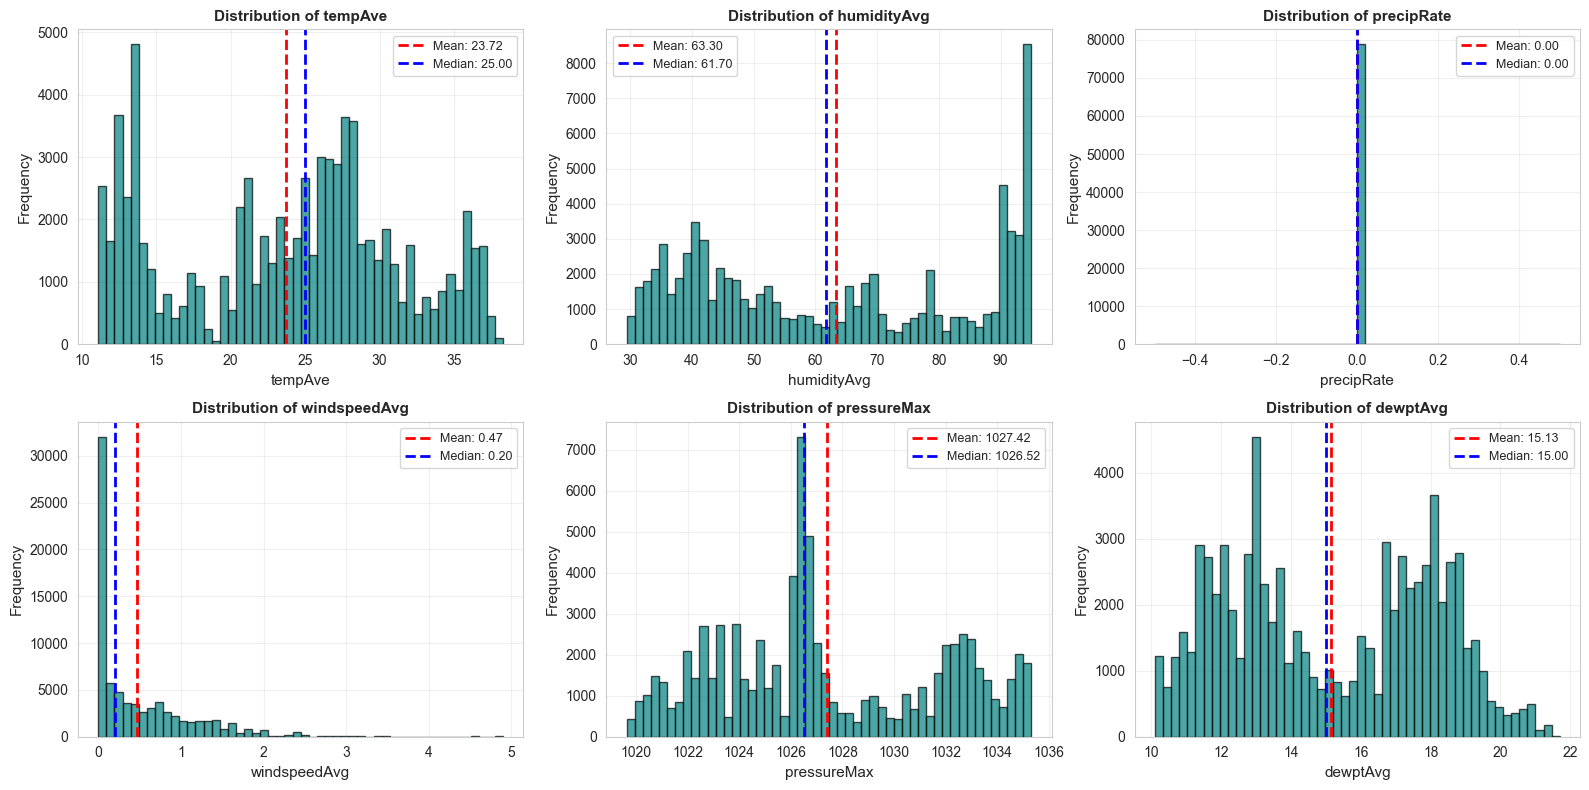

In [22]:
# Visualize weather conditions
if available_weather:
    # Select up to 6 key weather variables for visualization
    plot_weather = available_weather[:6]
    n_plots = len(plot_weather)
    n_cols = 3
    n_rows = (n_plots + n_cols - 1) // n_cols
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(16, n_rows * 4))
    axes = axes.flatten() if n_plots > 1 else [axes]
    
    for idx, col in enumerate(plot_weather):
        data = metadata_df[col].dropna()
        if len(data) > 0:
            axes[idx].hist(data, bins=50, color='teal', alpha=0.7, edgecolor='black')
            axes[idx].axvline(data.mean(), color='red', linestyle='--', linewidth=2, 
                            label=f'Mean: {data.mean():.2f}')
            axes[idx].axvline(data.median(), color='blue', linestyle='--', linewidth=2,
                            label=f'Median: {data.median():.2f}')
            axes[idx].set_xlabel(col, fontsize=11)
            axes[idx].set_ylabel('Frequency', fontsize=11)
            axes[idx].set_title(f'Distribution of {col}', fontsize=11, fontweight='bold')
            axes[idx].legend(fontsize=9)
            axes[idx].grid(alpha=0.3)
    
    # Hide empty subplots
    for idx in range(n_plots, len(axes)):
        axes[idx].axis('off')
    
    plt.tight_layout()
    plt.show()

### 6.4 Species Activity Patterns

Analyze when different species are most active throughout the day.

In [23]:
# Analyze species activity by time of day
if 'hour' in metadata_df.columns and 'scientific_name' in metadata_df.columns:
    
    # Get top 5 most common species
    top_5_species = metadata_df['scientific_name'].value_counts().head(5).index.tolist()
    
    print("="*70)
    print("SPECIES ACTIVITY BY HOUR (Top 5 Species)")
    print("="*70)
    
    # Create pivot table: species x hour
    species_hour = metadata_df[metadata_df['scientific_name'].isin(top_5_species)].groupby(
        ['scientific_name', 'hour']).size().reset_index(name='count')
    
    for species in top_5_species:
        print(f"\n{species}:")
        species_data = species_hour[species_hour['scientific_name'] == species]
        total_detections = species_data['count'].sum()
        
        for _, row in species_data.sort_values('hour').iterrows():
            hour = int(row['hour'])
            count = int(row['count'])
            pct = (count / total_detections * 100)
            bar_length = int(pct / 2)  # Scale to fit
            bar = '█' * bar_length
            print(f"  {hour:02d}:00  {bar} {count:4d} ({pct:5.1f}%)")

SPECIES ACTIVITY BY HOUR (Top 5 Species)

Sicalis flaveola:
  04:00  ████████  512 ( 16.1%)
  05:00  ██████  412 ( 13.0%)
  06:00  █████  333 ( 10.5%)
  07:00  ███  210 (  6.6%)
  08:00  ███  242 (  7.6%)
  09:00  █  121 (  3.8%)
  10:00  █  103 (  3.2%)
  11:00  █   97 (  3.1%)
  12:00     60 (  1.9%)
  13:00  █   94 (  3.0%)
  14:00  █  127 (  4.0%)
  15:00  ███  210 (  6.6%)
  16:00  ███  195 (  6.1%)
  17:00  ██  143 (  4.5%)
  18:00  ████  270 (  8.5%)
  19:00     51 (  1.6%)

Passer montanus:
  03:00      2 (  0.1%)
  04:00  ███  203 (  7.7%)
  05:00  ████  264 ( 10.0%)
  06:00  ██████  325 ( 12.3%)
  07:00  ██████  333 ( 12.6%)
  08:00  ███  175 (  6.6%)
  09:00     52 (  2.0%)
  10:00     41 (  1.5%)
  11:00     38 (  1.4%)
  12:00     34 (  1.3%)
  13:00  █   61 (  2.3%)
  14:00  █   60 (  2.3%)
  15:00  ██  129 (  4.9%)
  16:00  ███  174 (  6.6%)
  17:00  █████  316 ( 11.9%)
  18:00  █████  301 ( 11.4%)
  19:00  ██  129 (  4.9%)
  20:00      4 (  0.2%)
  22:00      5 (  0.2%)

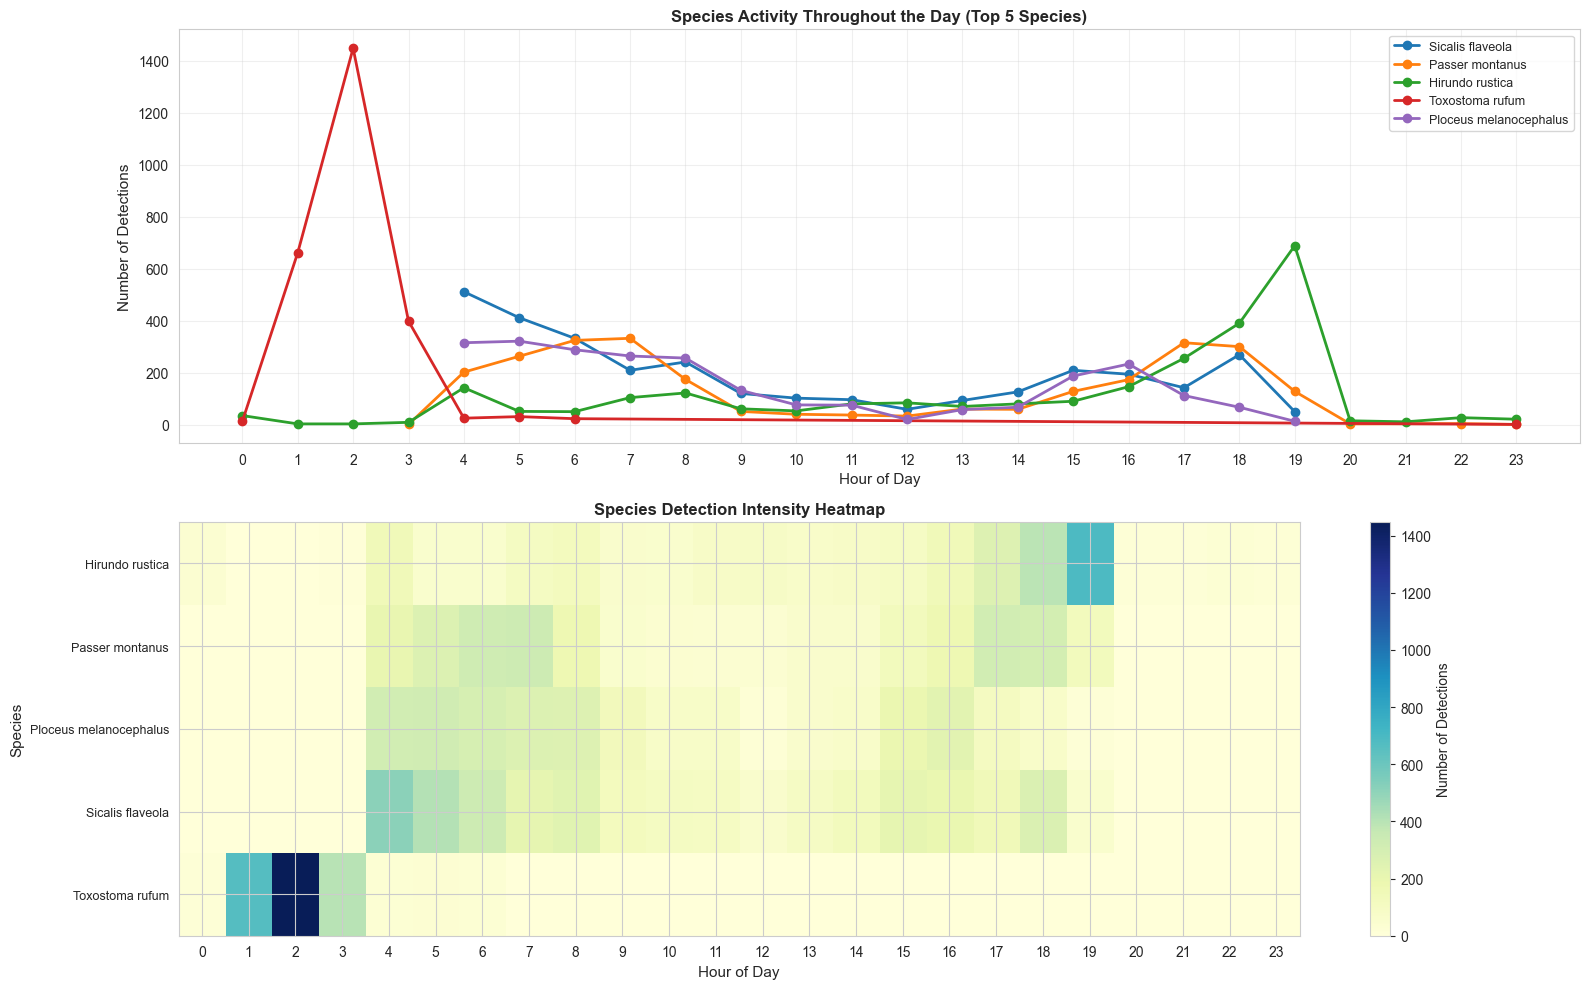

In [24]:
# Visualize species activity patterns
if 'hour' in metadata_df.columns and 'scientific_name' in metadata_df.columns:
    
    top_5_species = metadata_df['scientific_name'].value_counts().head(5).index.tolist()
    
    fig, axes = plt.subplots(2, 1, figsize=(16, 10))
    
    # Line plot: Activity by hour for top species
    for species in top_5_species:
        species_hourly = metadata_df[metadata_df['scientific_name'] == species].groupby('hour').size()
        axes[0].plot(species_hourly.index, species_hourly.values, marker='o', linewidth=2, 
                    label=species, markersize=6)
    
    axes[0].set_xlabel('Hour of Day', fontsize=11)
    axes[0].set_ylabel('Number of Detections', fontsize=11)
    axes[0].set_title('Species Activity Throughout the Day (Top 5 Species)', fontsize=12, fontweight='bold')
    axes[0].legend(fontsize=9, loc='best')
    axes[0].set_xticks(range(0, 24))
    axes[0].grid(alpha=0.3)
    
    # Heatmap: Species vs Hour
    pivot_data = metadata_df[metadata_df['scientific_name'].isin(top_5_species)].groupby(
        ['scientific_name', 'hour']).size().reset_index(name='count')
    pivot_table = pivot_data.pivot(index='scientific_name', columns='hour', values='count').fillna(0)
    
    im = axes[1].imshow(pivot_table.values, cmap='YlGnBu', aspect='auto')
    axes[1].set_xticks(range(24))
    axes[1].set_xticklabels(range(24))
    axes[1].set_yticks(range(len(pivot_table.index)))
    axes[1].set_yticklabels(pivot_table.index, fontsize=9)
    axes[1].set_xlabel('Hour of Day', fontsize=11)
    axes[1].set_ylabel('Species', fontsize=11)
    axes[1].set_title('Species Detection Intensity Heatmap', fontsize=12, fontweight='bold')
    
    # Add colorbar
    cbar = plt.colorbar(im, ax=axes[1])
    cbar.set_label('Number of Detections', fontsize=10)
    
    plt.tight_layout()
    plt.show()

Weather Analysis - Data

## Weather Related Analysis

In [10]:
import seaborn as sns
# Top 10 most common scientific names
top10 = metadata_df['scientific_name'].value_counts().nlargest(10).index
data_top10 = metadata_df[metadata_df['scientific_name'].isin(top10)]
metadata_df.head()# frequency of top 10 species

# Plots
def createBoxplotsOnData(data_frame,x,y,title,ylabel,filename):
    plt.figure(figsize=(12, 6))
    sns.boxplot(
        x=x,
        y=y,
        data=data_frame,
        palette='coolwarm',
        showmeans=True,
        meanprops={"marker": "o", "markerfacecolor": "black", "markeredgecolor": "black"}
    )

    plt.title(title)
    plt.xlabel(x)
    plt.ylabel(ylabel)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.savefig(f"{BASE_DIR}/Plots/{filename}", dpi=300, bbox_inches='tight')
    plt.show()
def createDistPlotsOnData(data_frame,datax,y,title,ylabel,filename):
    counts = data_frame[datax].value_counts().to_dict() #data occurance (for labels)
    data_top10['scientific_label'] = data_top10[datax].apply(
    lambda x: f"{x}\n(n={counts[x]})"
    )

    # --- Faceted density plots with count in labels ---
    g = sns.FacetGrid(
        data_frame,
        col='scientific_label',
        col_wrap=5,
        height=3.5,
        sharex=True,
        sharey=True
    )
    g.map(sns.kdeplot, y, fill=True, color='skyblue')
    g.fig.suptitle(title, y=1.02)
    g.savefig(f"{BASE_DIR}/Plots/{filename}", dpi=300, bbox_inches='tight')
    plt.show()

#Metric Functions

data_top10.head()
#datasettime = generate_timespan_dataframe(data_top10,"2025-08-08", "2025-08-09");

Unnamed: 0 sessionId                         time  \
4            5      test  _2025_08_08_11_00_13.500000   
13          14      test         _2025_08_08_11_00_42   
15          16      test         _2025_08_08_11_01_00   
18          19      test  _2025_08_08_11_01_20.750000   
32          33      test         _2025_08_08_11_03_42   

                                             filename       th1  th1_value  \
4   fl_gaia_zoo_congo_15aug25_data/0/er_file_2025_...  0.342514        0.2   
13  fl_gaia_zoo_congo_15aug25_data/0/er_file_2025_...  0.227200        0.2   
15  fl_gaia_zoo_congo_15aug25_data/0/er_file_2025_...  0.178280        0.2   
18  fl_gaia_zoo_congo_15aug25_data/0/er_file_2025_...  0.391101        0.2   
32  fl_gaia_zoo_congo_15aug25_data/0/er_file_2025_...  0.298605        0.2   

         th2  th2_value       th3  th3_value  ...  tempAve humidityAvg  \
4   0.752167        0.5  0.014963        0.2  ...     22.6        63.1   
13  0.794354        0.5  0.073922        0.2  ...     22.6        63.1   
15  0.585544        0.5  0.055878        0.2  ...     22.6        63.1   
18  0.643263        0.5  0.123370        0.2  ...     22.6        63.1   
32  0.554883        0.5  0.016141        0.2  ...     22.2        65.8   

    winddirAvg  uvHigh  solarRadiationHigh   lon     lat  scientific_name  \
4          251       2               283.4  6.06  50.871      Strix aluco   
13         251       2               283.4  6.06  50.871      Strix aluco   
15         251       2               283.4  6.06  50.871      Strix aluco   
18         251       2               283.4  6.06  50.871      Strix aluco   
32         249       2               271.7  6.06  50.871      Strix aluco   

       code     score  
4   tawowl1  0.041345  
13  tawowl1  0.042566  
15  tawowl1  0.018534  
18  tawowl1  0.015185  
32  tawowl1  0.024050  

[5 rows x 27 columns]

### EDA

In [11]:
data_top10.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20896 entries, 4 to 78836
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Unnamed: 0          20896 non-null  int64         
 1   sessionId           20896 non-null  object        
 2   time                20896 non-null  object        
 3   filename            20896 non-null  object        
 4   th1                 20896 non-null  float64       
 5   th1_value           20896 non-null  float64       
 6   th2                 20896 non-null  float64       
 7   th2_value           20896 non-null  float64       
 8   th3                 20896 non-null  float64       
 9   th3_value           20896 non-null  float64       
 10  wudate              20896 non-null  int64         
 11  datetime            20896 non-null  datetime64[ns]
 12  precipRate          20896 non-null  int64         
 13  pressureMax         20896 non-null  float64       


In [12]:
weather_cols = [
    "precipRate", "pressureMax", "dewptAvg", "windgustHigh",
    "windspeedAvg", "tempAve", "humidityAvg", "winddirAvg",
    "uvHigh", "solarRadiationHigh"
]

#Summary weather stats
df_weather = data_top10[weather_cols]
print(df_weather.describe())
print("")
#Detect missing values
print("Amount of Missing data per feature")
print(df_weather.isna().sum())
print("")
print("Unique values per column")
print(df_weather.nunique())
print("")
print("Earsliest and latest date in dataset")
print(data_top10["datetime"].min())
print(data_top10["datetime"].max())

       precipRate   pressureMax      dewptAvg  windgustHigh  windspeedAvg  \
count     20896.0  20896.000000  20896.000000  20896.000000  20896.000000   
mean          0.0   1027.544324     14.874809      2.544042      0.380661   
std           0.0      4.446070      2.952759      2.923369      0.580317   
min           0.0   1019.740000     10.100000      0.000000      0.000000   
25%           0.0   1023.940000     12.100000      0.000000      0.000000   
50%           0.0   1026.620000     14.200000      1.800000      0.100000   
75%           0.0   1032.340000     17.700000      3.500000      0.600000   
max           0.0   1035.320000     21.700000     16.600000      4.900000   

            tempAve   humidityAvg    winddirAvg        uvHigh  \
count  20896.000000  20896.000000  20896.000000  20896.000000   
mean      22.686366     66.422942    213.527996      1.465113   
std        7.847211     22.914656     45.524027      1.883374   
min       11.100000     29.400000      3.00000

### What can we see from those metrics?
| Feature              | Mean    | Std    | Min     | 25%     | 50%     | 75%     | Max     | Unique Values | Missing Values |
| -------------------- | ------- | ------ | ------- | ------- | ------- | ------- | ------- | ------------- | -------------- |
| `precipRate`         | 0.00    | 0.00   | 0.00    | 0.00    | 0.00    | 0.00    | 0.00    | 1             | 0              |
| `pressureMax`        | 1027.54 | 4.45   | 1019.74 | 1023.94 | 1026.62 | 1032.34 | 1035.32 | 155           | 0              |
| `dewptAvg`           | 14.87   | 2.95   | 10.10   | 12.10   | 14.20   | 17.70   | 21.70   | 115           | 0              |
| `windgustHigh`       | 2.54    | 2.92   | 0.00    | 0.00    | 1.80    | 3.50    | 16.60   | 10            | 0              |
| `windspeedAvg`       | 0.38    | 0.58   | 0.00    | 0.00    | 0.10    | 0.60    | 4.90    | 36            | 0              |
| `tempAve`            | 22.69   | 7.85   | 11.10   | 13.80   | 23.30   | 28.30   | 38.30   | 265           | 0              |
| `humidityAvg`        | 66.42   | 22.91  | 29.40   | 42.10   | 68.40   | 91.00   | 95.00   | 509           | 0              |
| `winddirAvg`         | 213.53  | 45.52  | 3.00    | 203.00  | 222.00  | 242.00  | 349.00  | 216           | 0              |
| `uvHigh`             | 1.47    | 1.88   | 0.00    | 0.00    | 0.00    | 3.00    | 6.00    | 7             | 0              |
| `solarRadiationHigh` | 183.10  | 206.99 | 0.00    | 0.00    | 90.40   | 349.70  | 713.40  | 1,020         | 0              |

**Total records:** 20,896 <br>
**Date range:** 2025-08-08 11:00:13 → 2025-08-15 07:55:02 <br>
**Missing values:** None (0 missing in all weather features <br>
#### Key Insights: <br>
No missing values across any weather variables - clean dataset <br>
**precipRate:** constant (0.0) offers no variation - candidate for exclusion. <br>
**pressureMax, tempAve, and humidityAvg** show healthy spread - good for anomaly modeling. <br>
**solarRadiationHigh** has the widest numeric range and high variance (day/night cycles). <br>
High uniqueness in **humidityAvg, tempAve, and solarRadiationHigh** indicates continuous readings. <br>
**Time coverage:** ~7 days of data (1 week window).

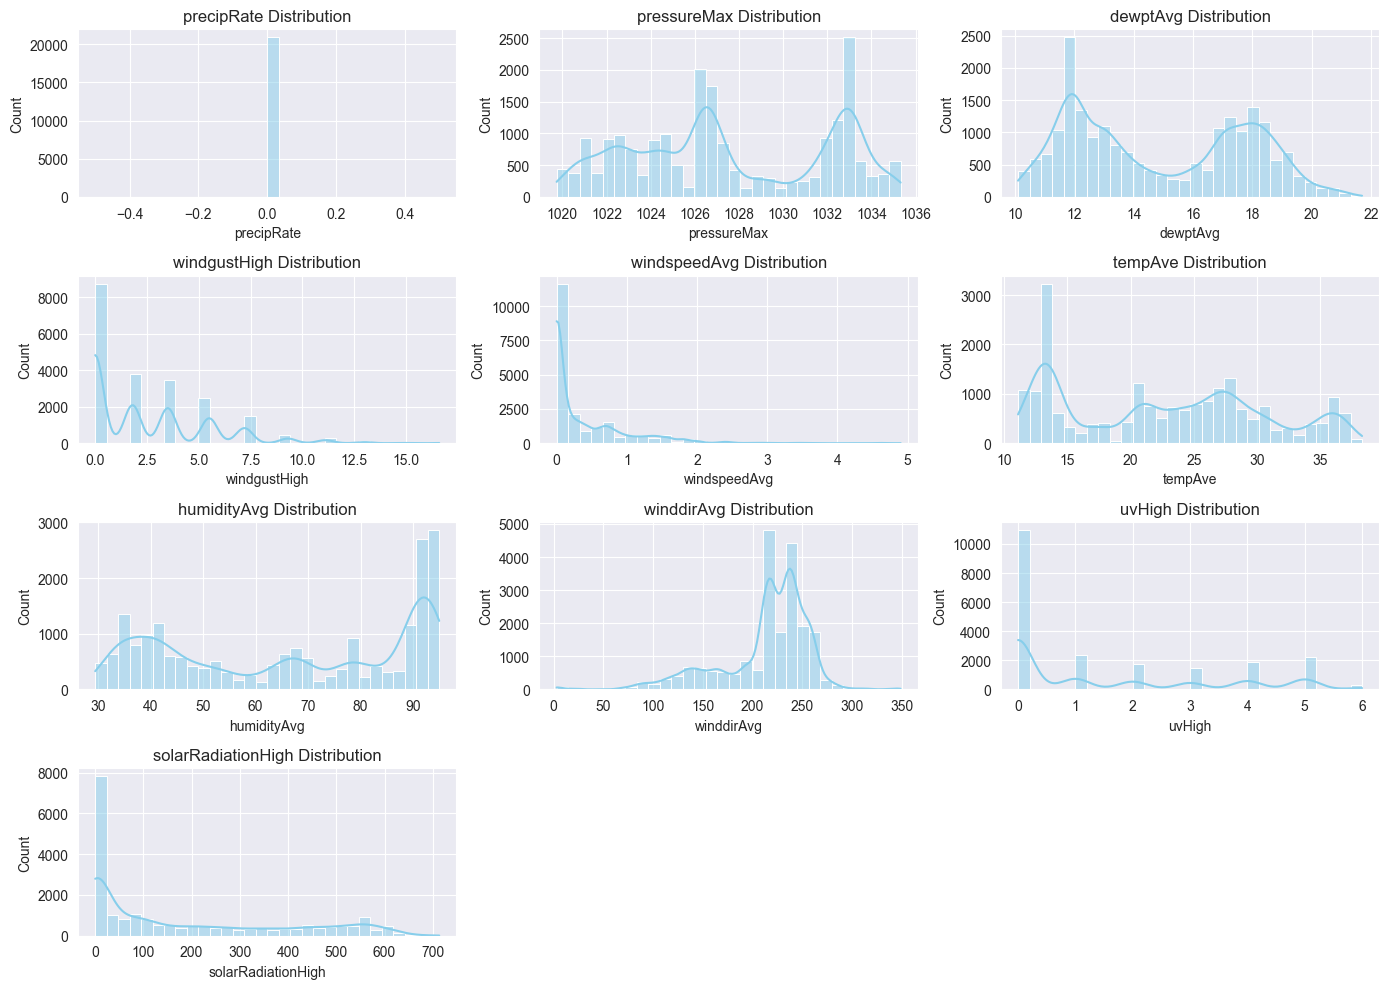

In [13]:
plt.figure(figsize=(14, 10))
for i, col in enumerate(weather_cols, 1):
    plt.subplot(4, 3, i)
    sns.histplot(data_top10[col].dropna(), bins=30, kde=True, color="skyblue")
    plt.title(f"{col} Distribution")
plt.tight_layout()
plt.show()


### Distribution Insights

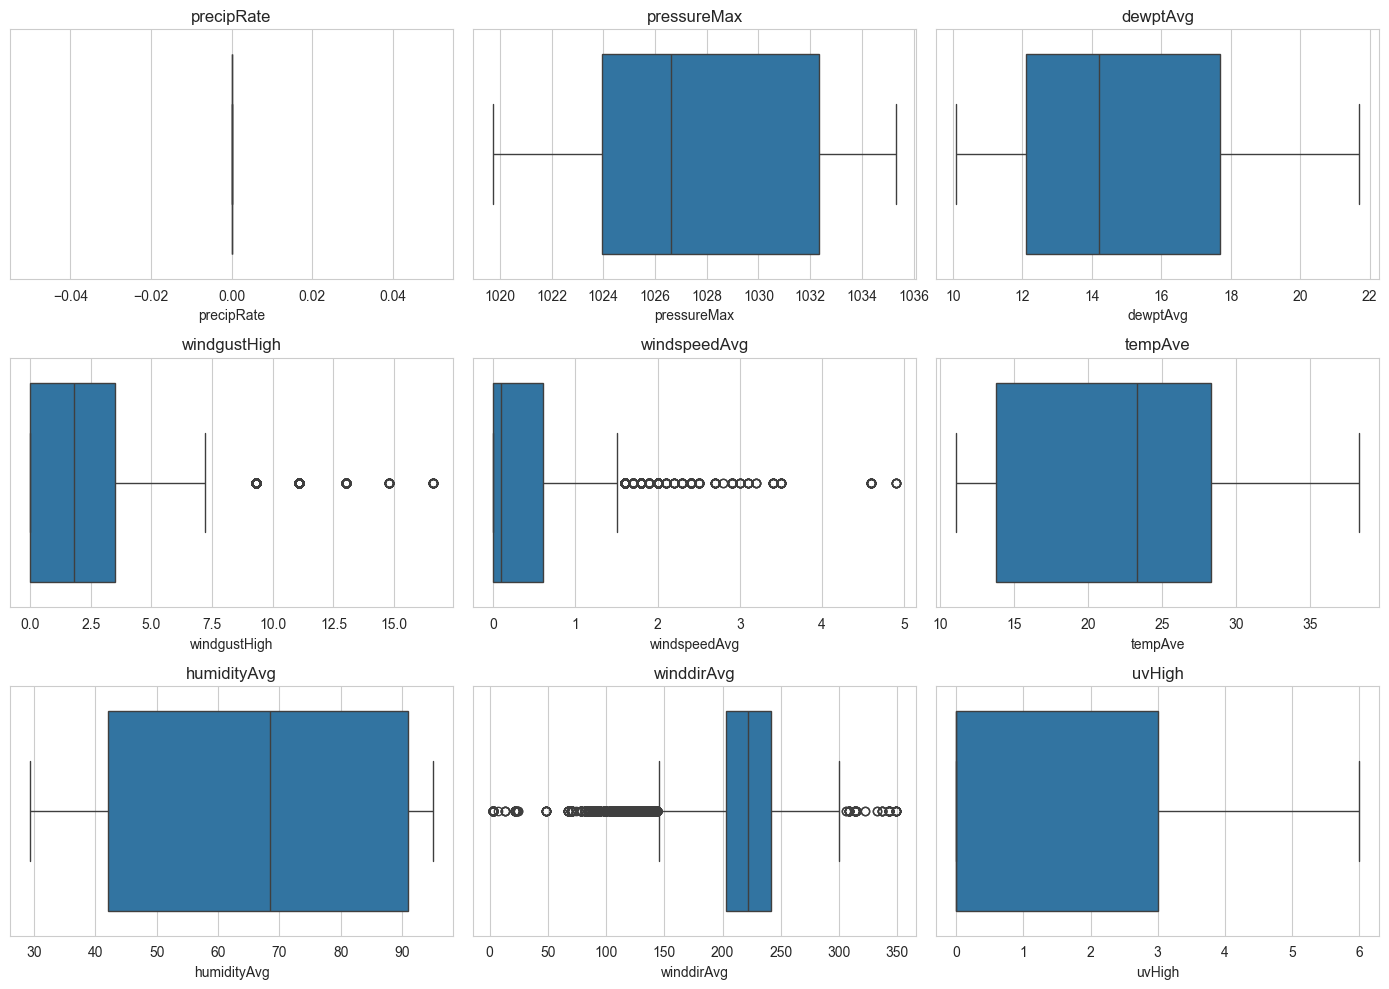

In [15]:
fig, axes = plt.subplots(3, 3, figsize=(14,10))
axes = axes.flatten()

for i, col in enumerate(weather_cols[:9]):  # limit to first 9 for readability
    sns.boxplot(x=data_top10[col], ax=axes[i])
    axes[i].set_title(col)
plt.tight_layout()
plt.show()

### Boxplot Insights

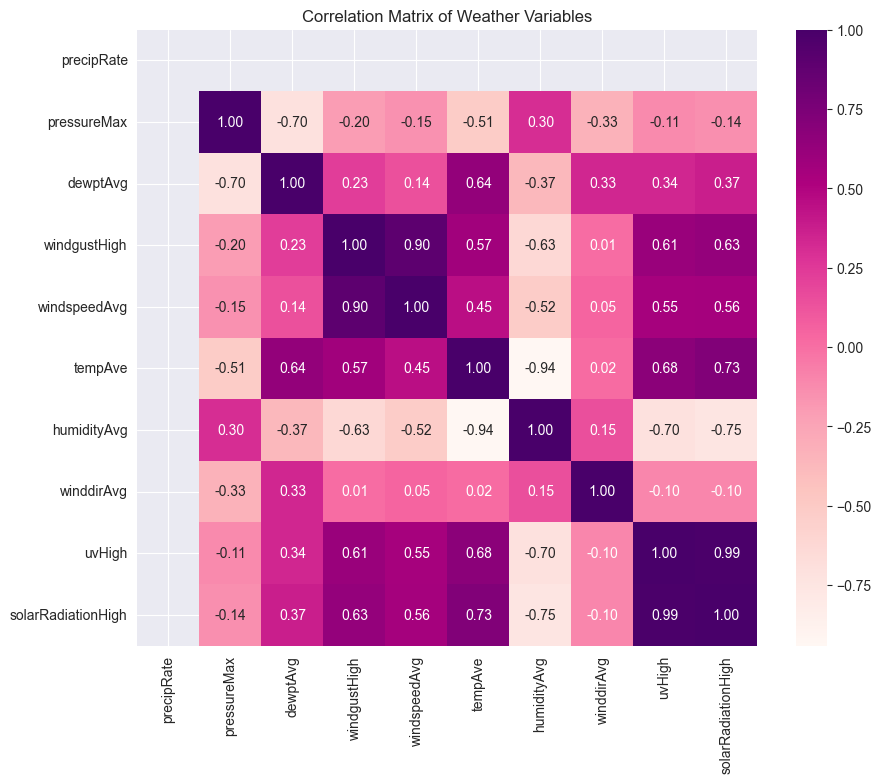

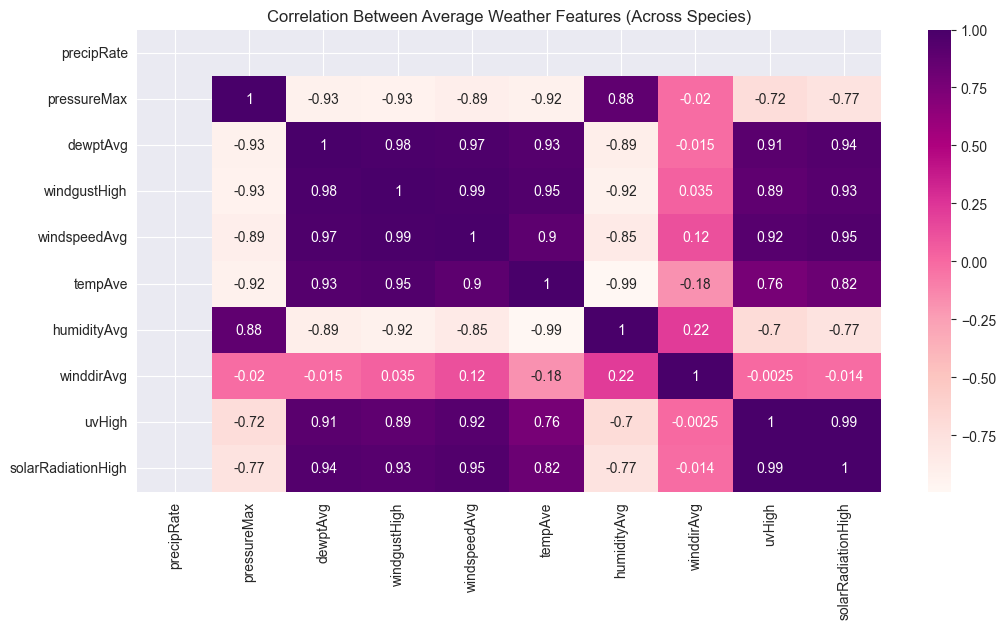

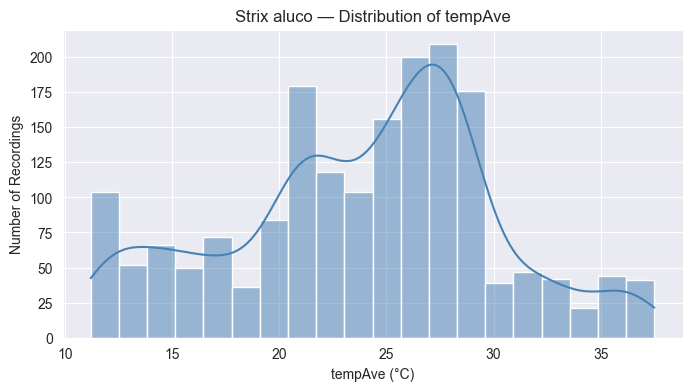

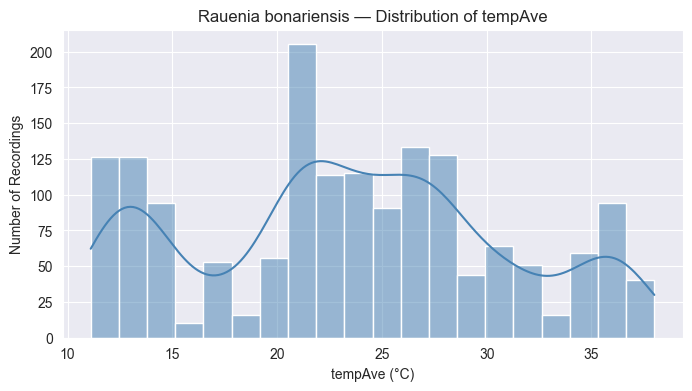

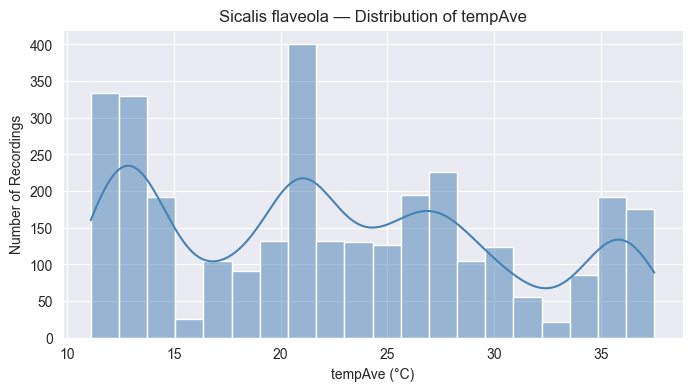

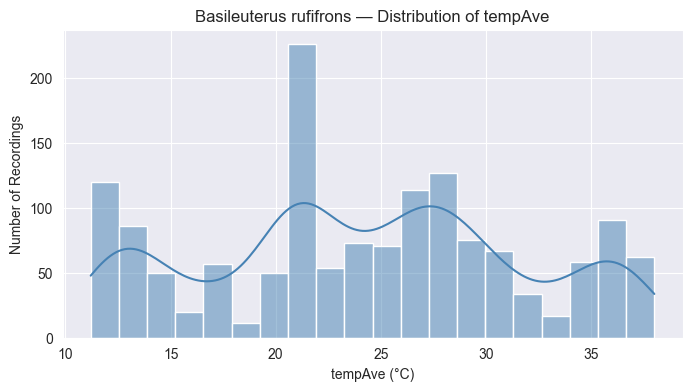

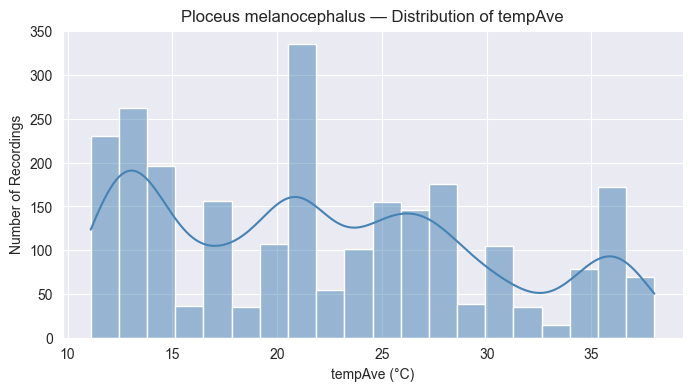

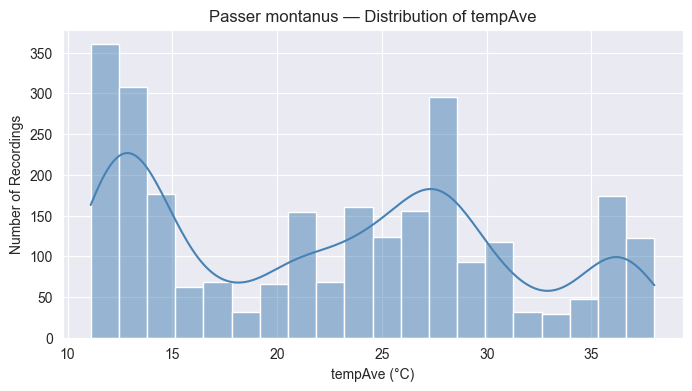

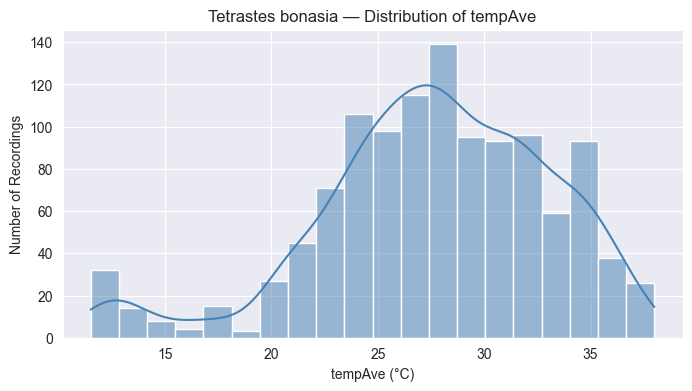

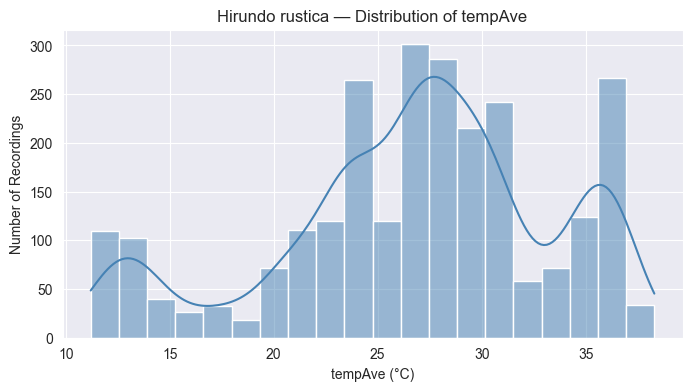

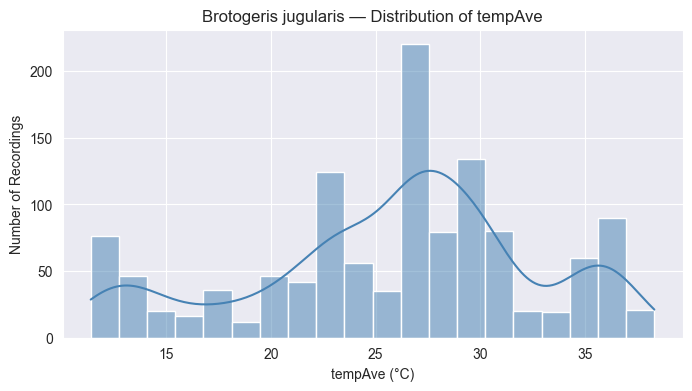

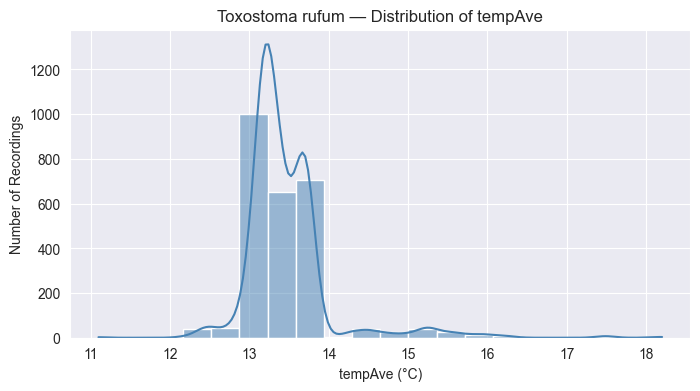

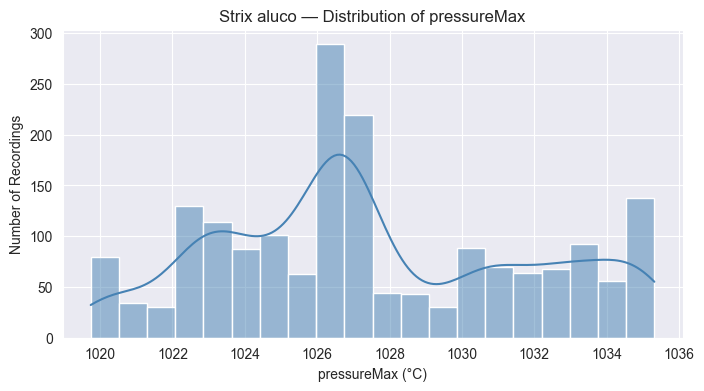

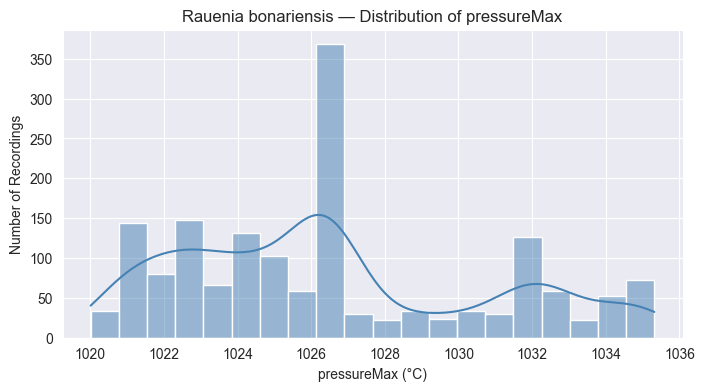

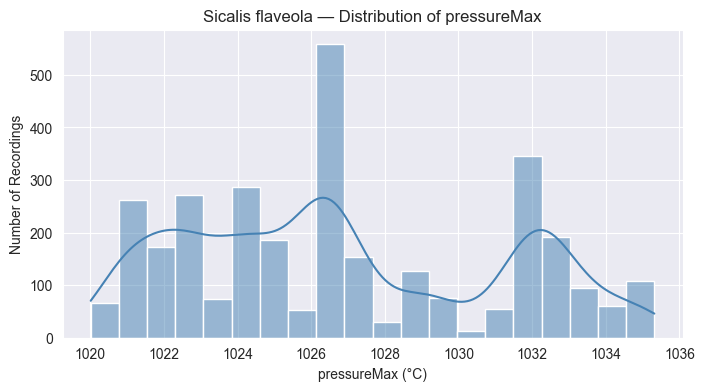

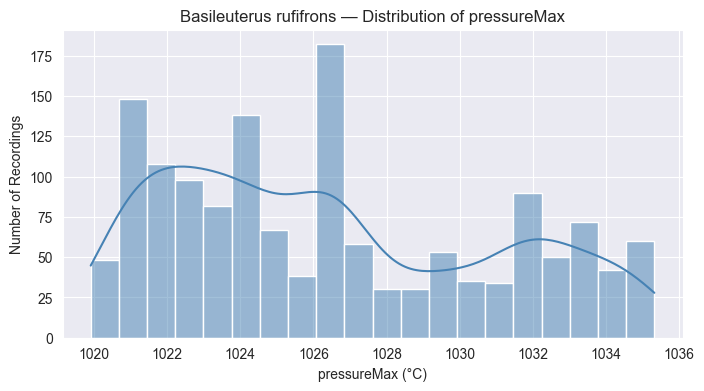

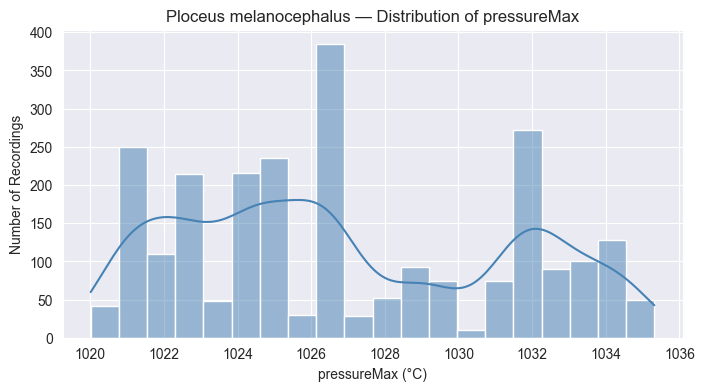

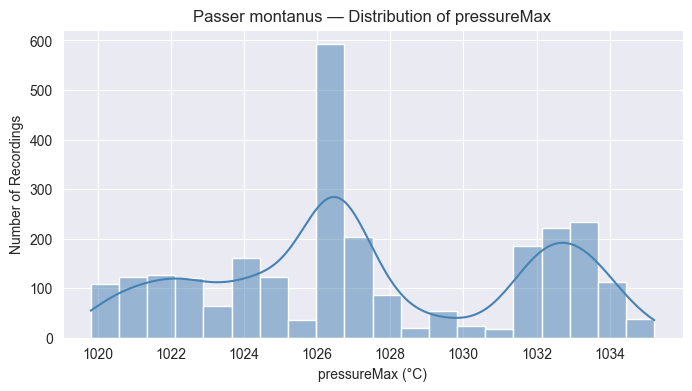

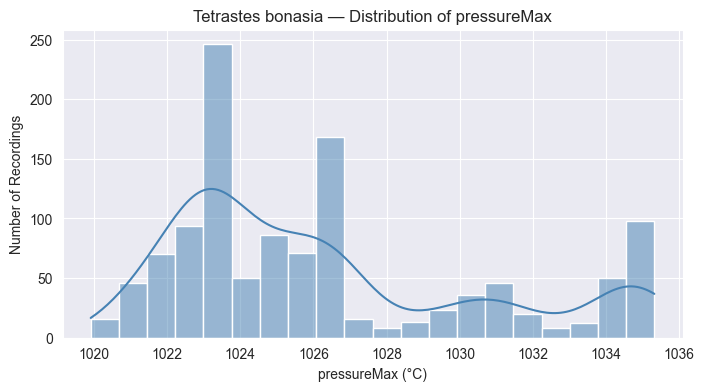

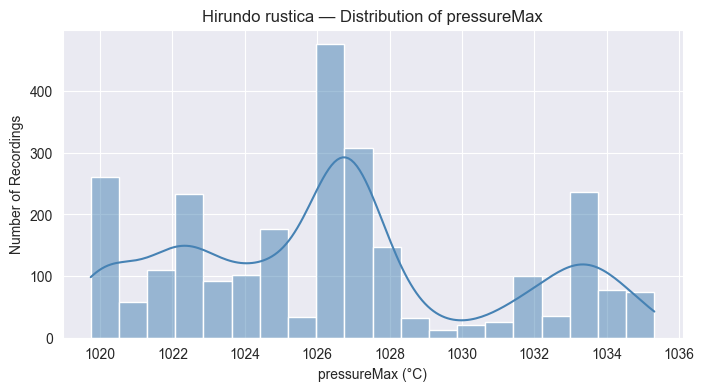

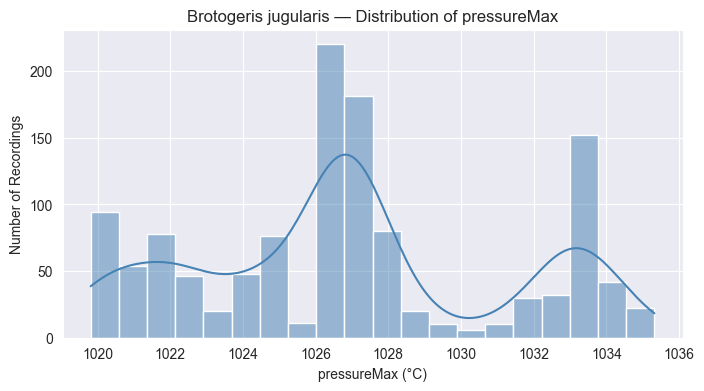

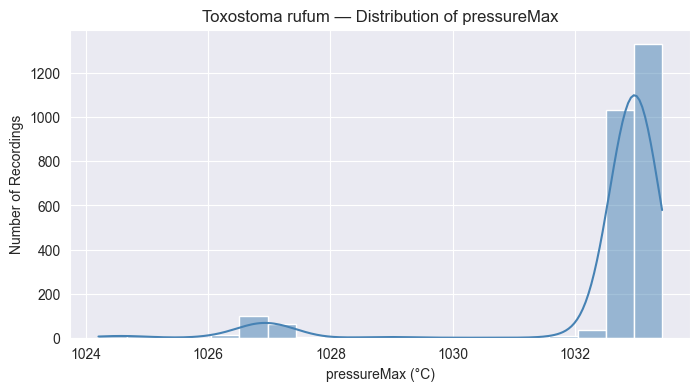

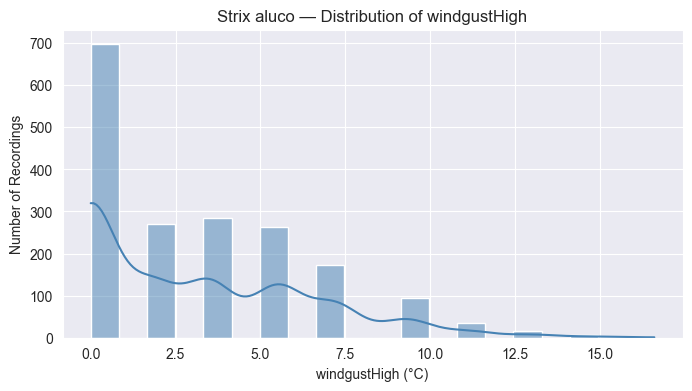

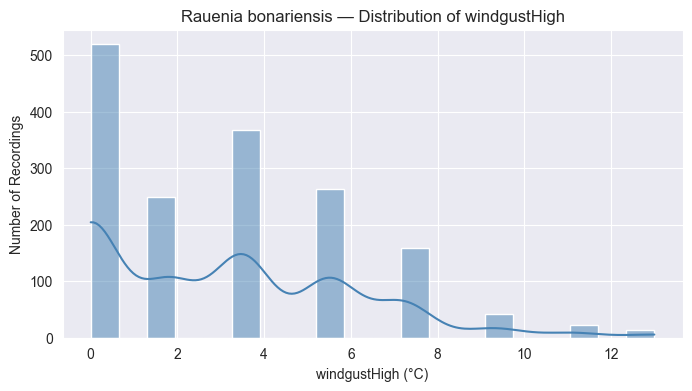

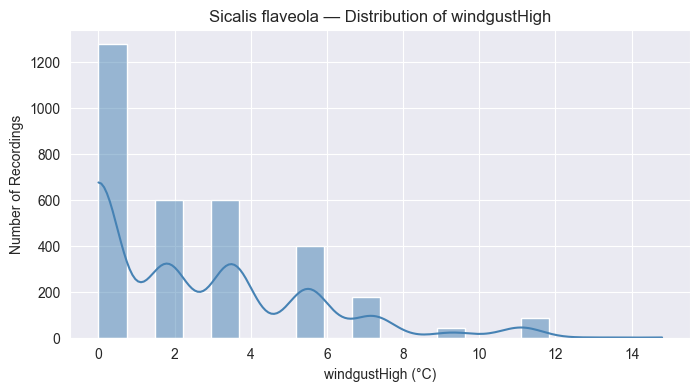

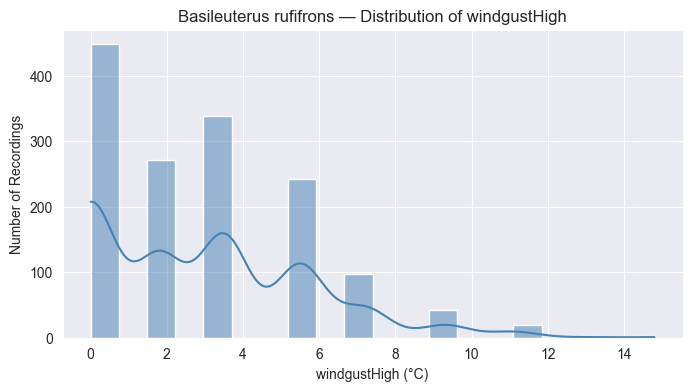

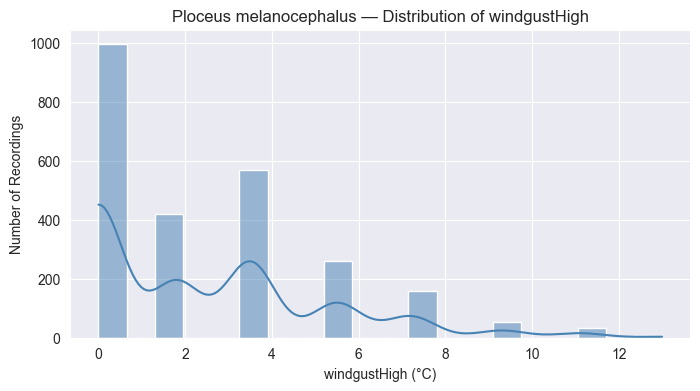

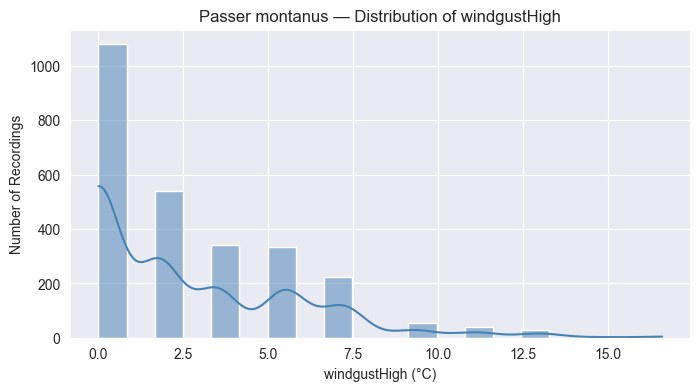

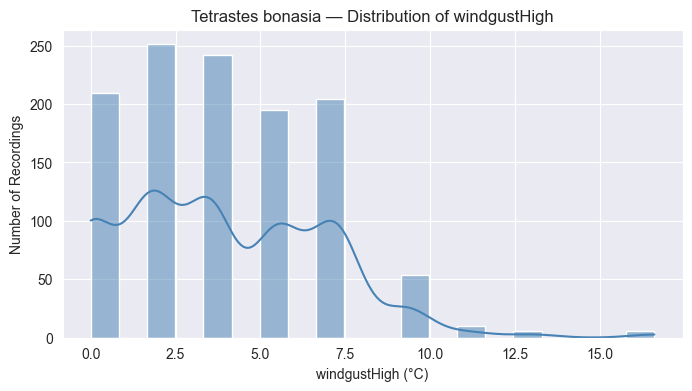

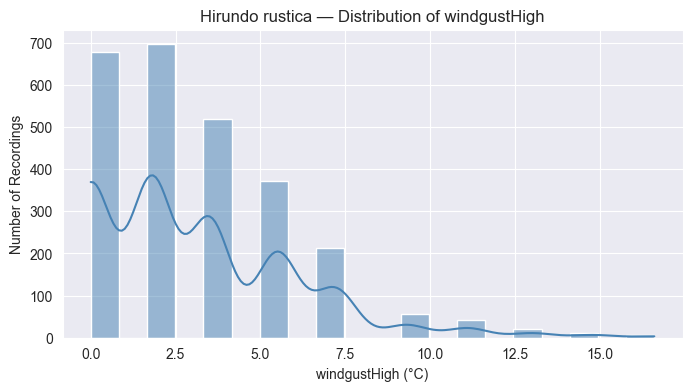

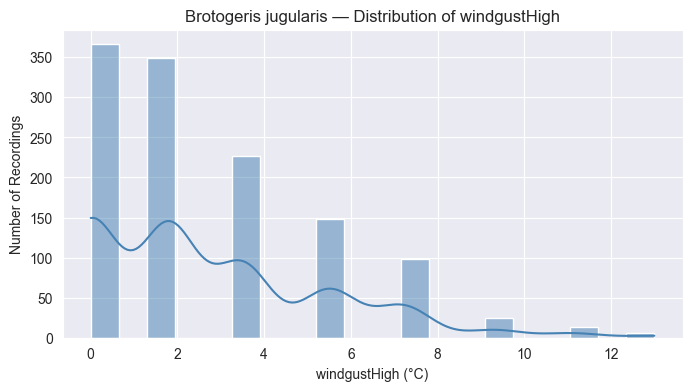

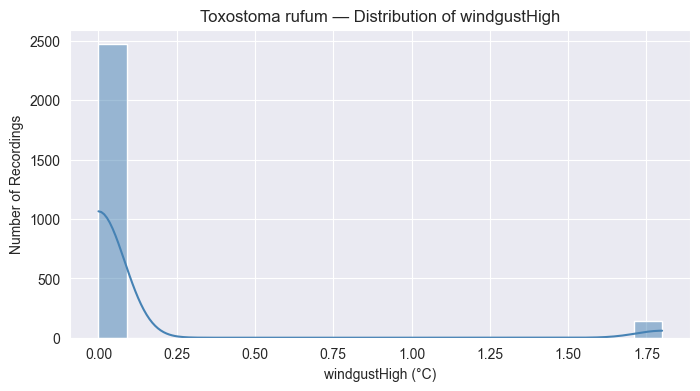

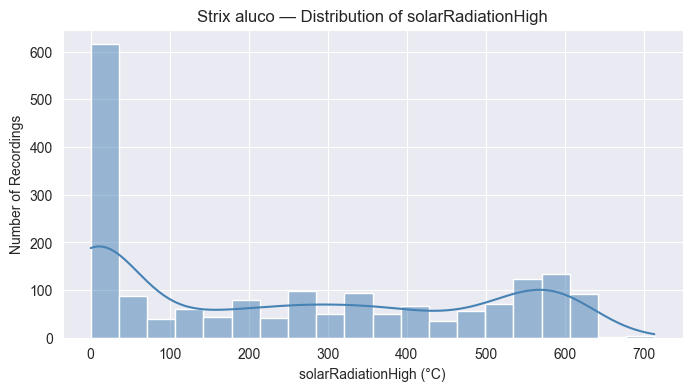

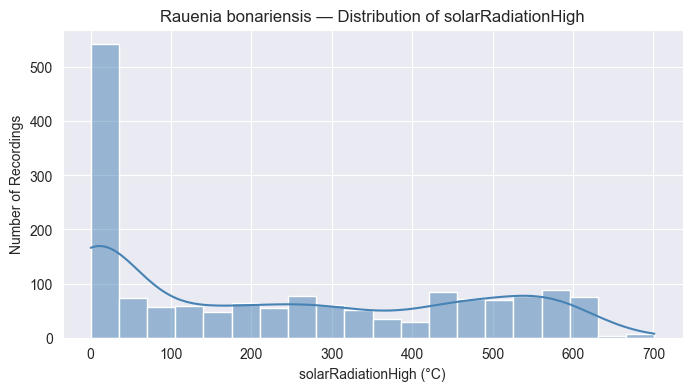

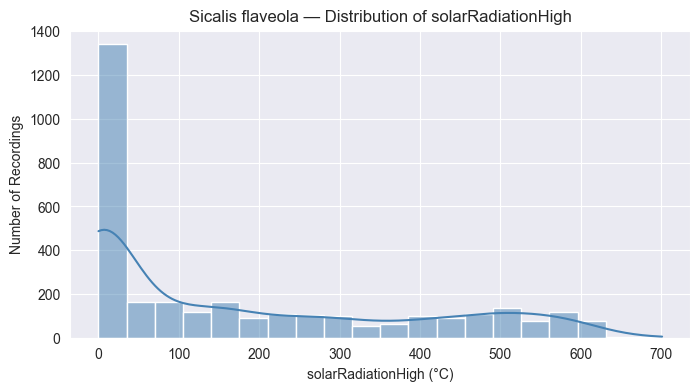

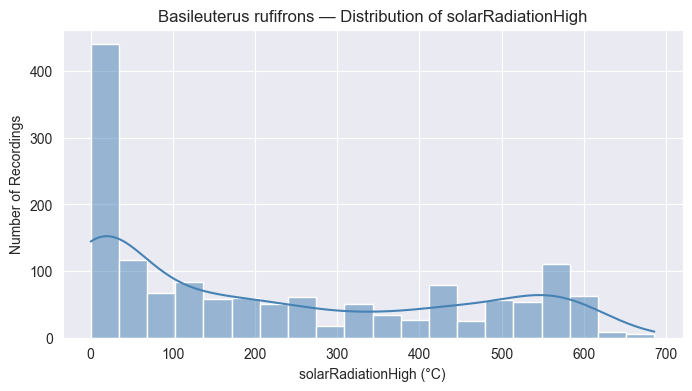

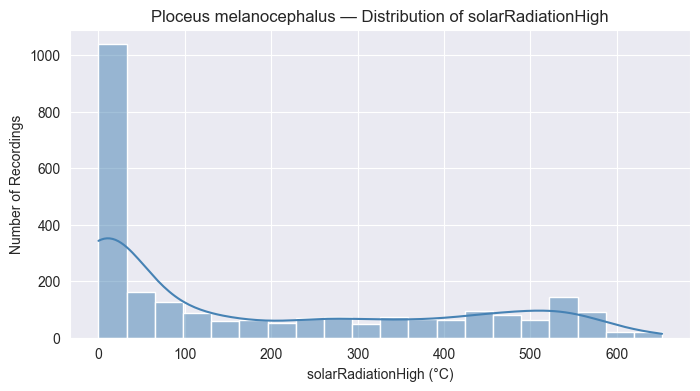

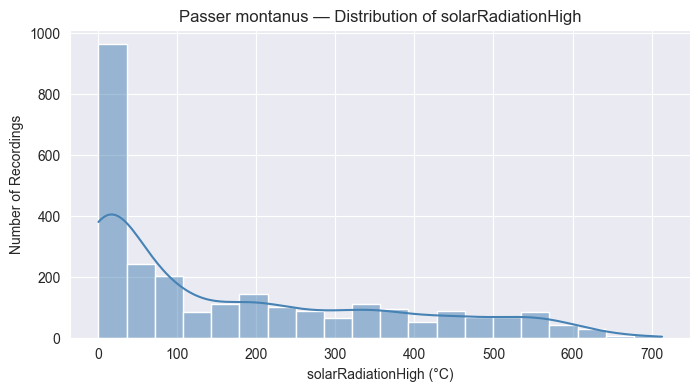

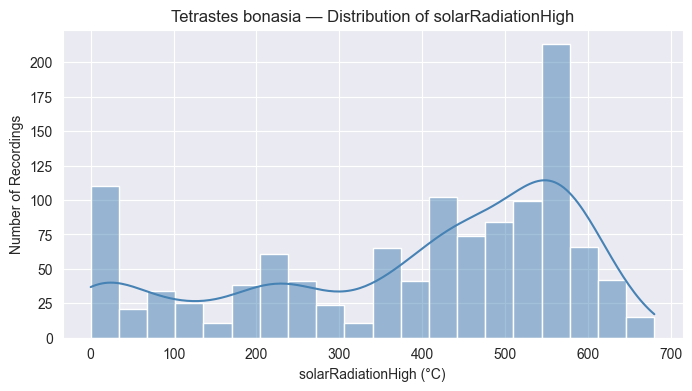

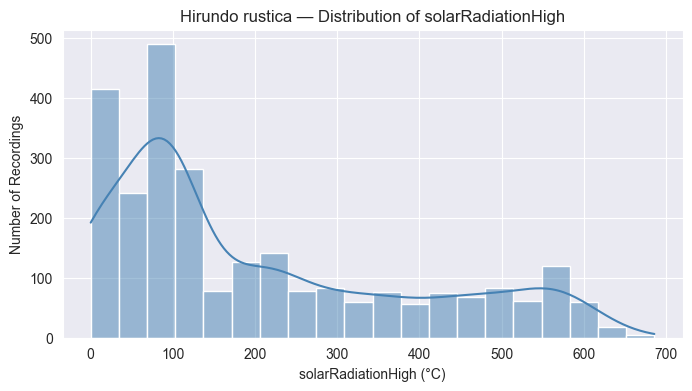

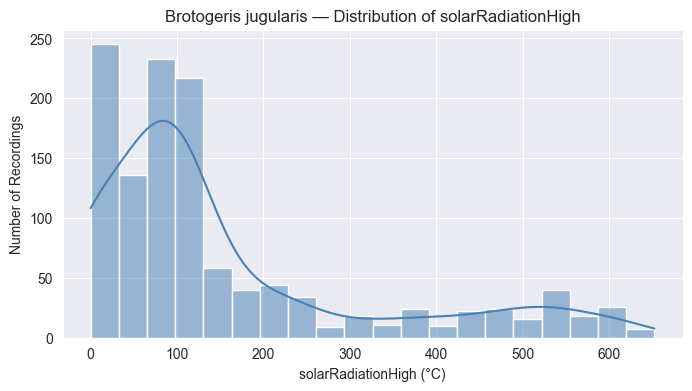

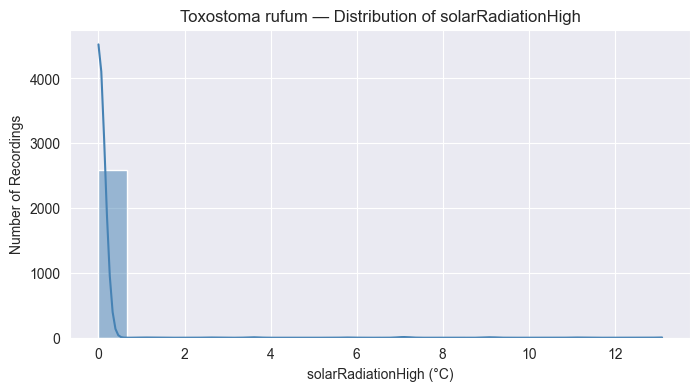

In [14]:
import os
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

#Pearson Correlation
plt.figure(figsize=(10,8))
sns.heatmap(df_weather.corr(), annot=True, fmt=".2f", cmap="RdPu")
plt.title("Correlation Matrix of Weather Variables")
plt.show()

species_weather = (
    data_top10.groupby("scientific_name")[weather_cols].mean()
)
sns.heatmap(species_weather.corr(), annot=True, cmap="RdPu")
plt.title("Correlation Between Average Weather Features (Across Species)")
plt.show()


weather_feature = ["tempAve", "pressureMax", "windgustHigh", "solarRadiationHigh"]
species_list = data_top10["scientific_name"].unique()
os.makedirs(f"Plots", exist_ok=True)
for weather in weather_feature:
    for species in species_list:
        subset = data_top10[data_top10["scientific_name"] == species]
        plt.figure(figsize=(8,4))
        sns.histplot(subset[weather], bins=20, kde=True, color="steelblue")
        plt.title(f"{species} — Distribution of {weather}")
        plt.xlabel(f"{weather} (°C)")
        plt.ylabel("Number of Recordings")
        os.makedirs(f"Plots/{species}/weather_dist", exist_ok=True)
        plt.savefig(f"Plots/{species}/weather_dist/{species}_{weather}.png", dpi=300)
        plt.show()


### Correlation Analysis
Correlation range <-1,1>
Negative correlation = as x feature grows the y feature decreases
Positive correlation = both x and y features increase or decrease together
0 = no linear correlation (can have non-linear correlation)
### Distribution Summary
Most Basileuterus rufifrons recordings occur in mild, calm, low-light conditions.
less data is collected happen when weather is hot, windy, bright, or under shifting pressure,
rather than suggesting uncommon environmental contexts or acoustic outliers I think it is more related to the time of the year the recordings were recorded in. Suggesting that it is better if we can compare seasons instead. (Ask Gaia to record more audio now during colder days?), look into daily weather dist

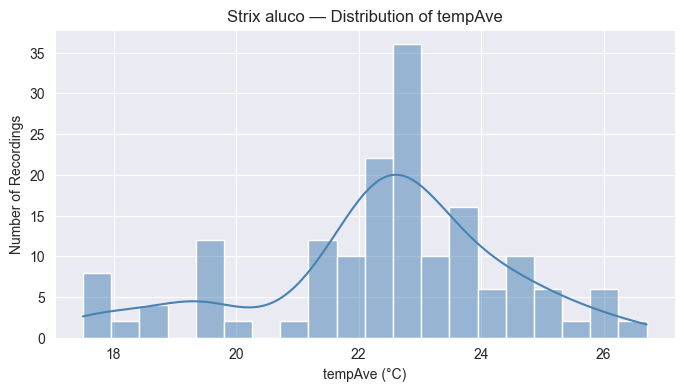

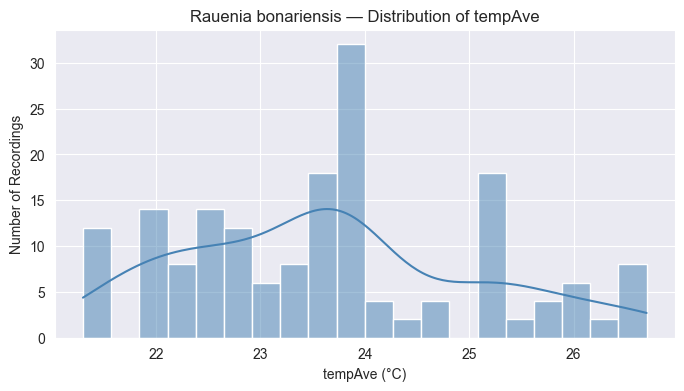

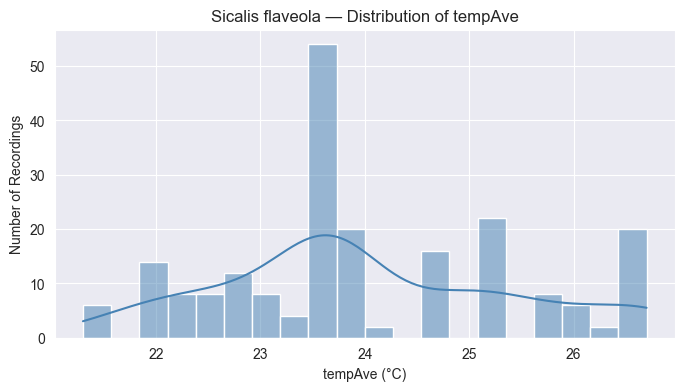

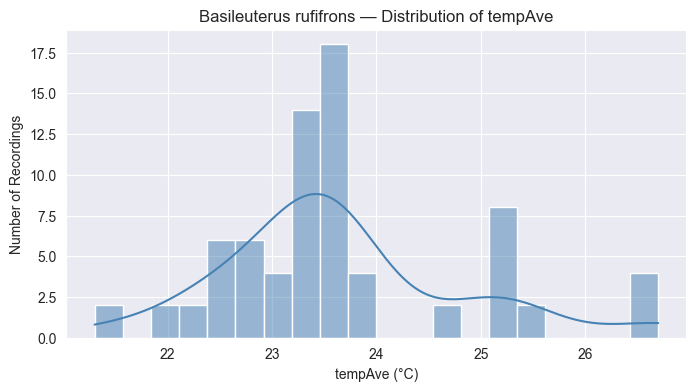

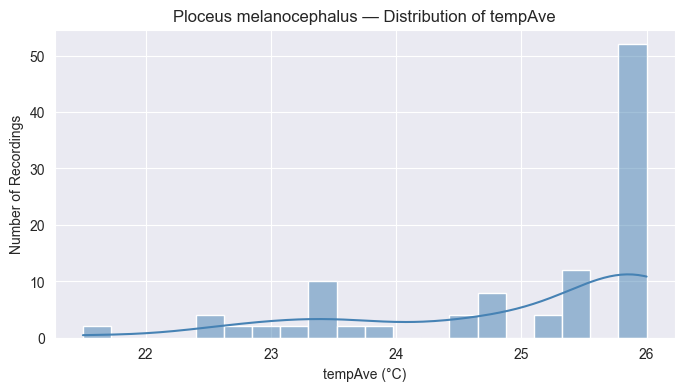

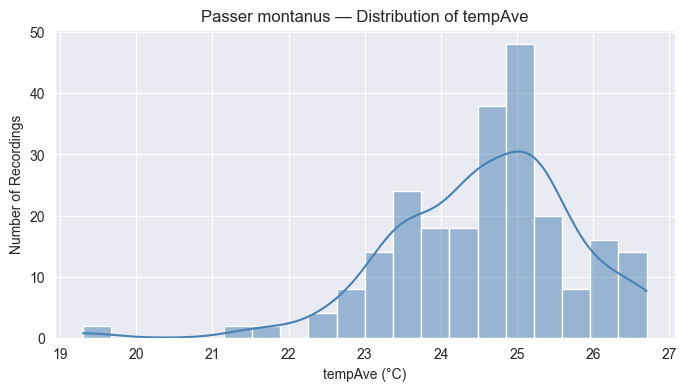

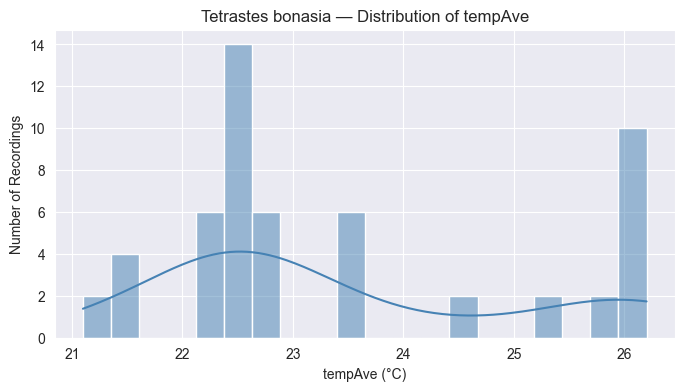

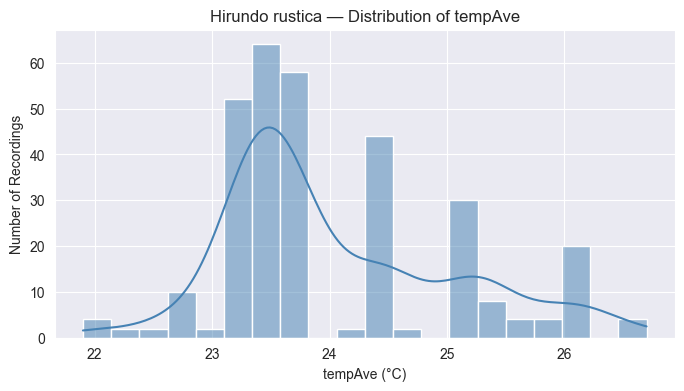

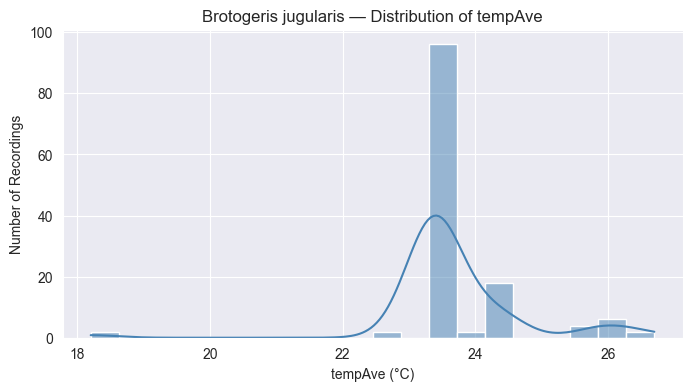

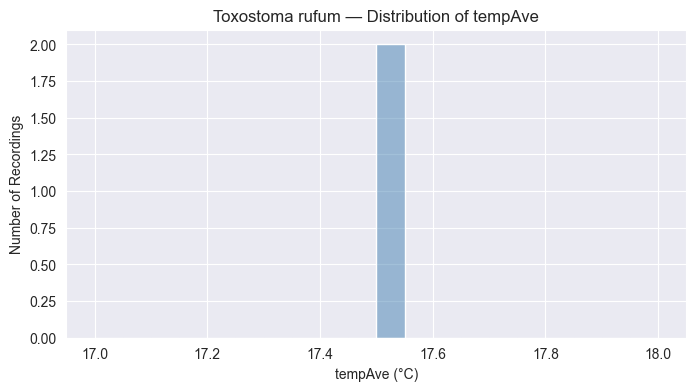

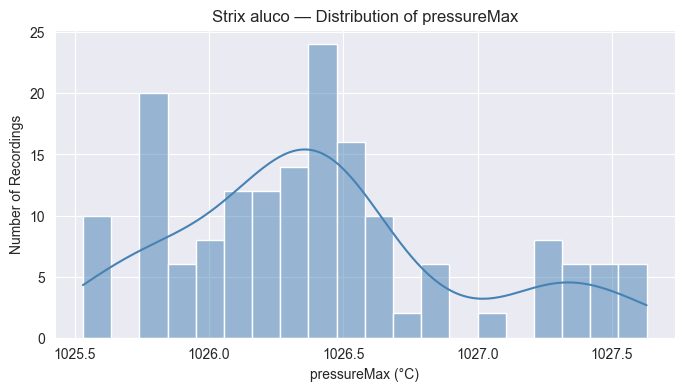

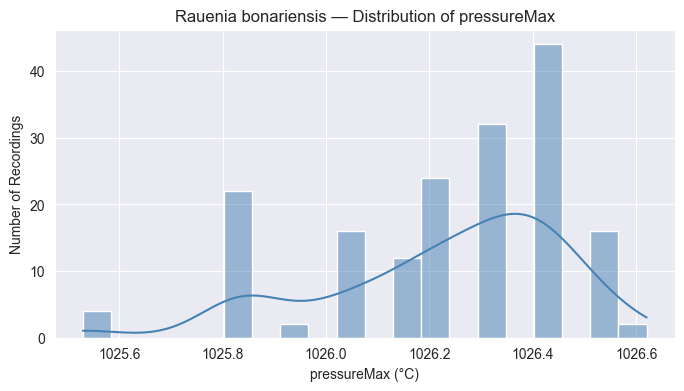

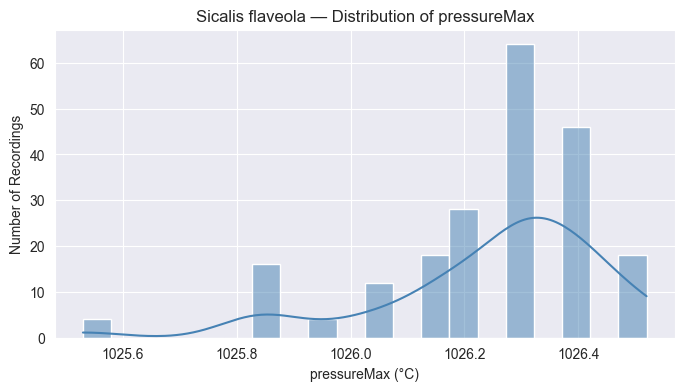

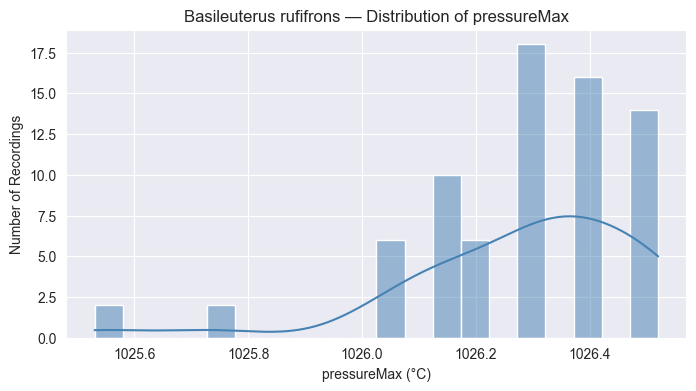

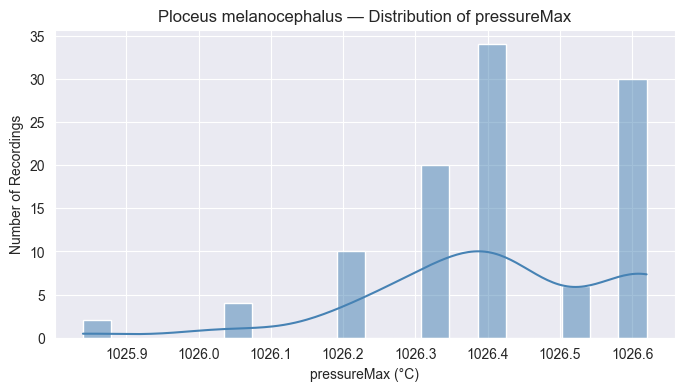

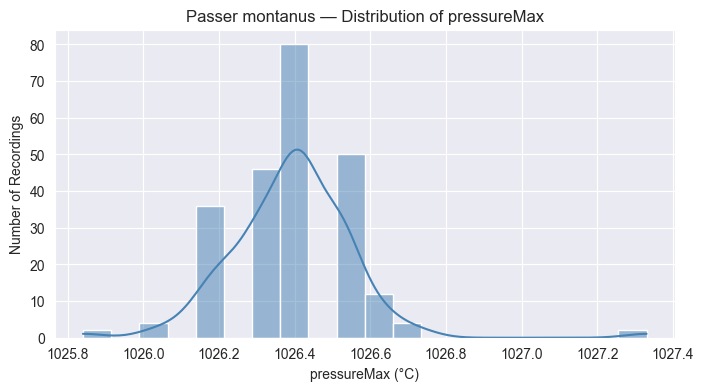

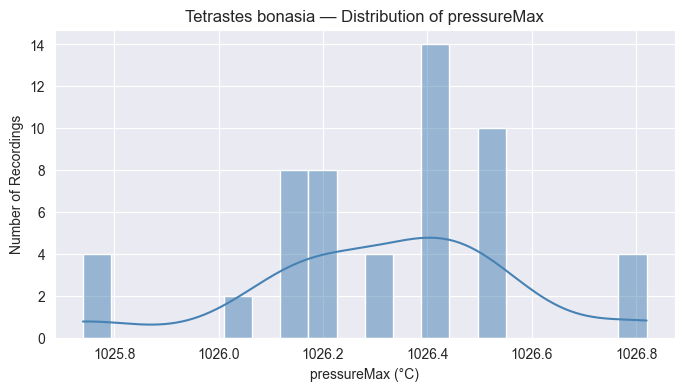

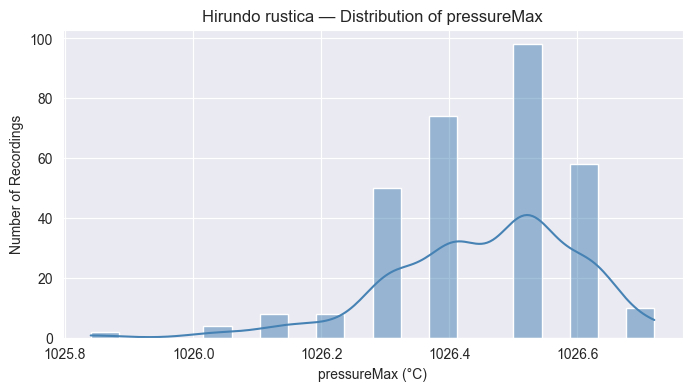

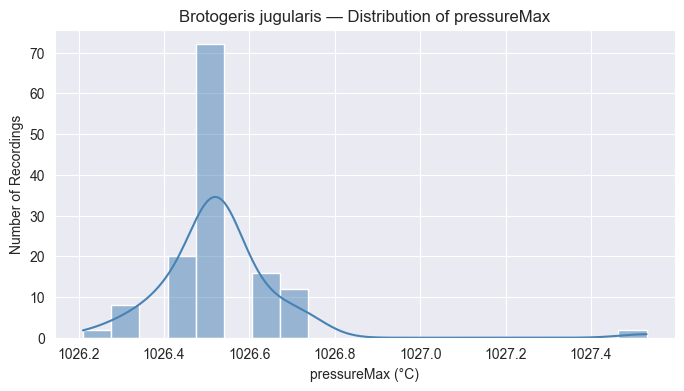

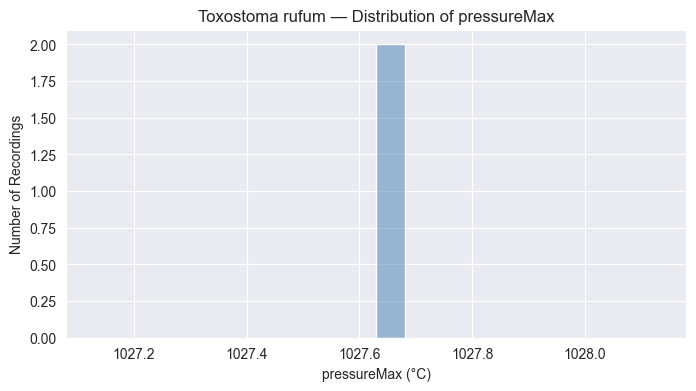

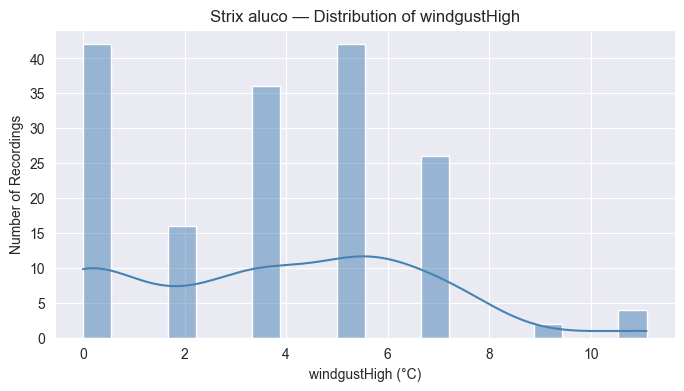

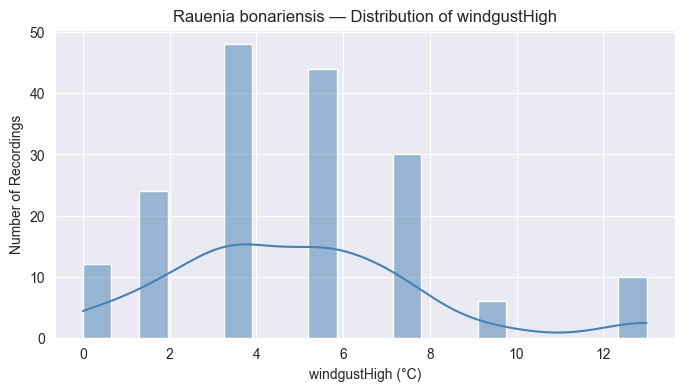

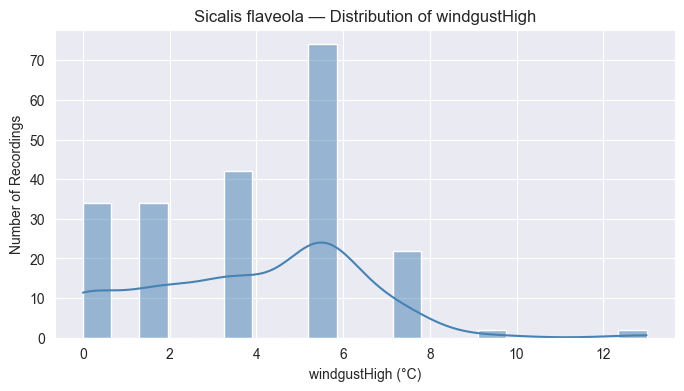

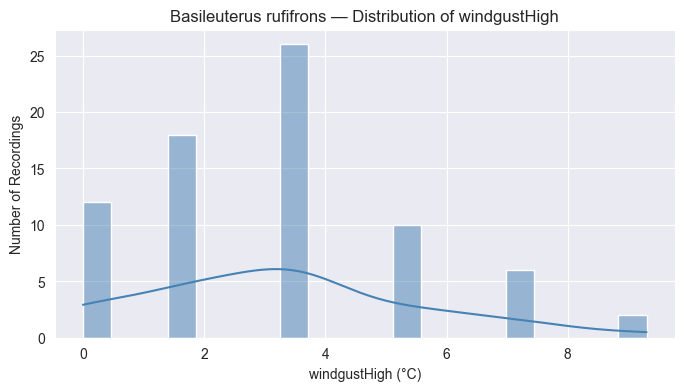

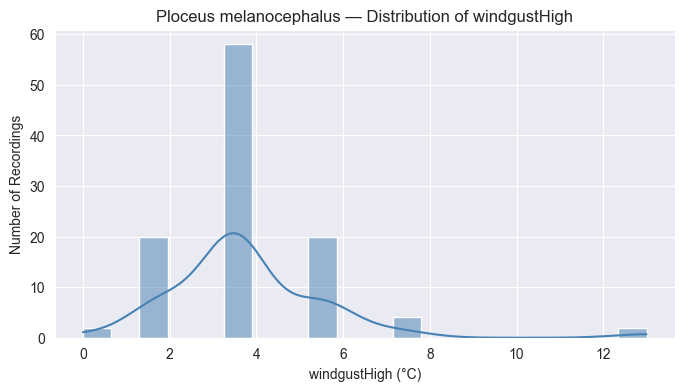

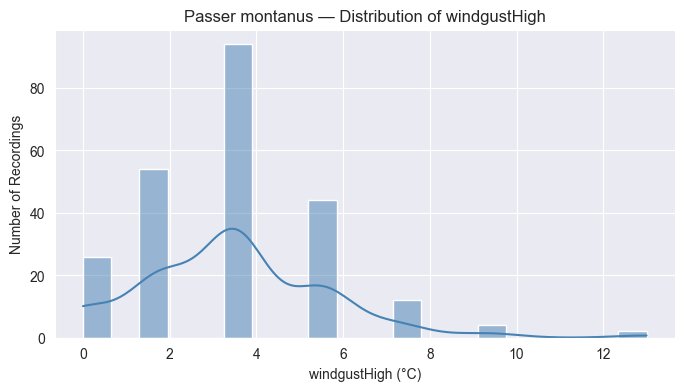

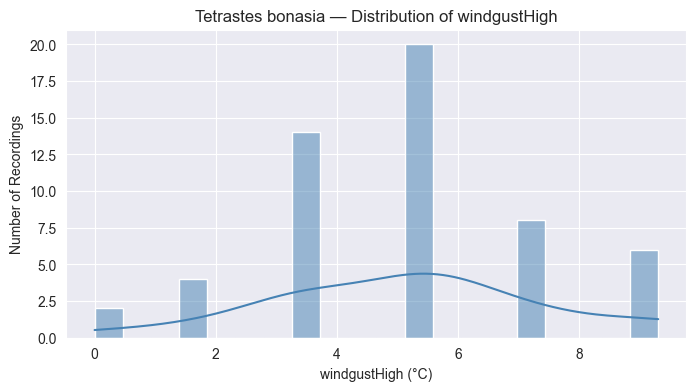

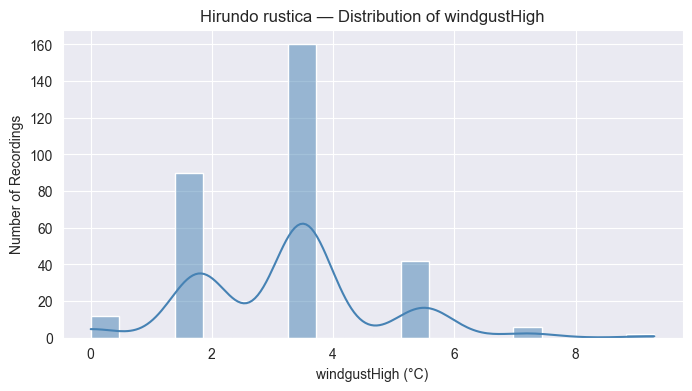

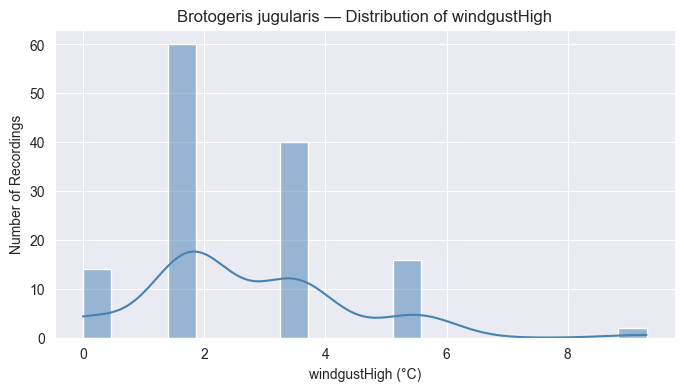

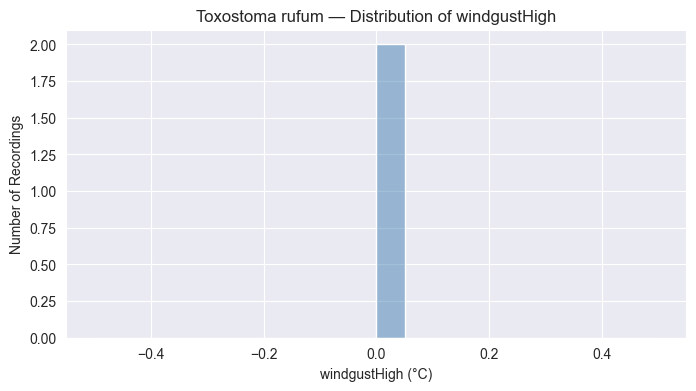

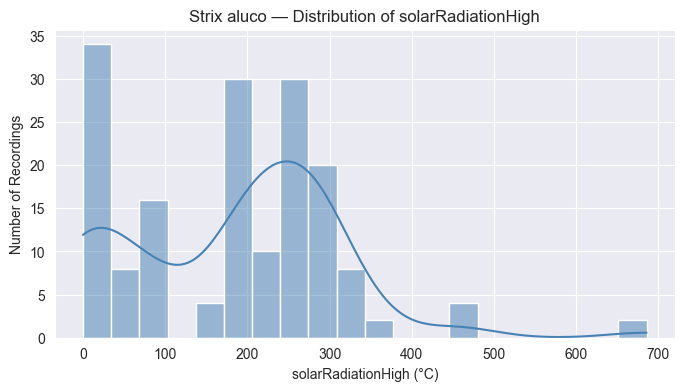

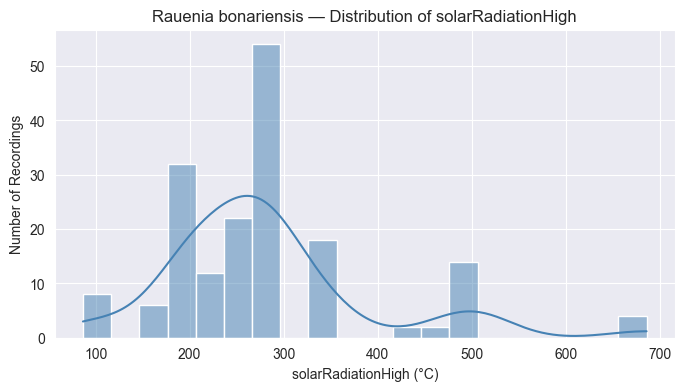

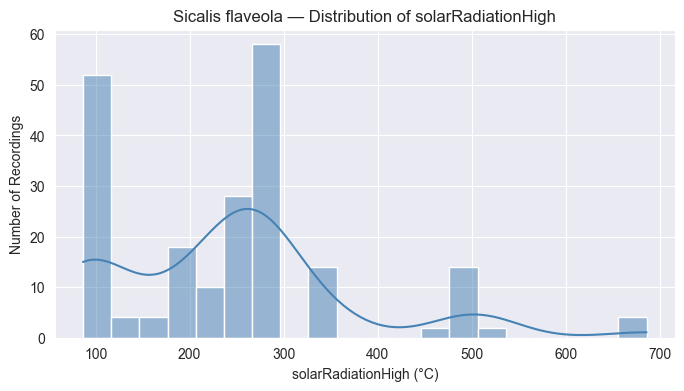

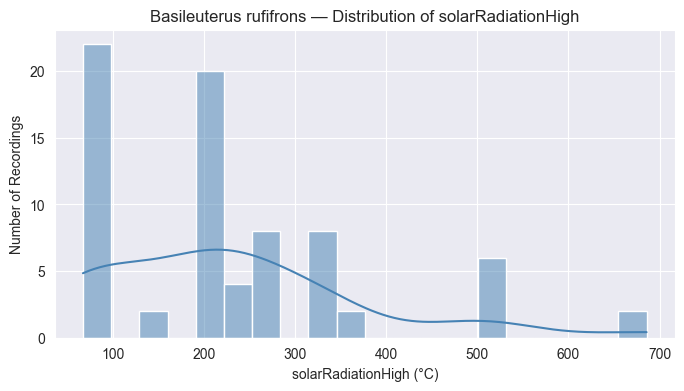

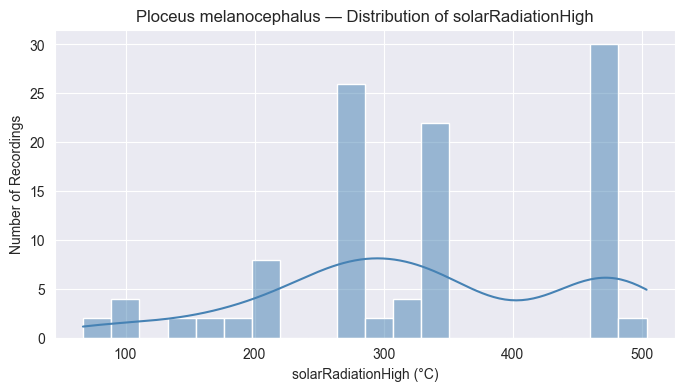

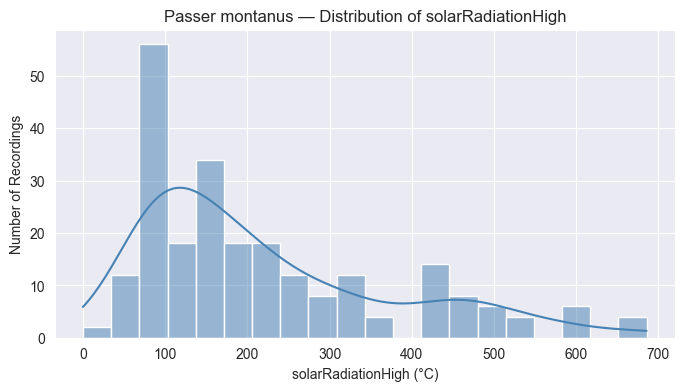

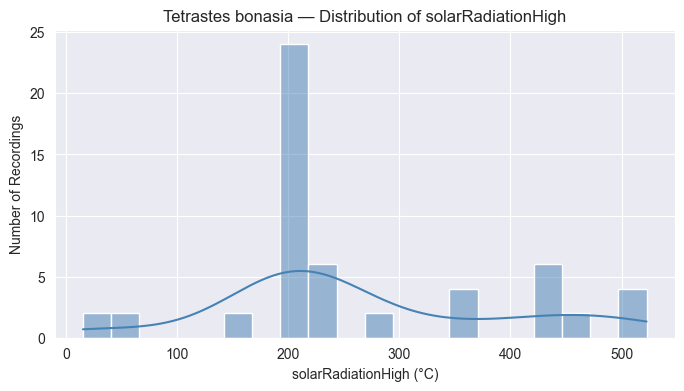

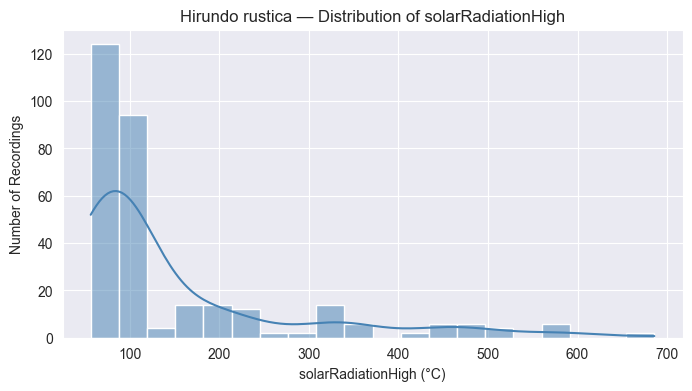

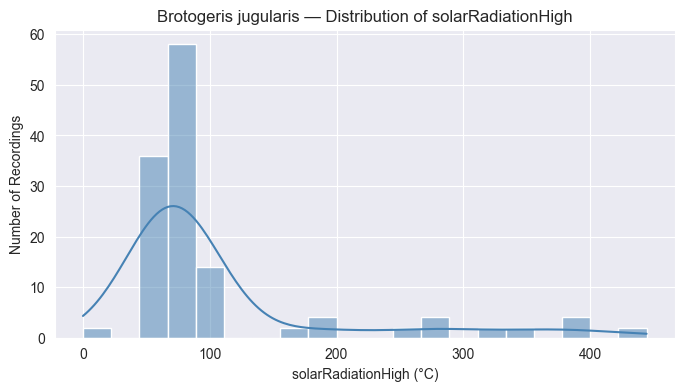

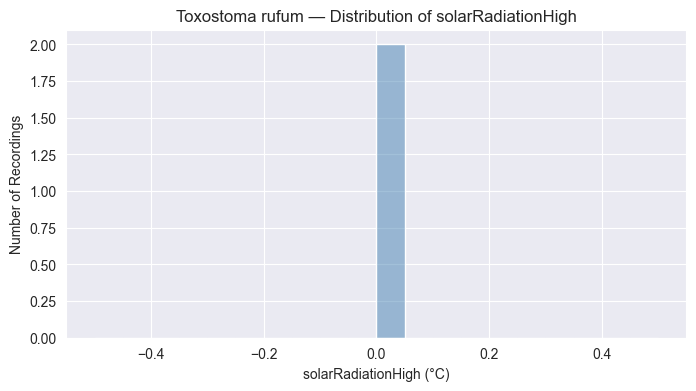

In [15]:
def generate_timespan_dataframe(data_frame, datetime_start, datetime_end):
    df = data_frame.copy()
    df["datetime"] = pd.to_datetime(df["datetime"], errors="coerce")
    mask = (df["datetime"] >= datetime_start) & (df["datetime"] <= datetime_end)
    new_df = df.loc[mask]
    return new_df
species = ["Strix aluco"]
subsetDay = generate_timespan_dataframe(data_top10,"2025-08-08", "2025-08-09");
for weather in weather_feature:
    for species in species_list:
        subset = subsetDay[subsetDay["scientific_name"] == species]
        plt.figure(figsize=(8,4))
        sns.histplot(subset[weather], bins=20, kde=True, color="steelblue")
        plt.title(f"{species} — Distribution of {weather}")
        plt.xlabel(f"{weather} (°C)")
        plt.ylabel("Number of Recordings")
        ##os.makedirs(f"Plots/{species}/weather_dist", exist_ok=True)
        plt.savefig(f"Plots/{species}/weather_dist/{species}_{weather}.png", dpi=300)
        plt.show()

Same day, but species are active on diffrent time of a day -> look into it

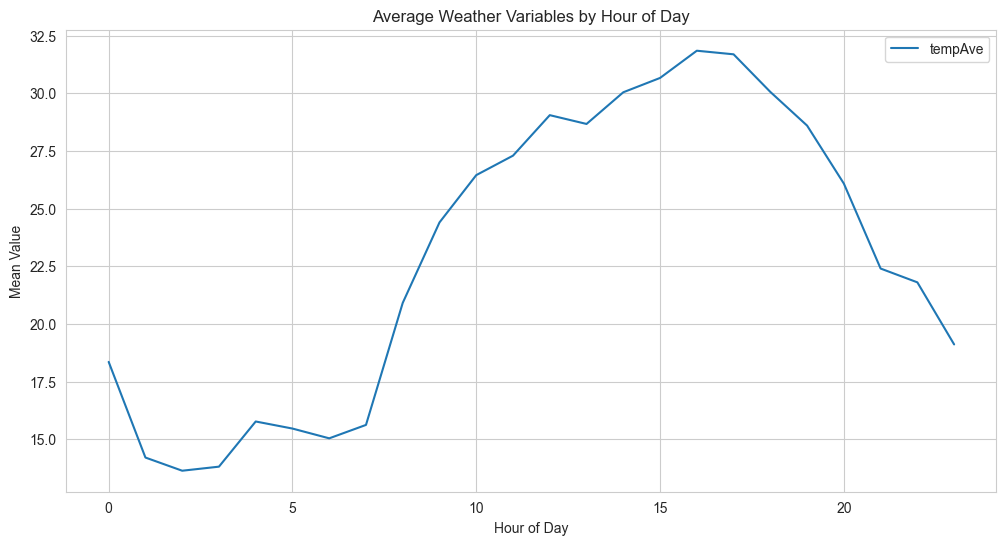

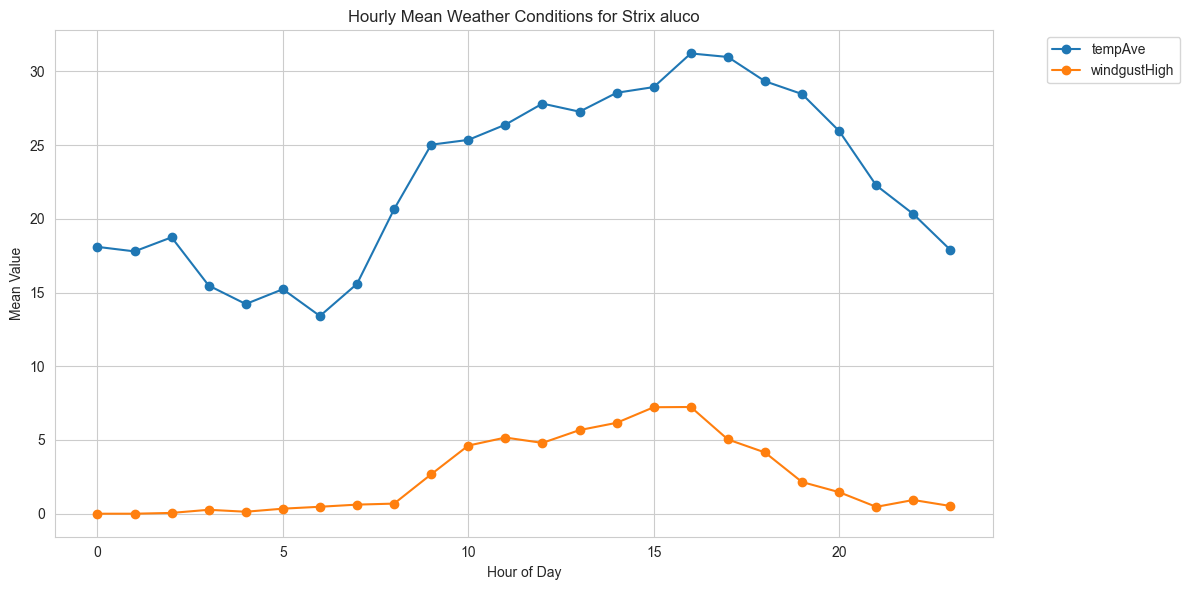

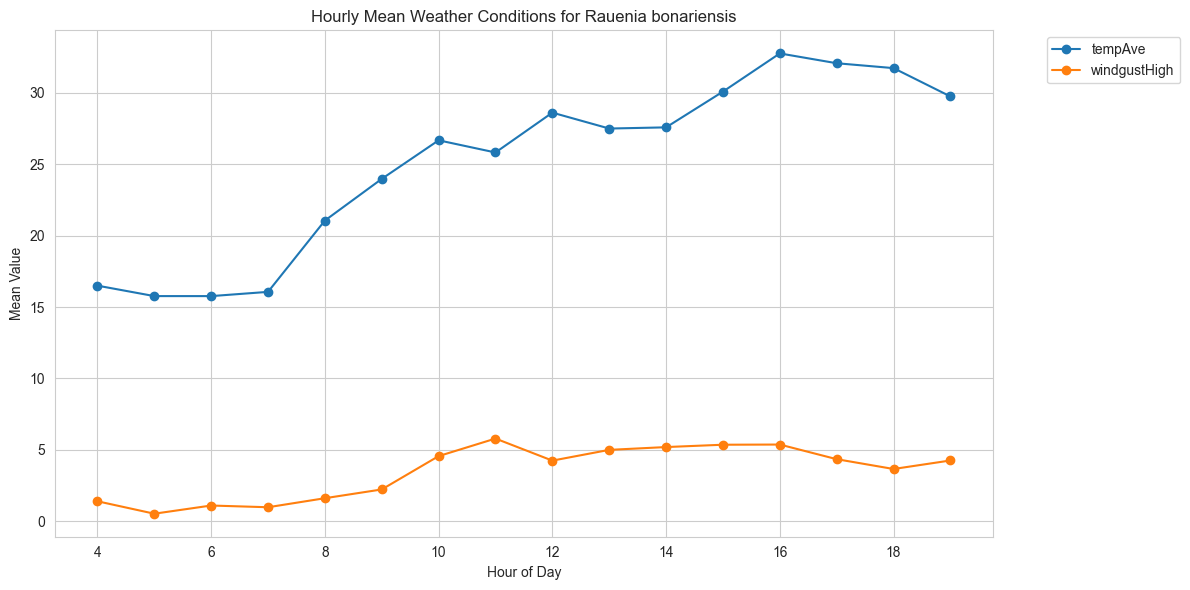

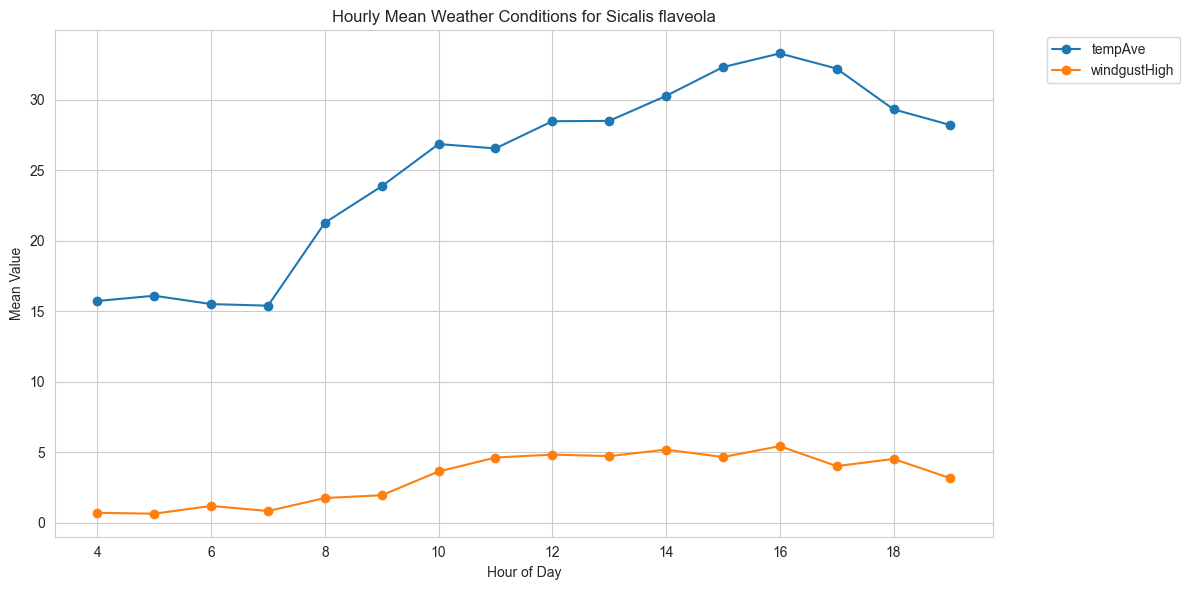

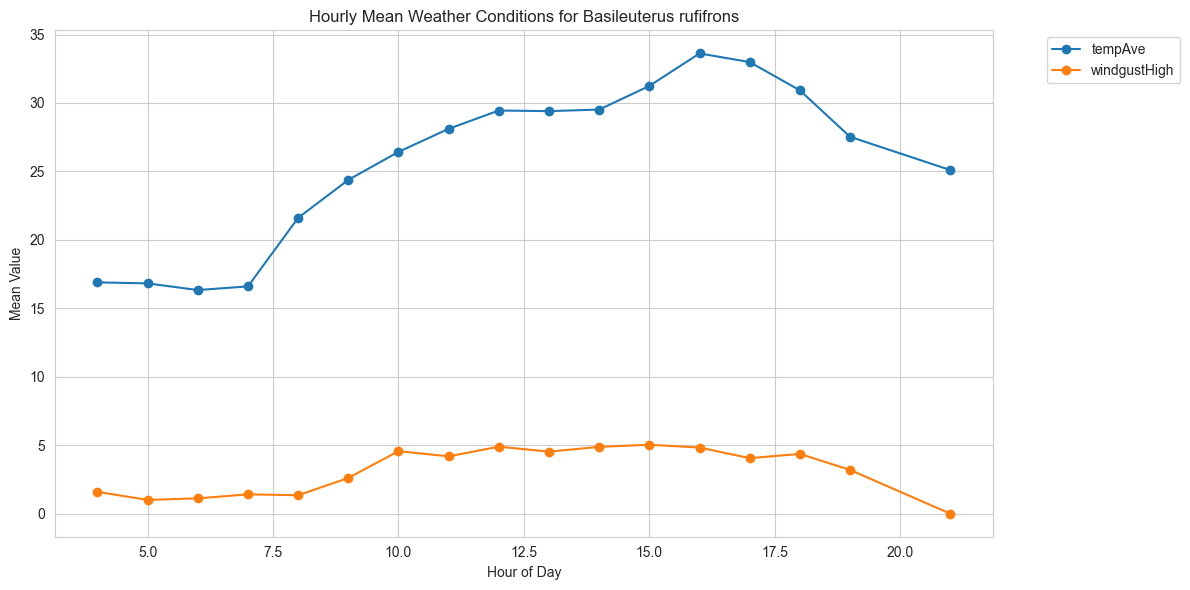

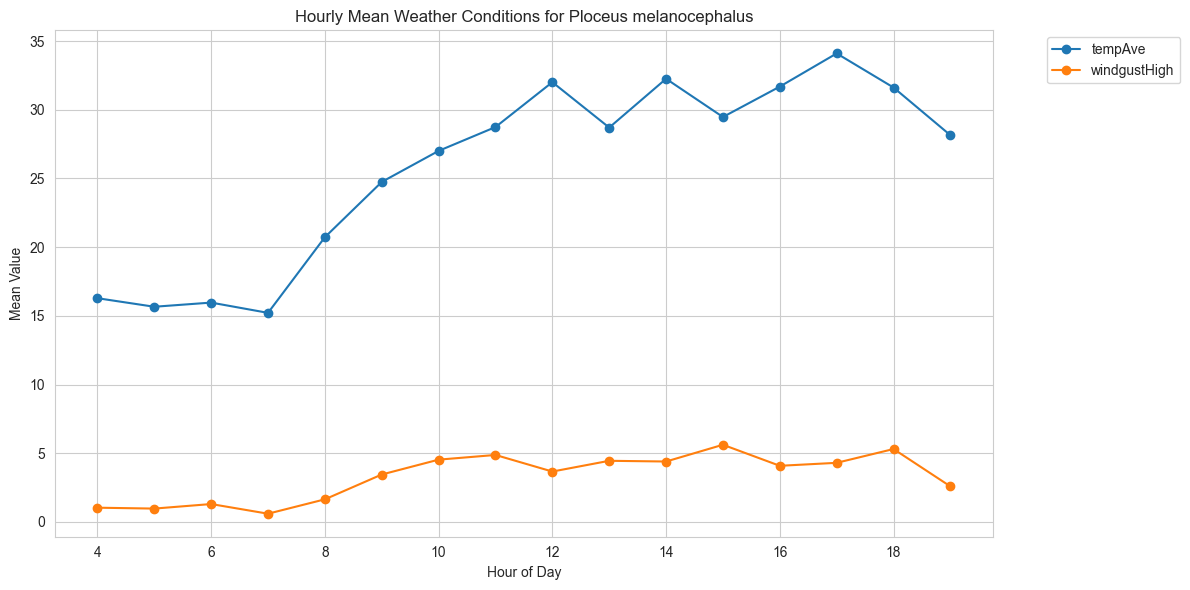

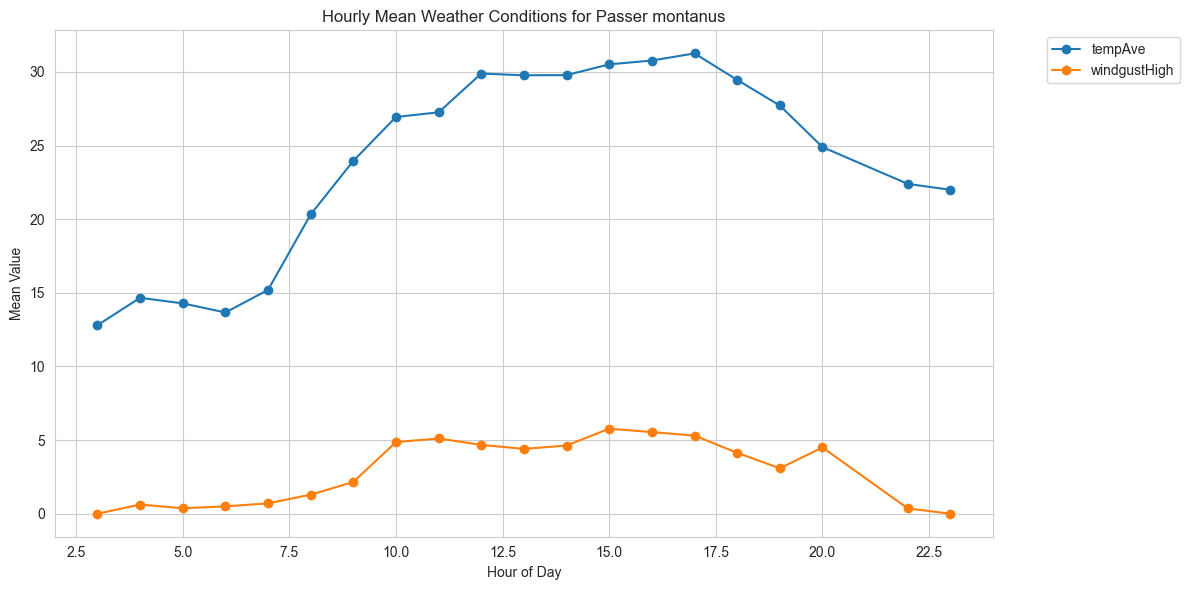

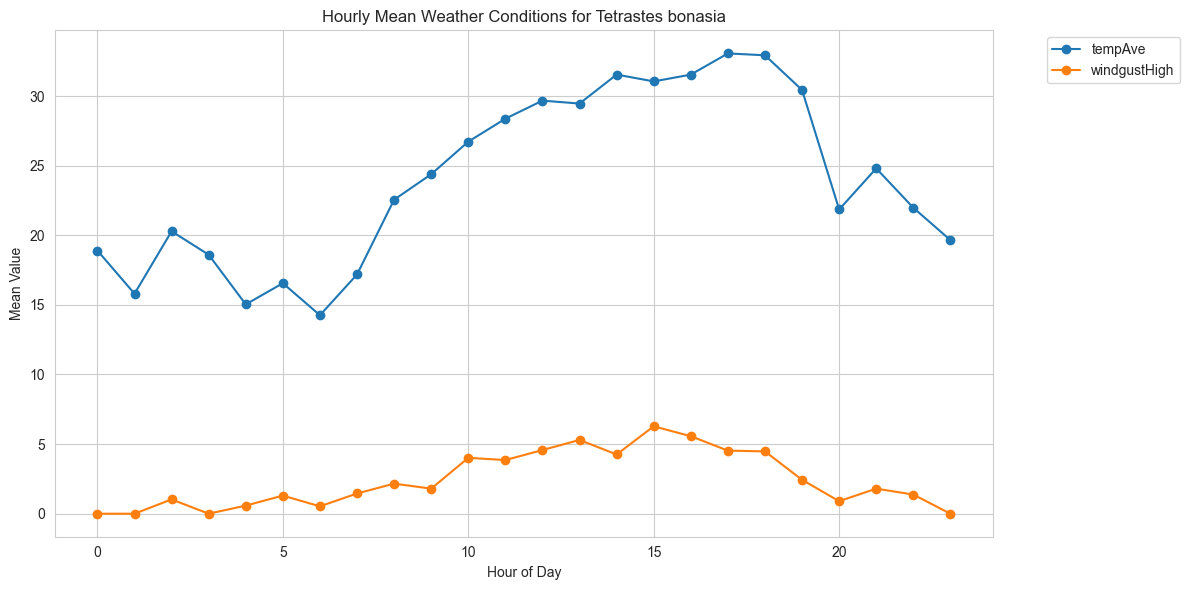

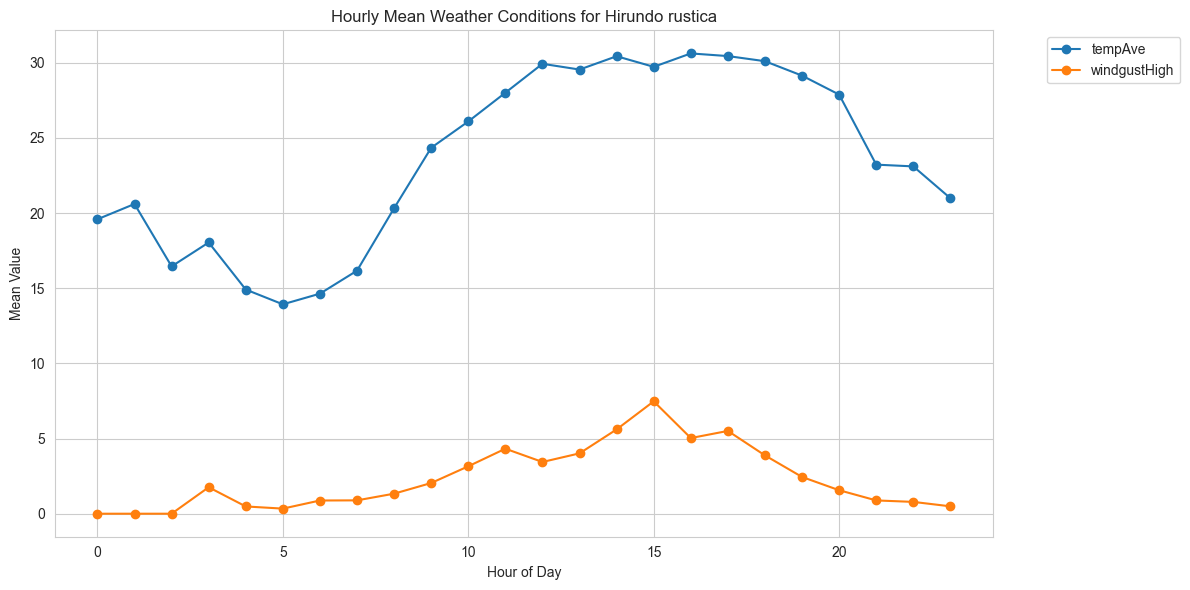

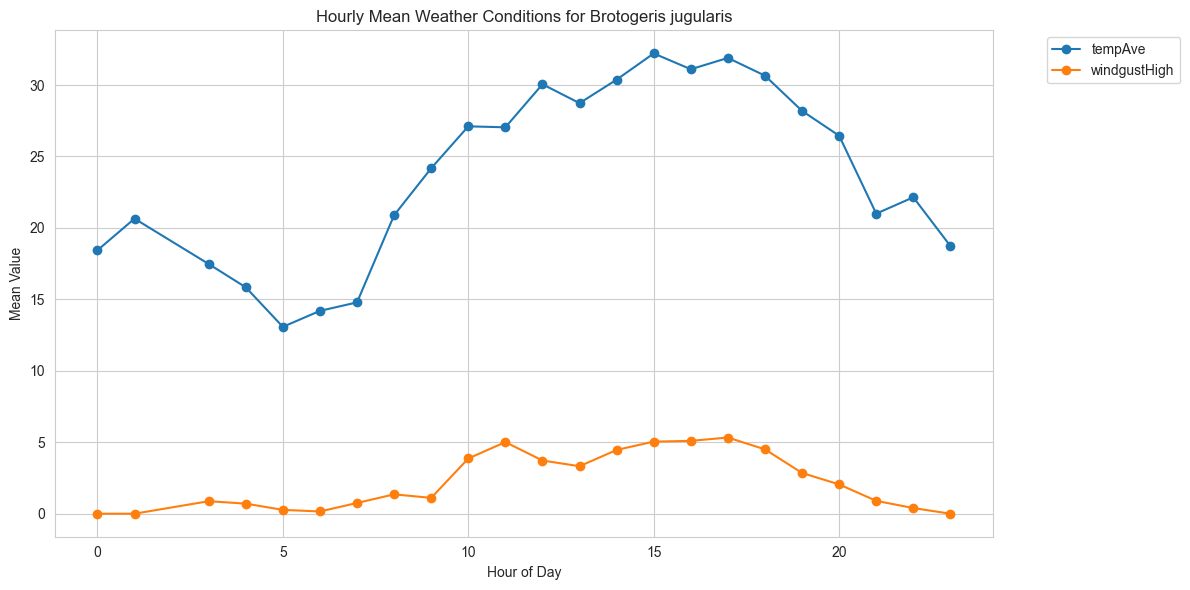

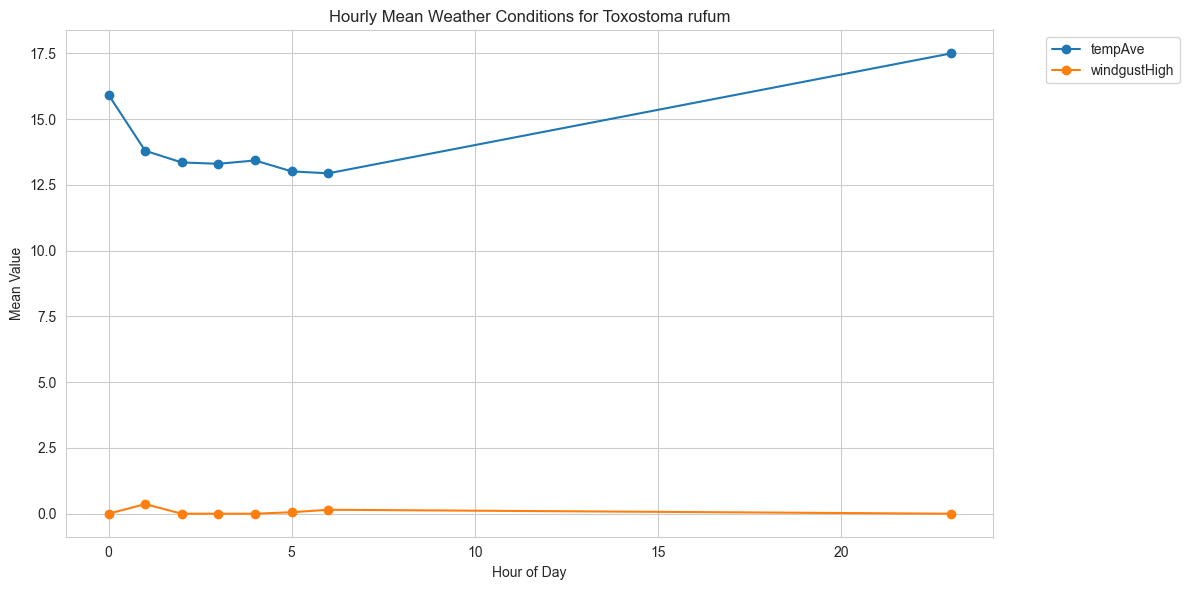

In [23]:
weather_feature = ["tempAve", "windgustHigh"]
hourly = data_top10.groupby("hour")[weather_feature].mean()

plt.figure(figsize=(12,6))
for col in ["tempAve"]:
    plt.plot(hourly.index, hourly[col], label=col)
plt.legend()
plt.title("Average Weather Variables by Hour of Day")
plt.xlabel("Hour of Day")
plt.ylabel("Mean Value")
plt.show()

for species in data_top10["scientific_name"].unique():
    subset = data_top10[data_top10["scientific_name"] == species].copy()

    # Compute hourly means
    hourly = subset.groupby("hour")[weather_feature].mean().reset_index()

    # --- Plot ---
    plt.figure(figsize=(12,6))
    for col in weather_feature:
        plt.plot(hourly["hour"], hourly[col], marker="o", linewidth=1.5, label=col)

    plt.title(f"Hourly Mean Weather Conditions for {species}")
    plt.xlabel("Hour of Day")
    plt.ylabel("Mean Value")
    plt.legend(bbox_to_anchor=(1.05,1), loc="upper left")
    plt.tight_layout()
    plt.show()



### Temporal Weather Analys

WindGust diffrent scale!! look into plotting weather for all spiecies in one gpraph per weather feature

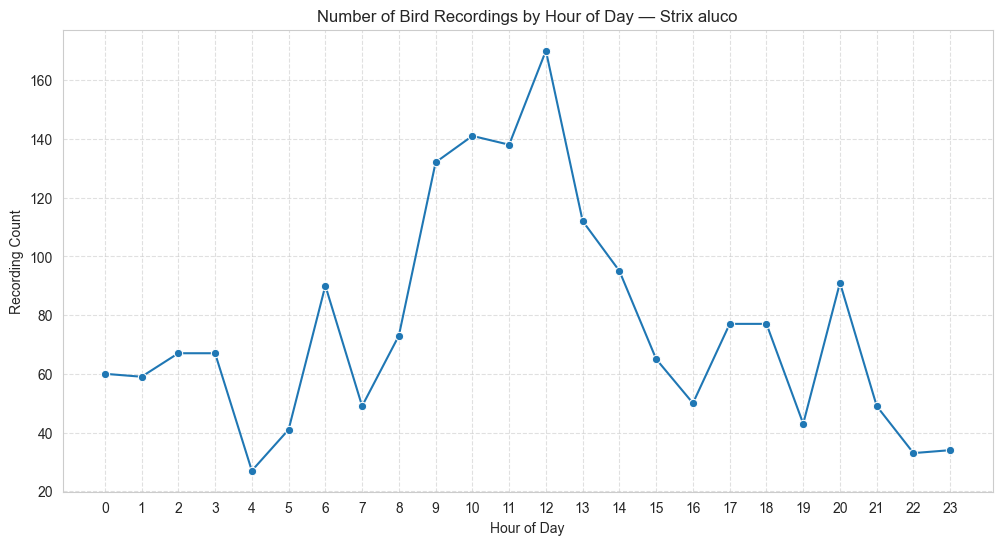

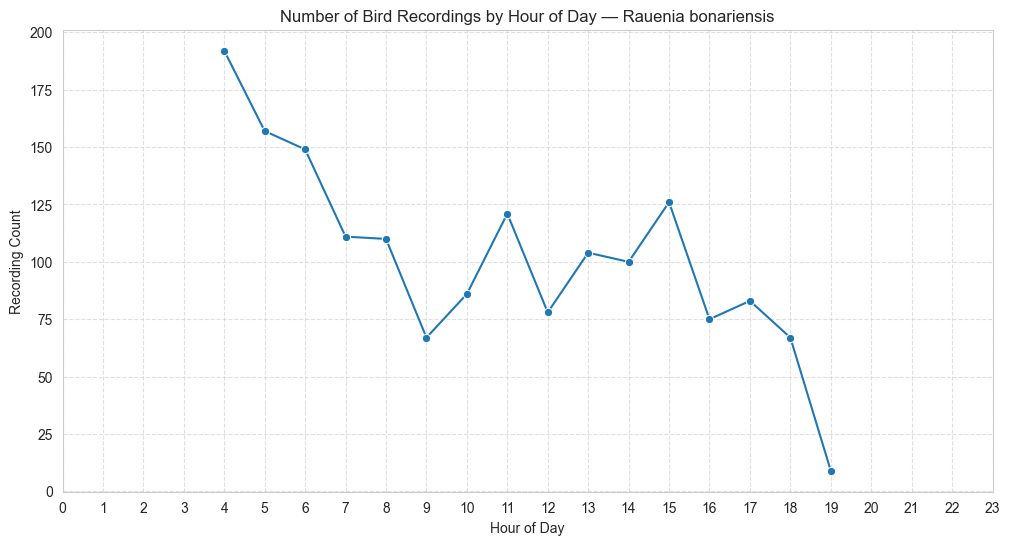

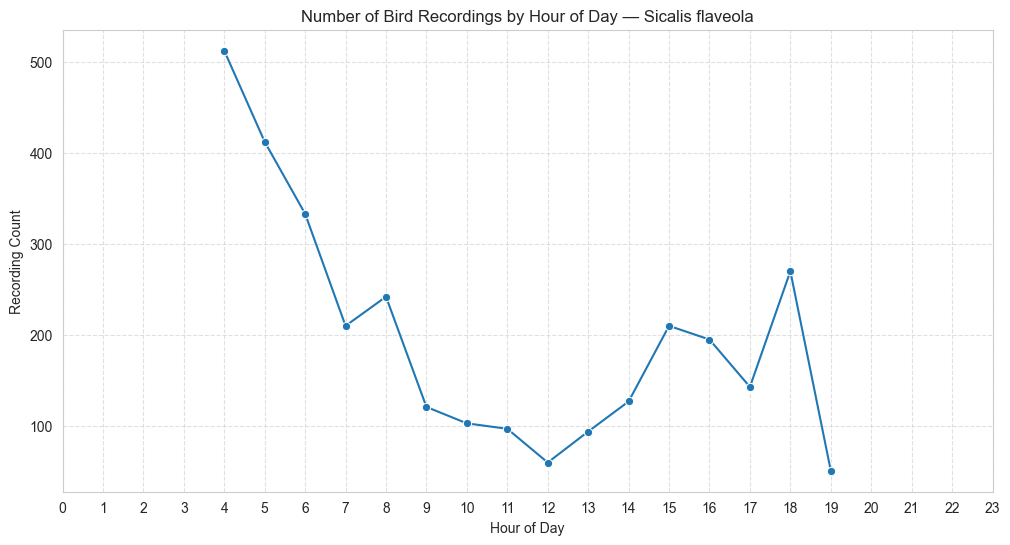

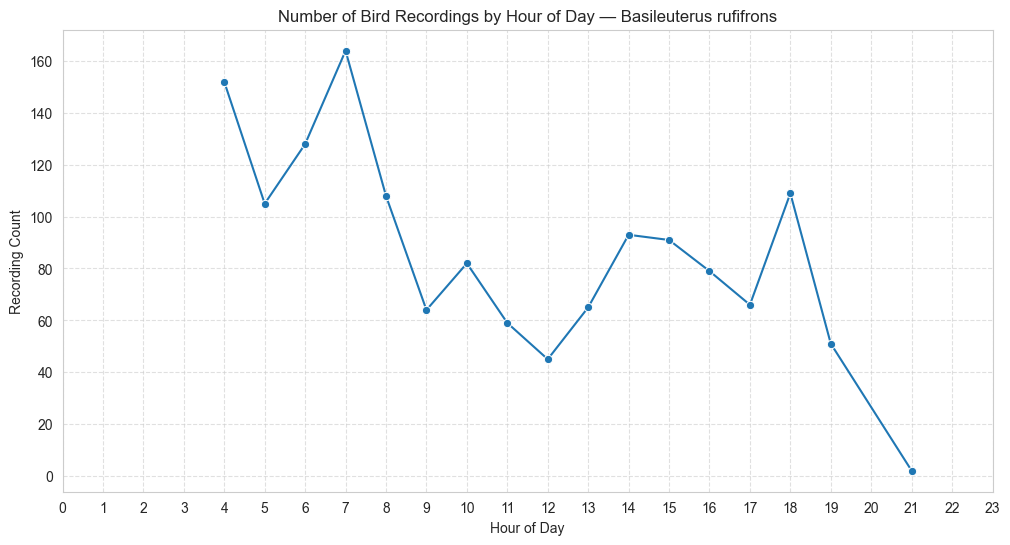

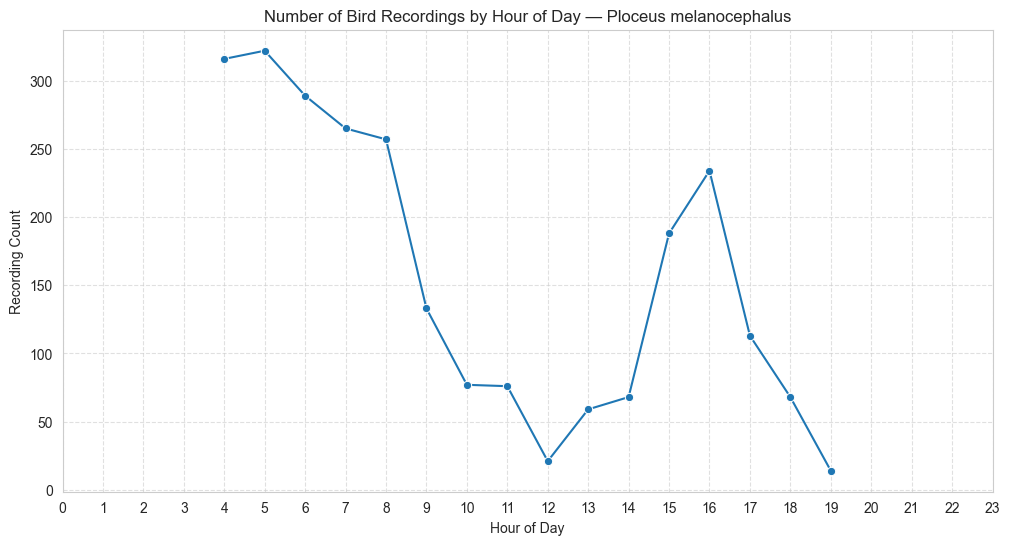

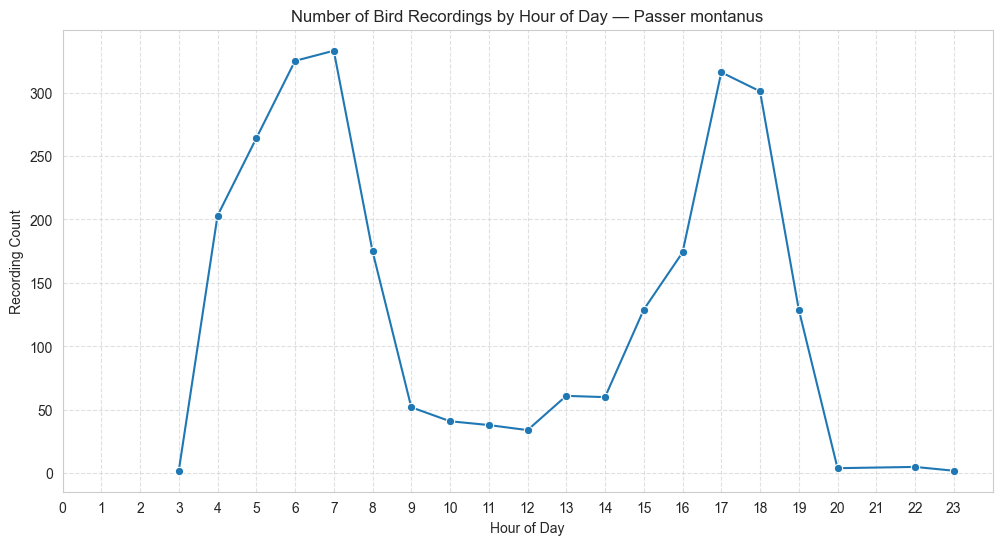

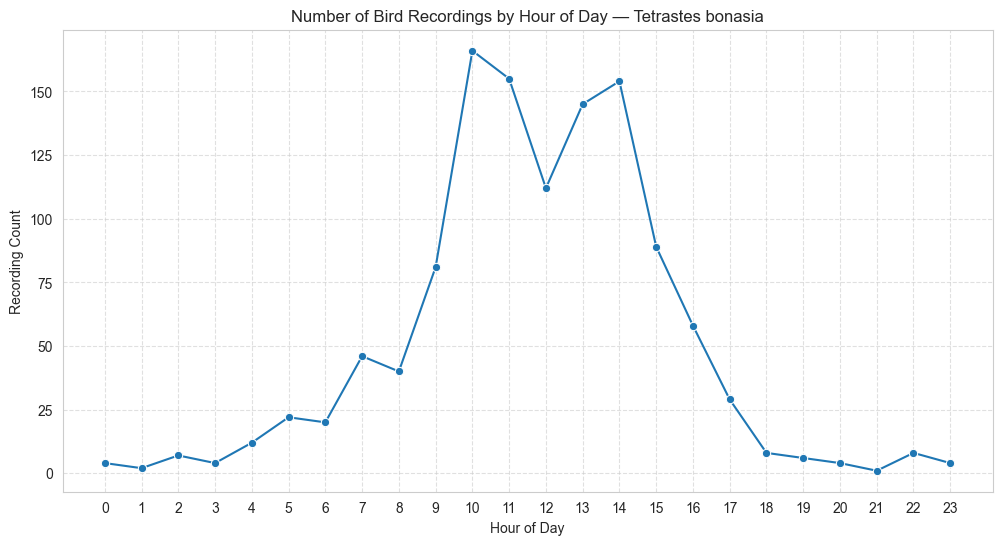

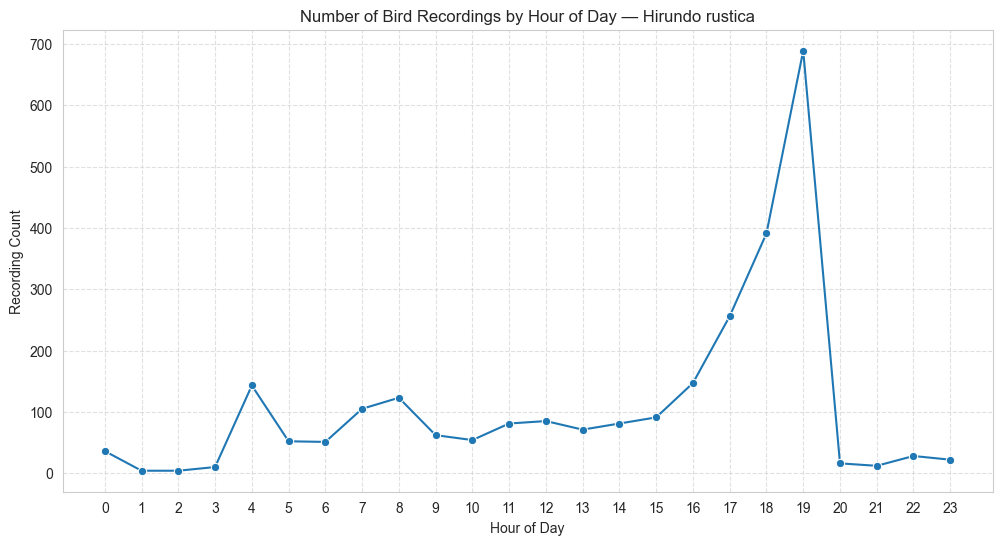

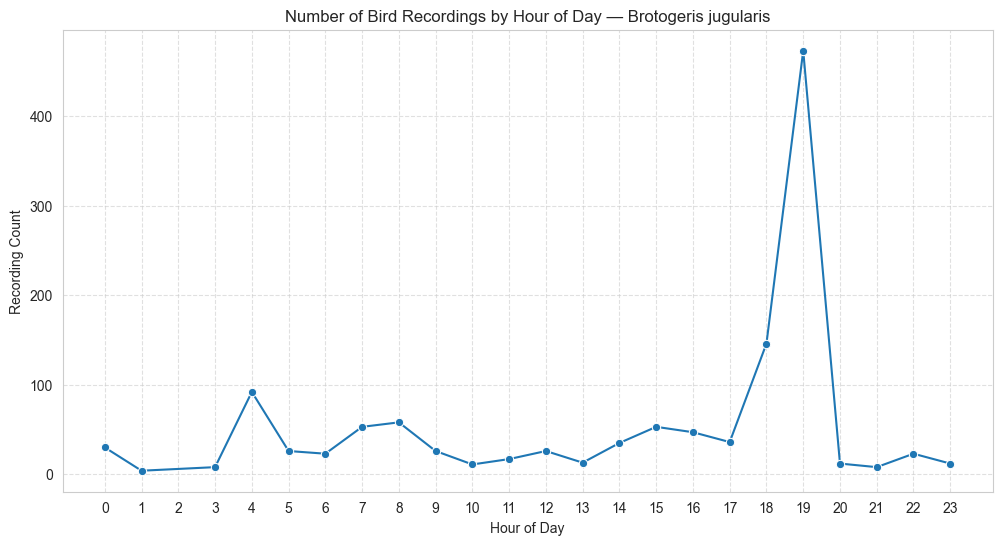

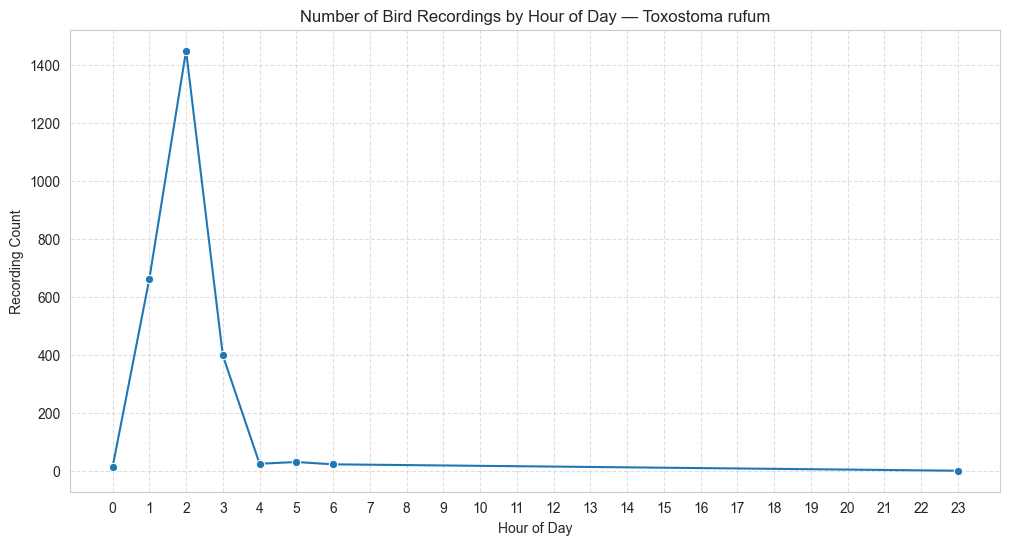

In [24]:
for species in data_top10["scientific_name"].unique():
    species_df = data_top10[data_top10["scientific_name"] == species]
    hourly_counts = species_df.groupby("hour")["filename"].count()

    plt.figure(figsize=(12,6))
    sns.lineplot(x=hourly_counts.index, y=hourly_counts.values, marker="o")
    plt.title(f"Number of Bird Recordings by Hour of Day — {species}")
    plt.xlabel("Hour of Day")
    plt.ylabel("Recording Count")
    plt.xticks(range(0,24))
    plt.grid(True, linestyle="--", alpha=0.6)
    plt.show()

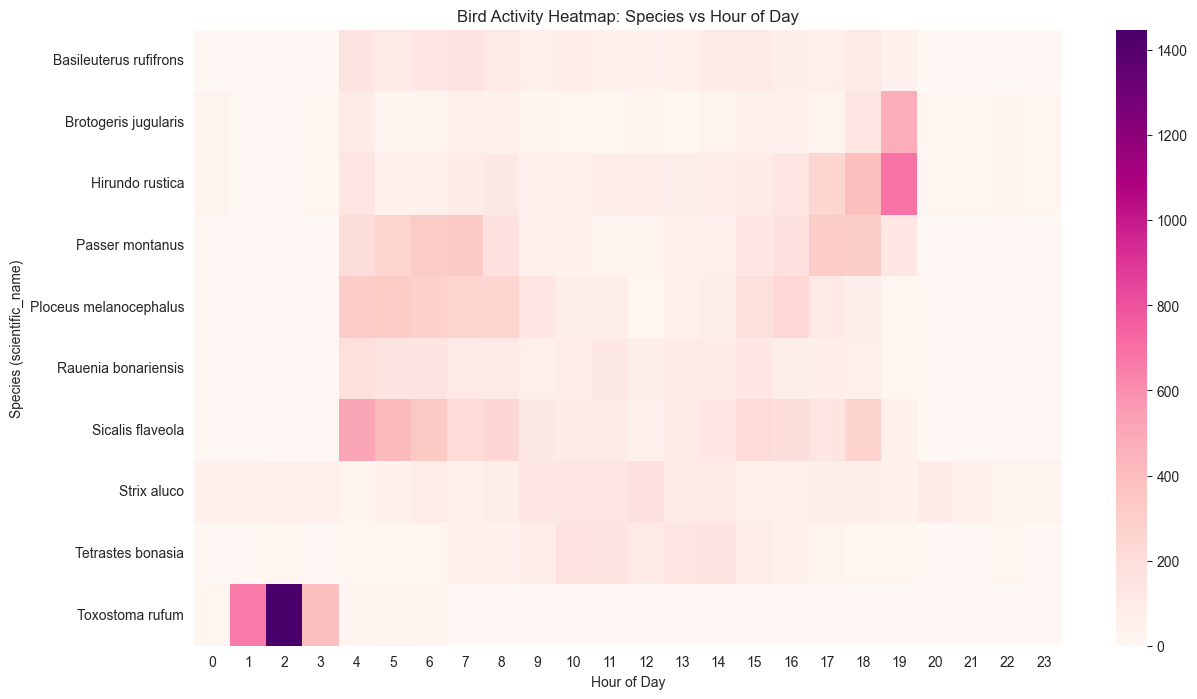

In [25]:
activity_matrix = data_top10.groupby(["scientific_name", "hour"])["filename"].count().unstack(fill_value=0)

plt.figure(figsize=(14, 8))
sns.heatmap(activity_matrix, cmap="RdPu")
plt.title("Bird Activity Heatmap: Species vs Hour of Day")
plt.xlabel("Hour of Day")
plt.ylabel("Species (scientific_name)")
plt.show()

Strix aluco anomaly counts:
anomaly
 1    1749
-1      91
Name: count, dtype: int64



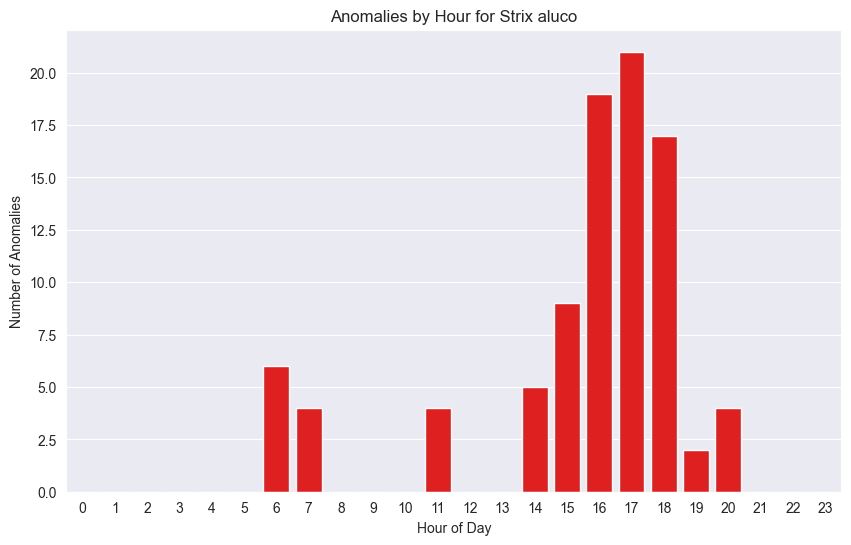

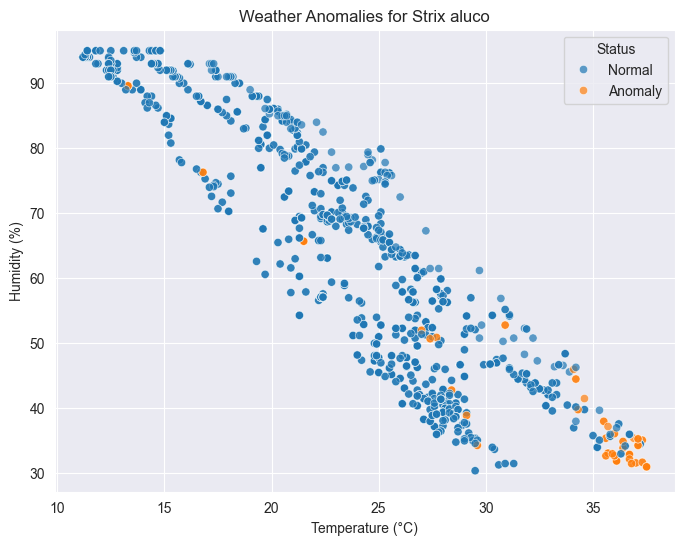

Rauenia bonariensis anomaly counts:
anomaly
 1    1556
-1      79
Name: count, dtype: int64



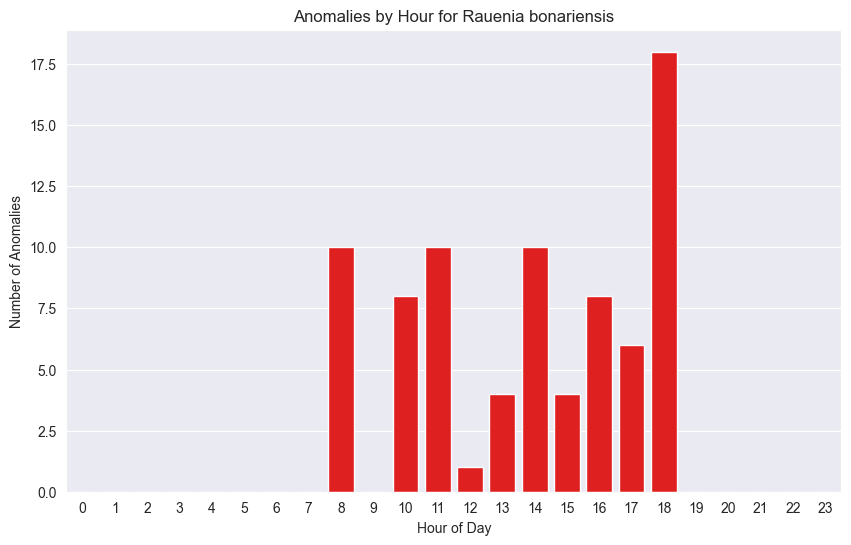

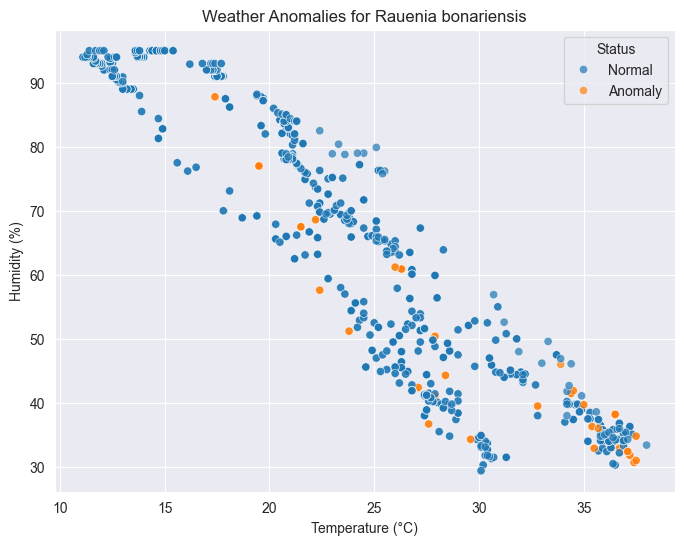

Sicalis flaveola anomaly counts:
anomaly
 1    3022
-1     158
Name: count, dtype: int64



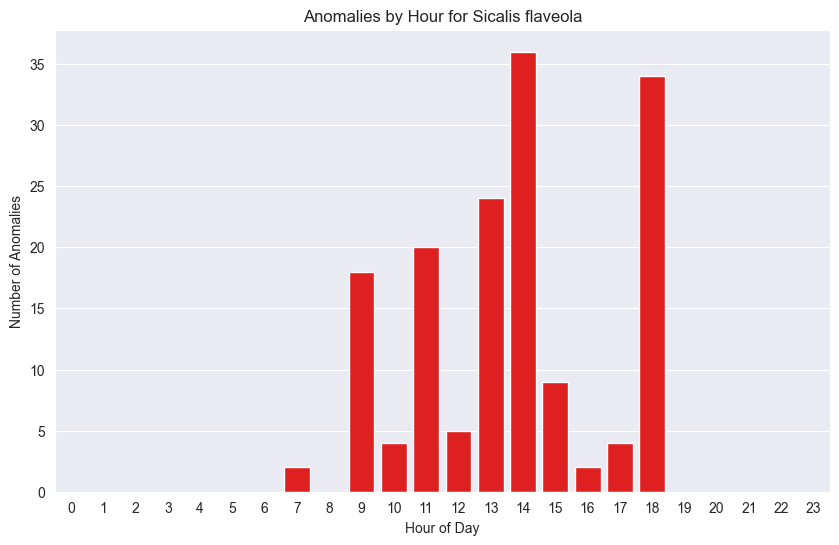

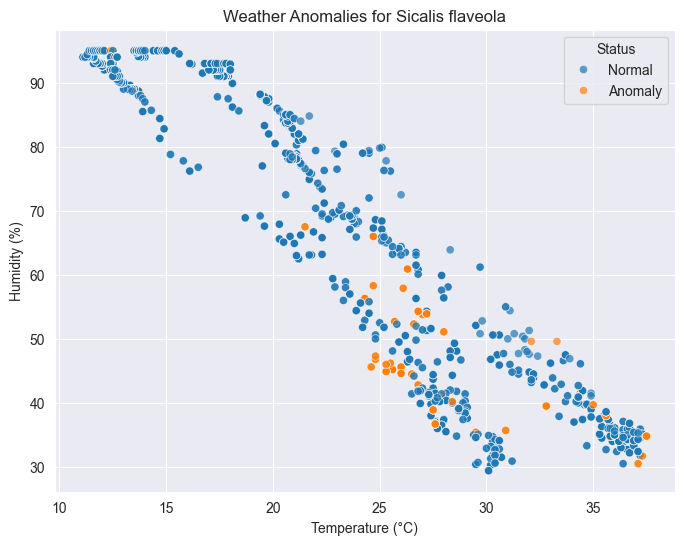

Basileuterus rufifrons anomaly counts:
anomaly
 1    1389
-1      74
Name: count, dtype: int64



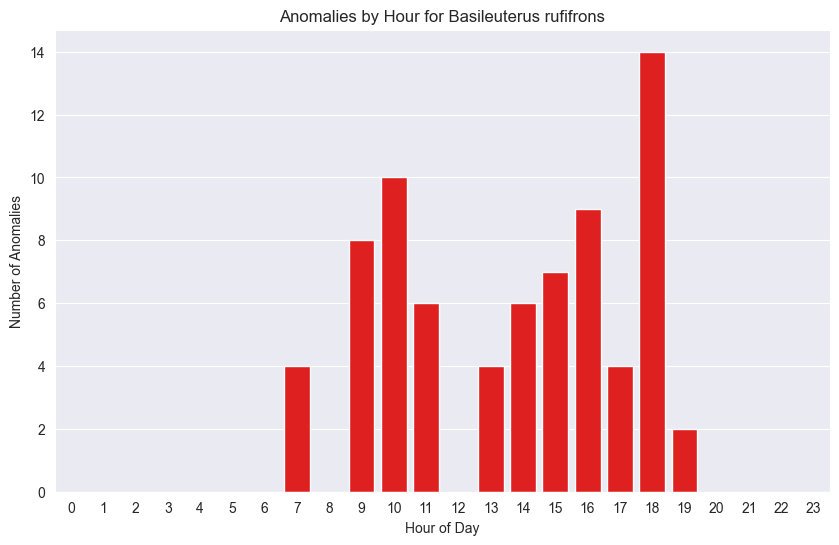

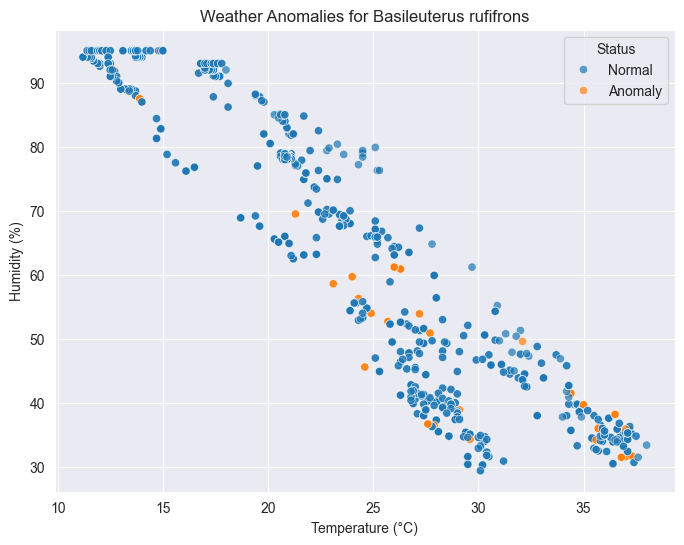

Ploceus melanocephalus anomaly counts:
anomaly
 1    2376
-1     124
Name: count, dtype: int64



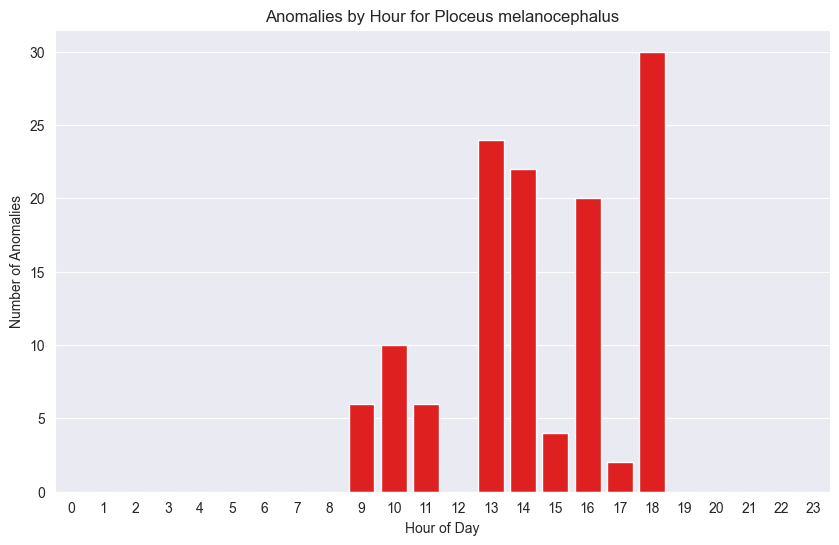

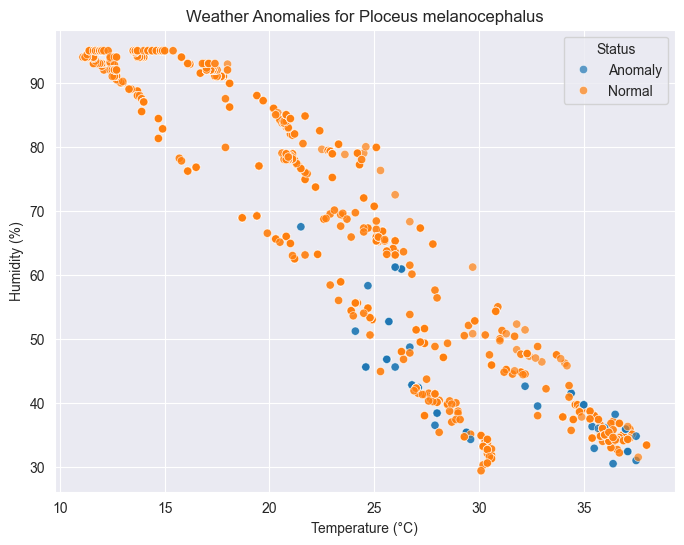

Passer montanus anomaly counts:
anomaly
 1    2516
-1     132
Name: count, dtype: int64



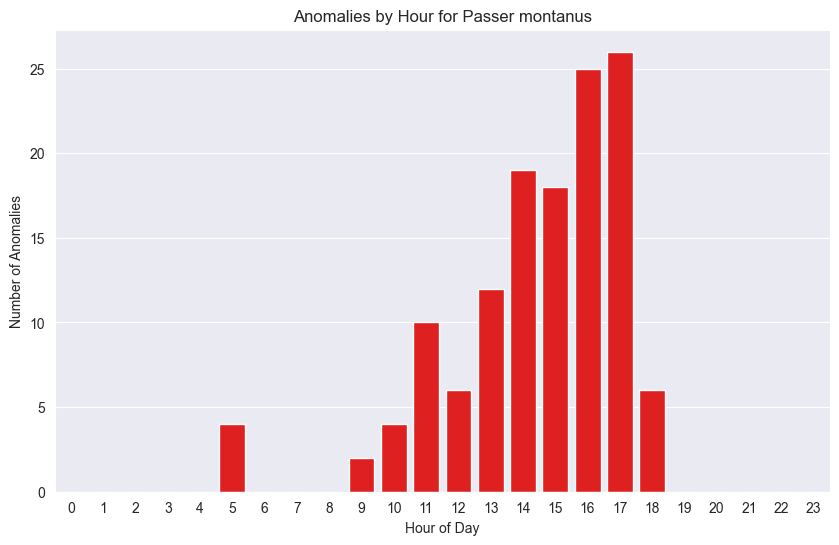

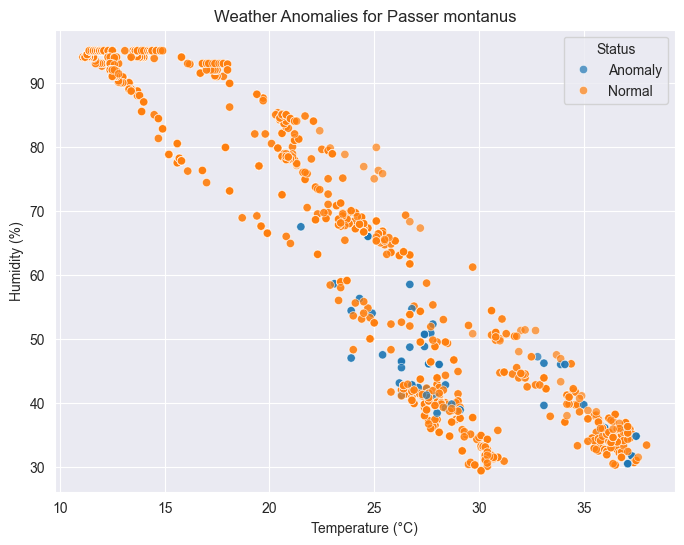

Tetrastes bonasia anomaly counts:
anomaly
 1    1118
-1      59
Name: count, dtype: int64



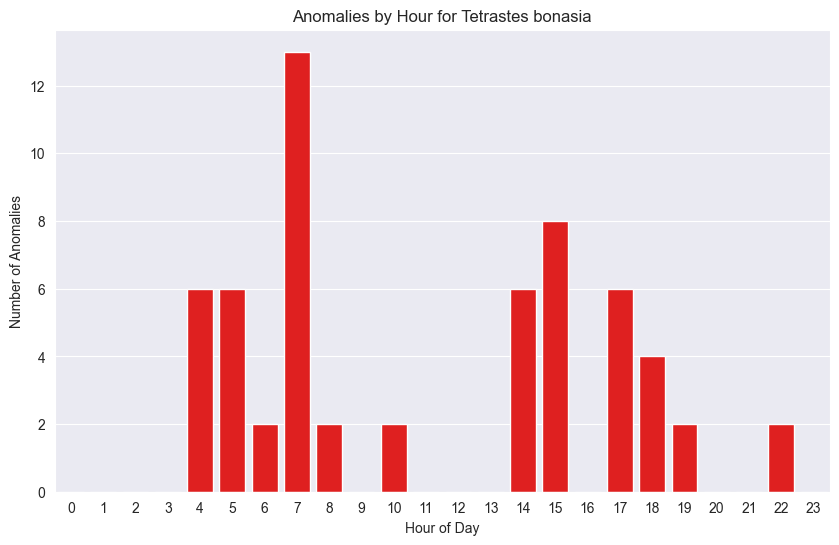

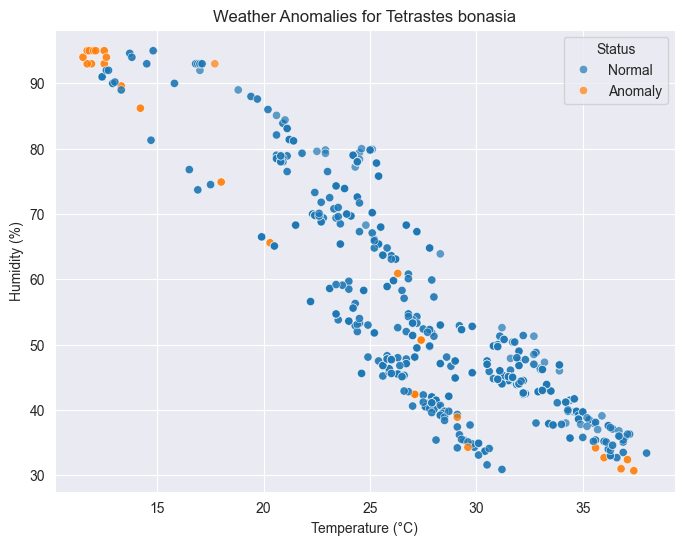

Hirundo rustica anomaly counts:
anomaly
 1    2484
-1     130
Name: count, dtype: int64



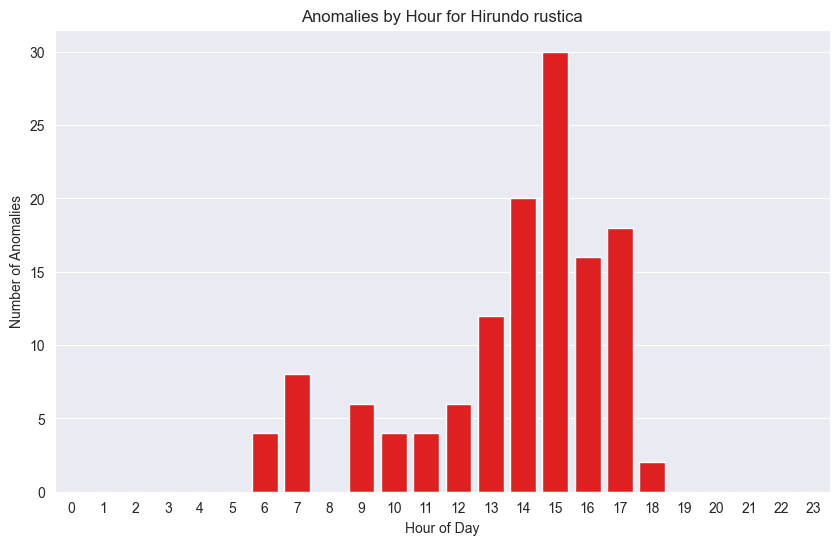

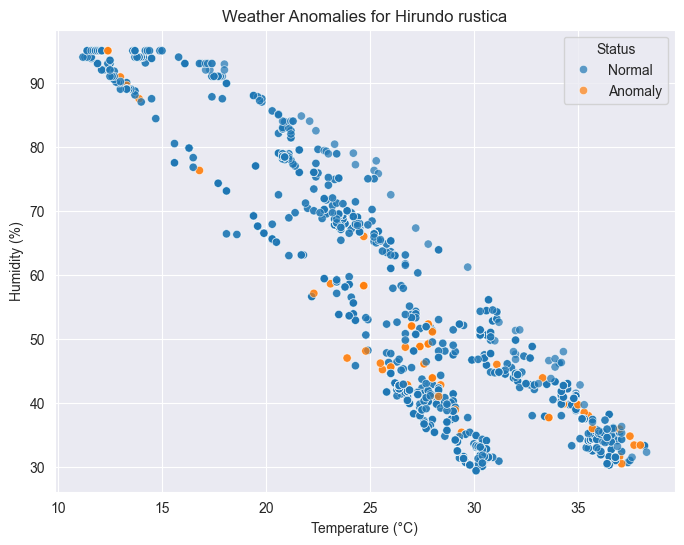

Brotogeris jugularis anomaly counts:
anomaly
 1    1170
-1      62
Name: count, dtype: int64



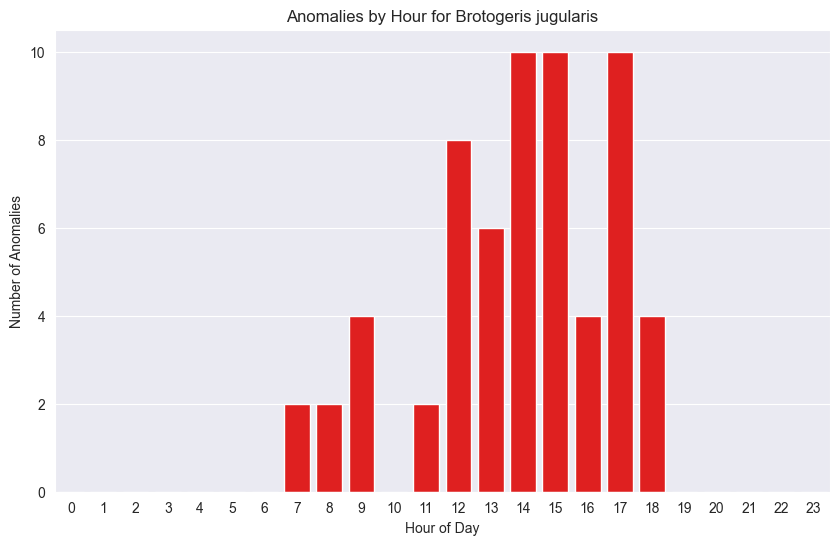

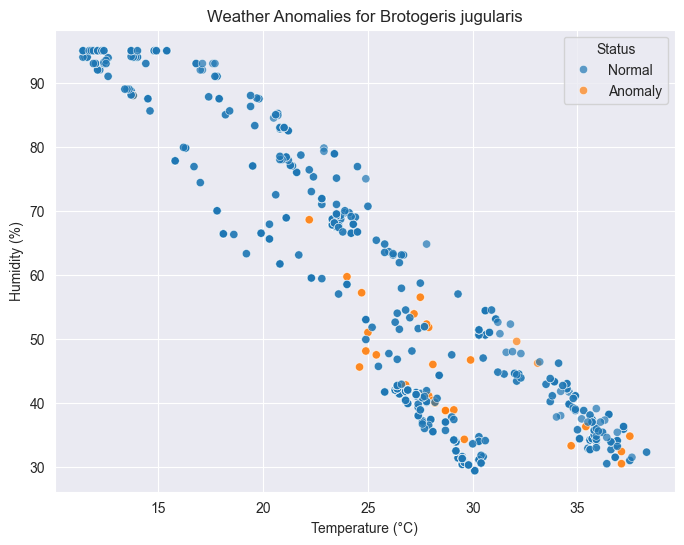

Toxostoma rufum anomaly counts:
anomaly
 1    2516
-1      91
Name: count, dtype: int64



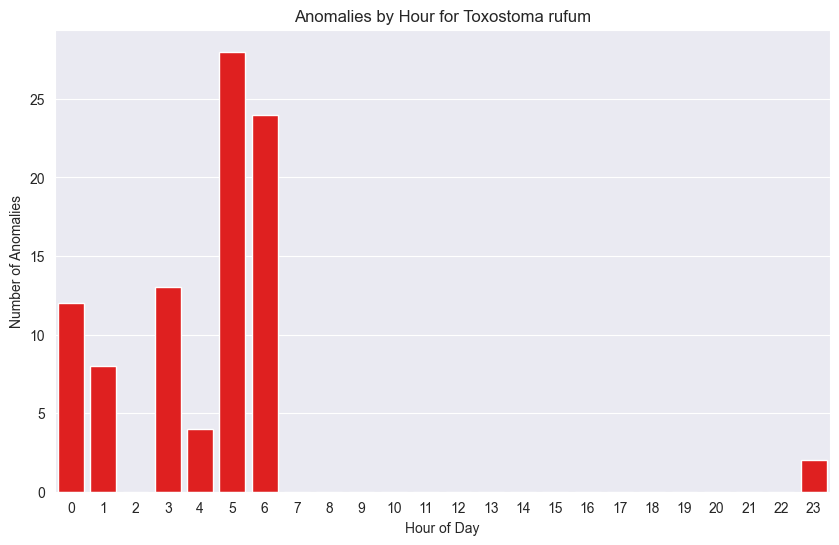

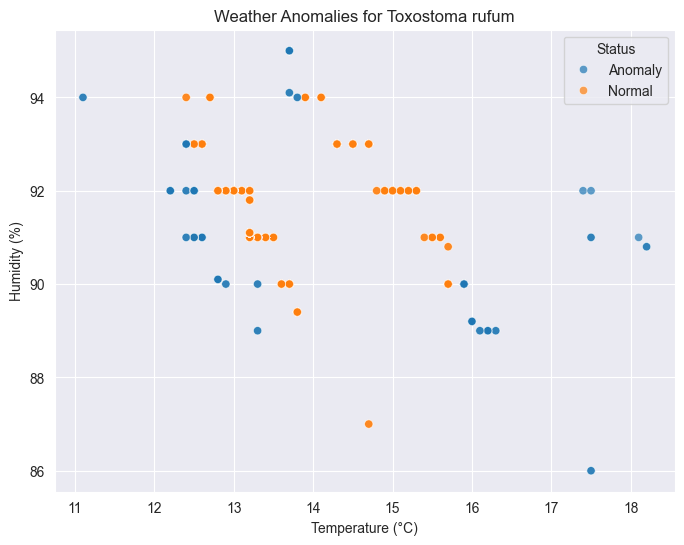

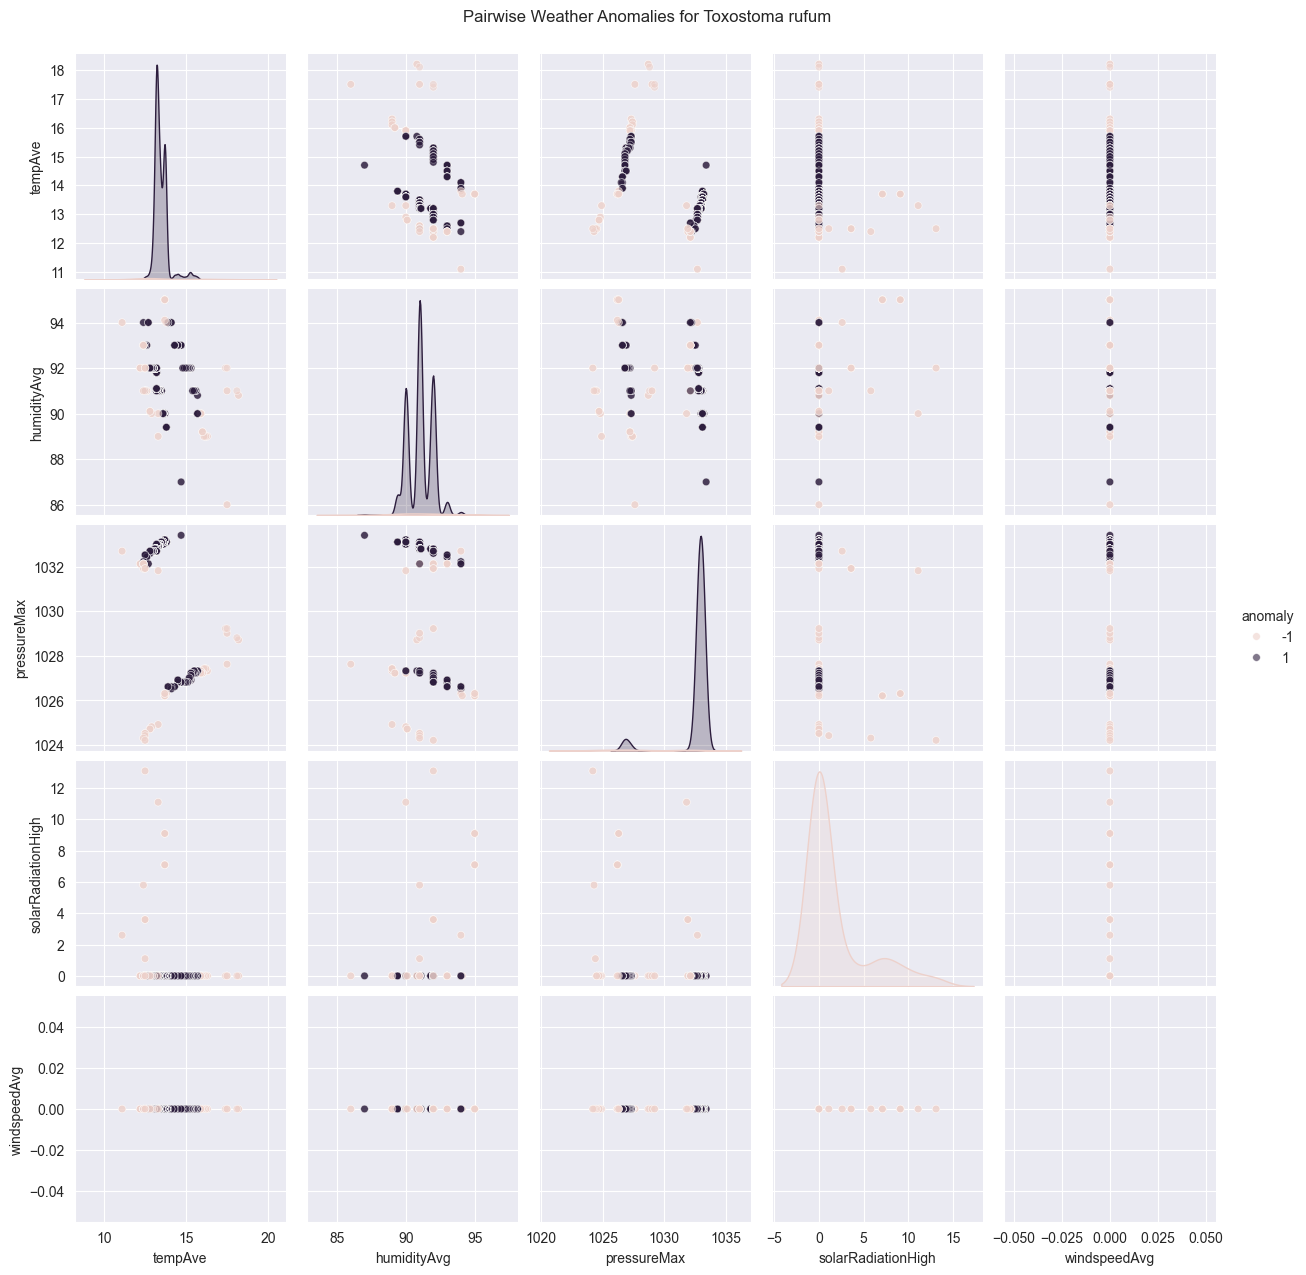

In [16]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
import seaborn as sns
import matplotlib.pyplot as plt

# columns to use for anomalies
# weather_cols = [
#     "tempAve","humidityAvg","pressureMax","windspeedAvg",
#     "windgustHigh","solarRadiationHigh"
# ]
weather_cols =["tempAve", "pressureMax", "windgustHigh", "solarRadiationHigh"]
# ensure datetime -> hour exists
data_top10["hour"] = pd.to_datetime(data_top10["datetime"], errors="coerce").dt.hour

for species in data_top10["scientific_name"].unique():
    df_species = data_top10[data_top10["scientific_name"] == species].copy()

    # skip tiny classes (IsolationForest needs some data)
    if len(df_species) < 20:
        print(f"Skipping {species}: not enough samples ({len(df_species)})")
        continue

    # --- Clean & scale on THIS species only ---
    X = df_species[weather_cols].copy()
    # fill NaNs with species means to avoid dropping rows
    X = X.fillna(X.mean(numeric_only=True))

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # --- Fit & predict anomalies for this species ---
    iso = IsolationForest(contamination=0.05, random_state=42)
    df_species["anomaly"] = iso.fit_predict(X_scaled)   # -1 anomaly, 1 normal

    print(f"{species} anomaly counts:\n{df_species['anomaly'].value_counts()}\n")

    # map to labels for nicer legend
    df_species["anomaly_label"] = np.where(df_species["anomaly"] == -1, "Anomaly", "Normal")

    # --- Anomalies by hour (fill missing hours with 0 for readability) ---
    hourly_anomalies = (
        df_species.groupby("hour")["anomaly"]
        .apply(lambda x: (x == -1).sum())
        .reindex(range(24), fill_value=0)               # ensure 0–23 present
        .reset_index(name="anomaly_count")
    )

    plt.figure(figsize=(10,6))
    sns.barplot(data=hourly_anomalies, x="hour", y="anomaly_count", color="red")
    plt.title(f"Anomalies by Hour for {species}")
    plt.xlabel("Hour of Day")
    plt.ylabel("Number of Anomalies")
    plt.show()

    # --- Visualize anomaly vs normal in weather space ---
    plt.figure(figsize=(8,6))
    sns.scatterplot(
        data=df_species,
        x="tempAve", y="humidityAvg",
        hue="anomaly_label", alpha=0.7
    )
    plt.title(f"Weather Anomalies for {species}")
    plt.xlabel("Temperature (°C)")
    plt.ylabel("Humidity (%)")
    plt.legend(title="Status")
    plt.show()
features_to_plot = ["tempAve", "humidityAvg", "pressureMax", "solarRadiationHigh", "windspeedAvg"]
sns.pairplot(
    df_species,
    vars=features_to_plot,
    hue="anomaly",
    plot_kws={"alpha": 0.6, "s": 30}
)
plt.suptitle(f"Pairwise Weather Anomalies for {species}", y=1.02)
plt.show()


In [17]:
anomaly_indices = df_species.index[df_species["anomaly"] == -1].tolist()
print(anomaly_indices)
anomaly_rows = df_species.loc[anomaly_indices]
anomaly_rows.head()
anomaly_filenames = df_species.loc[anomaly_indices, "filename"].tolist()
print(anomaly_filenames)


[3117, 3165, 3176, 3177, 3185, 3187, 3193, 3204, 3213, 3230, 3234, 4262, 4690, 5198, 5199, 5204, 5213, 5215, 9904, 9921, 9965, 9997, 10004, 11339, 19138, 19145, 19151, 19158, 19171, 19180, 19427, 19441, 19612, 24531, 24785, 24808, 24810, 25004, 25011, 25182, 25247, 25325, 39110, 39158, 39169, 39170, 39178, 39180, 39186, 39197, 39206, 39223, 39227, 40255, 40683, 41191, 41192, 41197, 41206, 41208, 45897, 45914, 45958, 45990, 45997, 47332, 55131, 55138, 55144, 55151, 55164, 55173, 55420, 55434, 55605, 60524, 60778, 60801, 60803, 60997, 61004, 61175, 61240, 61318, 77014, 77016, 77058, 77482, 77489, 77751, 77802]
['fl_gaia_zoo_congo_15aug25_data/31/er_file_2025_08_08_23_52_44.500000.wav', 'fl_gaia_zoo_congo_15aug25_data/31/er_file_2025_08_09_00_34_01.500000.wav', 'fl_gaia_zoo_congo_15aug25_data/31/er_file_2025_08_09_00_40_32.750000.wav', 'fl_gaia_zoo_congo_15aug25_data/31/er_file_2025_08_09_00_41_49.wav', 'fl_gaia_zoo_congo_15aug25_data/31/er_file_2025_08_09_00_46_26.750000.wav', 'fl_gaia_z

In [ ]:
normal = df_species[df_species["anomaly"] == 1]
anomalous = df_species[df_species["anomaly"] == -1]

# Compare mean values per weather variable
feature_diff = anomalous[weather_cols].mean() - normal[weather_cols].mean()
feature_diff = feature_diff.sort_values(ascending=False)

print("Average difference (anomaly - normal):")
print(feature_diff)
feature_diff.plot(kind="barh", figsize=(8,5), title=f"Weather Feature Shift for Anomalies — {species}")
plt.xlabel("Mean difference (Anomaly - Normal)")
plt.show()

In [ ]:
print("\033[91mtemperature data\033[0m")
createBoxplotsOnData(data_top10,'scientific_name','tempAve','Distribution of Average Temperature per Scientific Name (Top 10)',"Average Temperature (°C)",'boxPlot_tempavg')
createDistPlotsOnData(data_top10,'scientific_name','tempAve','Temperature Density per Scientific Name (with Counts)',"Average Temperature (°C)","distPlot_tempAvg")

print("\033[91mwind speed data\033[0m")
createBoxplotsOnData(data_top10,'scientific_name','windspeedAvg','Distribution of Average Wind Speed per Scientific Name (Top 10)',"Average Temperature (°C)",'boxPlot_windspeedAvg')
createDistPlotsOnData(data_top10,'scientific_name','windspeedAvg','Temperature Density per Scientific Name (with Counts)',"Average Wind Speed","distPlot_windspeedAvg")

print("\033[91mhumidity data\033[0m")
createBoxplotsOnData(data_top10,'scientific_name','humidityAvg','Distribution of Average Wind Speed per Scientific Name (Top 10)',"Average Humidity",'boxPlot_humidityAvg')
createDistPlotsOnData(data_top10,'scientific_name','humidityAvg','Temperature Density per Scientific Name (with Counts)',"Average Humidity","distPlot_humidityAvg")


In [ ]:
import re
# Choose only relevant columns
cols = ['dewptAvg','windgustHigh','windspeedAvg','tempAve', 'humidityAvg']

# keep only numeric weather cols (safe)
weather_cols = [c for c in cols if pd.api.types.is_numeric_dtype(data_top10[c])]

for sp, sub in data_top10.dropna(subset=weather_cols+[species_col]).groupby(species_col):
    # g = sns.pairplot(
    #     sub[weather_cols],
    #     diag_kind="kde",     # or "hist"
    #     kind="scatter",      # or "reg"
    #     corner=True,         # set False for the full square
    #     plot_kws={"s": 12, "alpha": 0.6}
    # )
    # g.fig.suptitle(f"Scatter Plot Matrix — {sp} (n={len(sub)})", y=1.02)
    g = sns.pairplot(
    sub[cols],                # or df[cols + ['scientific_name']] with hue below
    #hue='scientific_name', # add if you want colors by species
    diag_kind='kde',         # or 'hist'
    kind='scatter',          # or 'reg' for trend lines
    plot_kws={'s':18, 'alpha':0.6}
    )
    g.fig.suptitle("Scatter Plot Matrix ", y=1.02)
    safe = re.sub(r"[^A-Za-z0-9_-]+","_", sp)
    g.savefig(f"{BASE_DIR}/Plots/pair-plot-{safe}", dpi=300, bbox_inches='tight')
    plt.show()
    plt.close(g.fig)

In [9]:
from sklearn.ensemble import IsolationForest
features_for_if = data_top10[weather_cols + ["residual"]]
iso = IsolationForest(contamination=0.05, random_state=42)
data_top10["anomaly_combined"] = iso.fit_predict(features_for_if)
for col in weather_cols:
    plt.figure(figsize=(6,4))
    sns.kdeplot(data_top10[data_top10["anomaly"]==1][col], label="Normal", shade=True)
    sns.kdeplot(data_top10[data_top10["anomaly"]==-1][col], label="Anomaly", shade=True, color="red")
    plt.title(f"{col}: Normal vs Anomalous Recordings")
    plt.legend()
    plt.show()


NameError: name 'data_top10' is not defined

### Bird Activity vs Weather and Time

Idea: LLM To help with analysis